In [8]:
#install.packages("glmmTMB")
#library(rptR)
library(ggplot2)
library(lindia)
library(tidyverse)
#library(caret)
library(lmerTest) #lmer, glmer
library(DHARMa) #verify assumpltion of glm
library(merTools) #sim
#library(MuMIn) #r2
library(glmmTMB) #hurdle with random effect & zero-inflation with random effect

# installing glmmADMB
#install.packages("R2admb")
#install.packages("glmmADMB", repos =c("http://glmmadmb.r-forge.r-project.org/repos",getOption("repos")), type = "source")
# installing 
#lme4install.packages("lme4")
# installing cplm
#install.packages("cplm")
library(glmmADMB)
library(lme4)
library(MASS)

library(boot) #bootstrap

library(performance)#check_overdispersion


In [2]:
library("glmmTMB")

Warning message:
"package 'glmmTMB' was built under R version 3.6.3"

Attaching package: 'glmmTMB'


The following object is masked from 'package:glmmADMB':

    VarCorr




install.packages("leaps")
library(leaps)
library(MASS)
library(lme4) #random effect
library(sjPlot)#plot estimates

In [3]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_/chapter2'
#df = read.csv(file.path(path_,'df_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df = read.csv(file.path(path_,'df_weekly_BT.csv'), header = TRUE, sep = ",")

df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID) 
df$WOA_F = as.factor(df$WOA) 

df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment)

#scale: mean-centering of the environmental variable so that intercepts reflect average values for the HenID and ind. 
#df$temperature_C_avg_scale = scale(df$temperature_C_avg, center=TRUE, scale=TRUE)

#setting reference group
contrasts(df$Treatment)
df <- df %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
contrasts(df$Treatment)

contrasts(df$CLASS)
df <- df %>% mutate(CLASS = relevel(CLASS, ref = "LEXP"))
contrasts(df$CLASS)
print(dim(df))
summary(df)

,TRAN
OFH,0
TRAN,1


,OFH
TRAN,0
OFH,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


[1] 2705   32


     HenID           WOA            PenID             CLASS     Treatment  
 hen_193:  20   Min.   :26.00   pen_10 :372   LEXP       :506   TRAN:1327  
 hen_59 :  20   1st Qu.:33.00   pen_9  :361   MEXP       :620   OFH :1378  
 hen_78 :  20   Median :41.00   pen_5  :358   NewAfterEpi:841              
 hen_112:  19   Mean   :41.65   pen_11 :349   REXP       :738              
 hen_116:  19   3rd Qu.:49.00   pen_8  :339                                
 hen_120:  19   Max.   :59.00   pen_12 :320                                
 (Other):2588                   (Other):606                                
 weekly_avertical_travel_distance weekly_median_vertical_travel_distance
 Min.   :  2.00                   Min.   :  2.00                        
 1st Qu.: 46.00                   1st Qu.: 46.00                        
 Median : 61.00                   Median : 60.00                        
 Mean   : 61.77                   Mean   : 61.45                        
 3rd Qu.: 77.00            

In [4]:
#rpt: https://cran.r-project.org/web/packages/rptR/vignettes/rptR.html
#or oursel with lmertest: lmer, glmer

# Quasi-Poisson GLMMs with log link

In [ ]:
#IS omegaNo corect??
!(2 %in% c(1,12))

### weekly_avg_latency_1_Zone_h

In [60]:
df_ = df[!(df$HenID %in% c('hen_112',
 'hen_123',
 'hen_135',
 'hen_144',
 'hen_145',
 'hen_146',
 'hen_207',
 'hen_21',
 'hen_213',
 'hen_218',
 'hen_221',
 'hen_228',
 'hen_32',
 'hen_39',
 'hen_54',
 'hen_71',
 'hen_8',
 'hen_81',
 'hen_87',
 'hen_97')), ] 

In [52]:
dim(df_)
dim(df)

[1] 2478   33

[1] 2705   33

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: nbinom1  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
 29105.0  29122.4 -14549.5  29099.0     2475 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.3186   0.5644  
Number of obs: 2478, groups:  HenID, 174

Overdispersion parameter for nbinom1 family (): 51.5 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.03672    0.04482   112.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: nbinom1  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
 28860.7  28901.4 -14423.4  28846.7     2471 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.3272   0.572   
Number of obs: 2478, groups:  HenID, 174

Overdispersion parameter for nbinom1 family (): 45.9 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.92807    0.06350   77.61  < 2e-16 ***
TreatmentOFH                   0.18077    0.08978    2.01 0.044064 *  
scale(weekly_avg_temperature) -0.10044    0.02858   -3.52 0.000440 ***
scale(WOA)                     0.28178    0.08711    3.23 0.001217 ** 
scale(I(WOA^2))               -0.34917    0.09364   -3.73 0.000192 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

VarOdN    VarOlN    VarOlN 
0.2854379 0.2510994 0.3299914

VarOdF    VarOlF    VarOlF 
0.2541953 0.2264942 0.2892065

R2glmmM    R2glmmC  ICCrawPop  ICCadjPop 
0.05711879 0.55761778 0.49121358 0.53081871

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
DHARMa:testOutliers with type = binomial may have inflated Type 

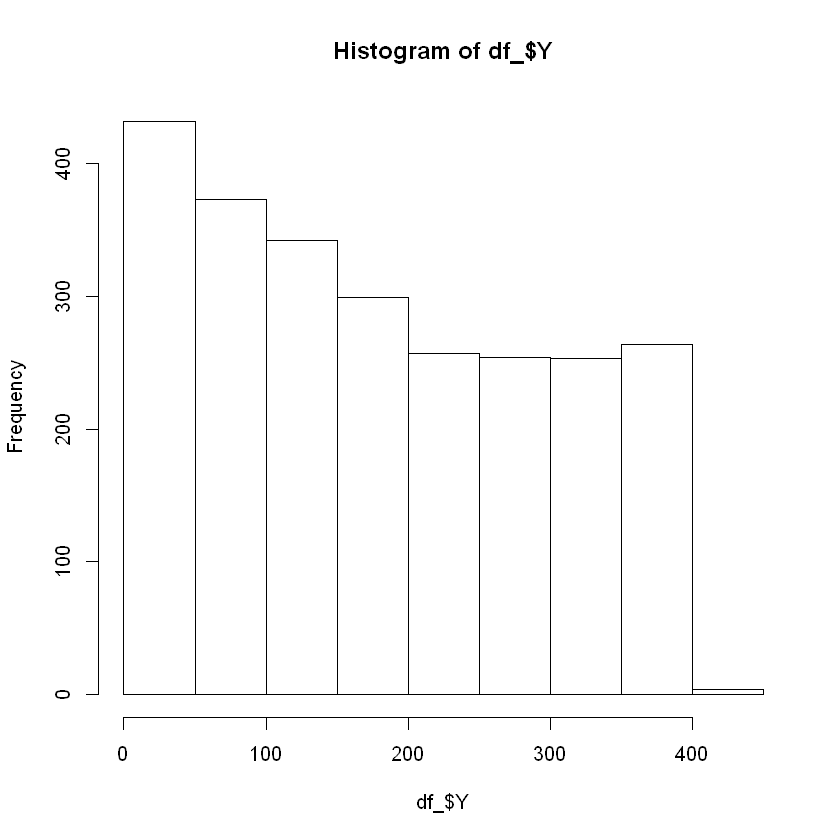

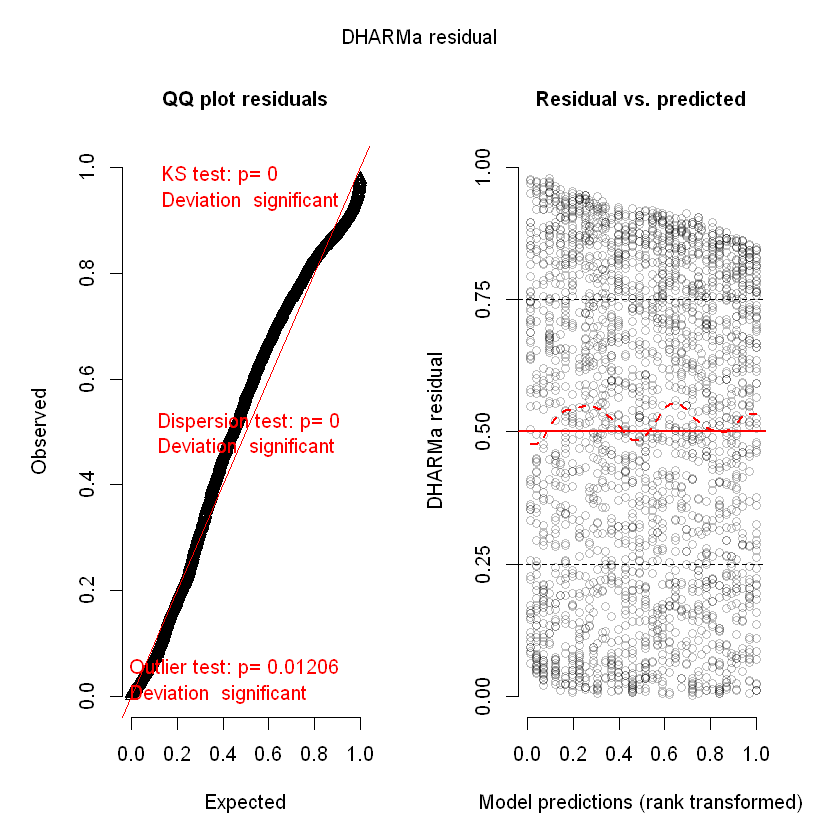


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 0, observations = 2478, p-value = 0.08
alternative hypothesis: two.sided
 percent confidence interval:
 0.000000000 0.005458031
sample estimates:
outlier frequency (expected: 0.0020863599677159 ) 
                                                0 


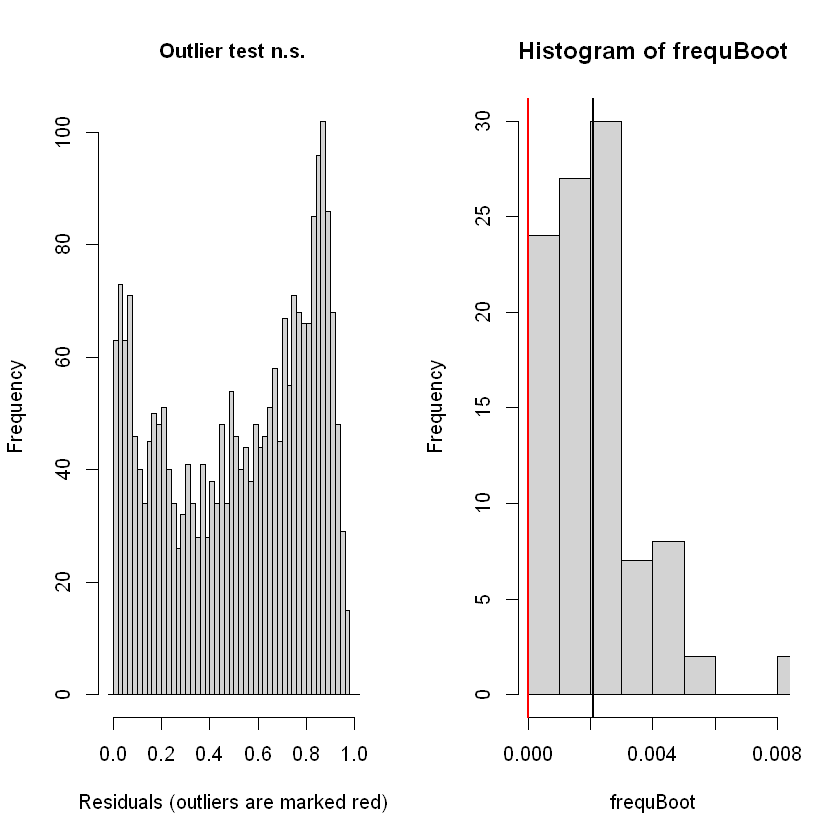


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.60983, p-value < 2.2e-16
alternative hypothesis: two.sided


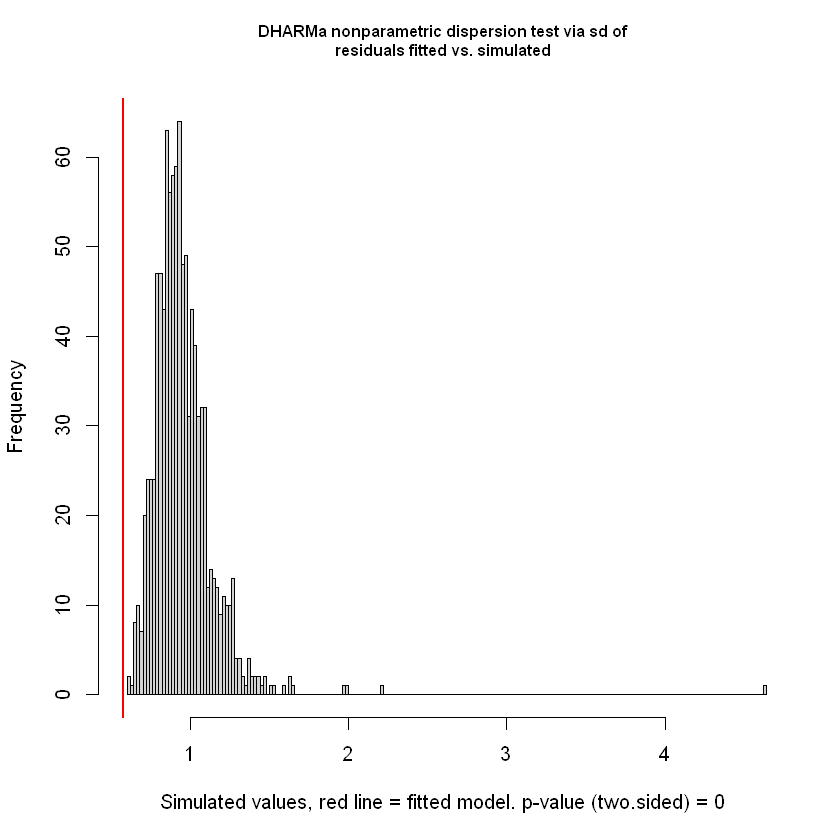


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 0, p-value = 0.032
alternative hypothesis: two.sided


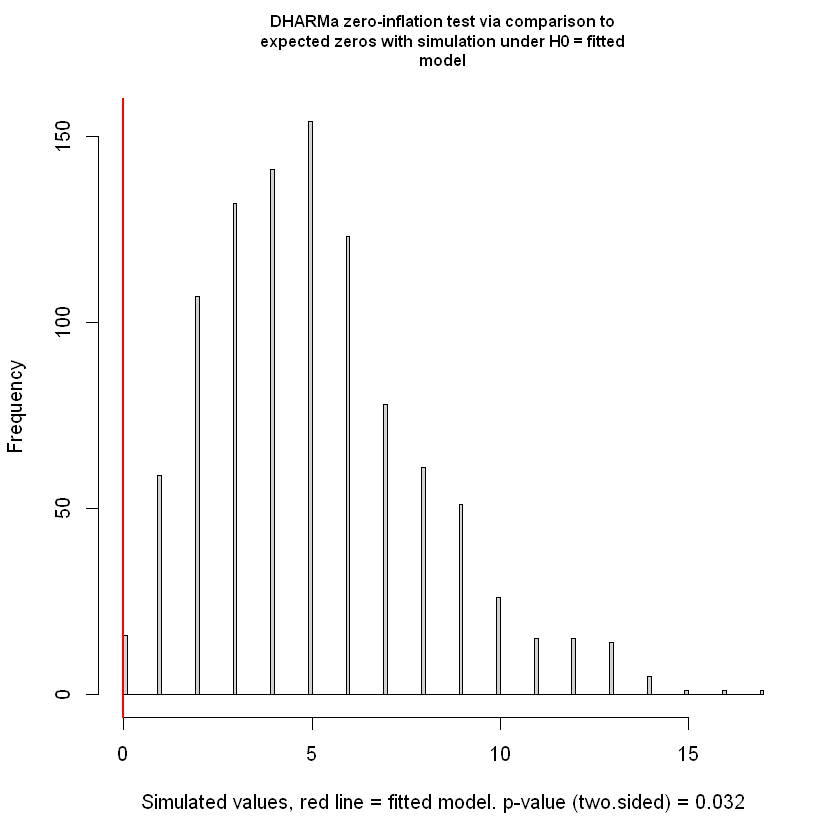

In [49]:
df_$Y = df_$weekly_avg_latency_1_Zone_min
hist(df_$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "nbinom1", data = df_)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + scale(I(WOA^2)) + (1|HenID), family = "nbinom1", data = df_)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)

# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(fecmodADMBf) %*%fixef(fecmodADMBf)[[1]]))#[[1]] instead of nothing for glmmadmb
# getting the observation-level variance Null model
omegaN <- summary(fecmodADMBr)$sigma #instead og fecmodADMBr$alpha in glmmadmb # overdispersion omega is alpha in
lambda <-as.numeric(exp(fixef(fecmodADMBr)[[1]] + 0.5 * (as.numeric(VarCorr(fecmodADMBr)[[1]])))) #[[1]] instead of [1] for glmmadmb
# lambda2 <- mean(df$Egg) # for lambda we use the mean of all
# observations
VarOdN <- omegaN/lambda # the delta method
VarOlN <-log(1 + omegaN/lambda) # log-normal approximation
VarOtN <-trigamma(lambda/omegaN) # trigamma function
# comparing the three
c(VarOdN = VarOdN, VarOlN = VarOlN, VarOlN = VarOtN)

# Full model
omegaF <- summary(fecmodADMBf)$sigma # overdispersion omega is alpha in glmmadmb instead of fecmodADMBf$alpha  for glmmadmb
VarOdF <- omegaF/lambda# the delta method
VarOlF <-log(1 + omegaF/lambda)# log-normal approximation
VarOtF <-trigamma(lambda/omegaF)# trigamma function# comparing the three
c(VarOdF = VarOdF, VarOlF = VarOlF, VarOlF = VarOtF)

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])))/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)

# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(fecmodADMBr)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBr)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(fecmodADMBf)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: nbinom2  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
 32583.8  32601.5 -16288.9  32577.8     2702 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.3798   0.6163  
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom2 family (): 2.69 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.12683    0.04619     111   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: nbinom2  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
 32407.7  32449.0 -16196.9  32393.7     2698 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.3919   0.626   
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom2 family (): 2.89 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    5.03623    0.06587   76.46   <2e-16 ***
TreatmentOFH                   0.14363    0.09350    1.54   0.1245    
scale(weekly_avg_temperature) -0.07419    0.03430   -2.16   0.0305 *  
scale(WOA)                    -0.13912    0.10022   -1.39   0.1651    
scale(I(WOA^2))                0.03533    0.10716    0.33   0.7416    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


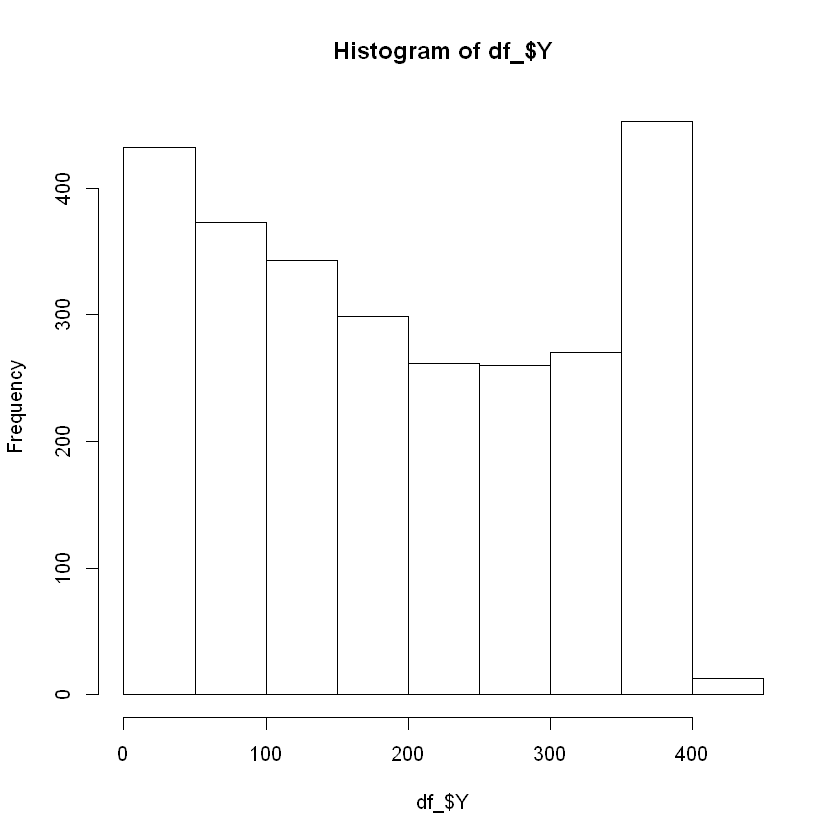

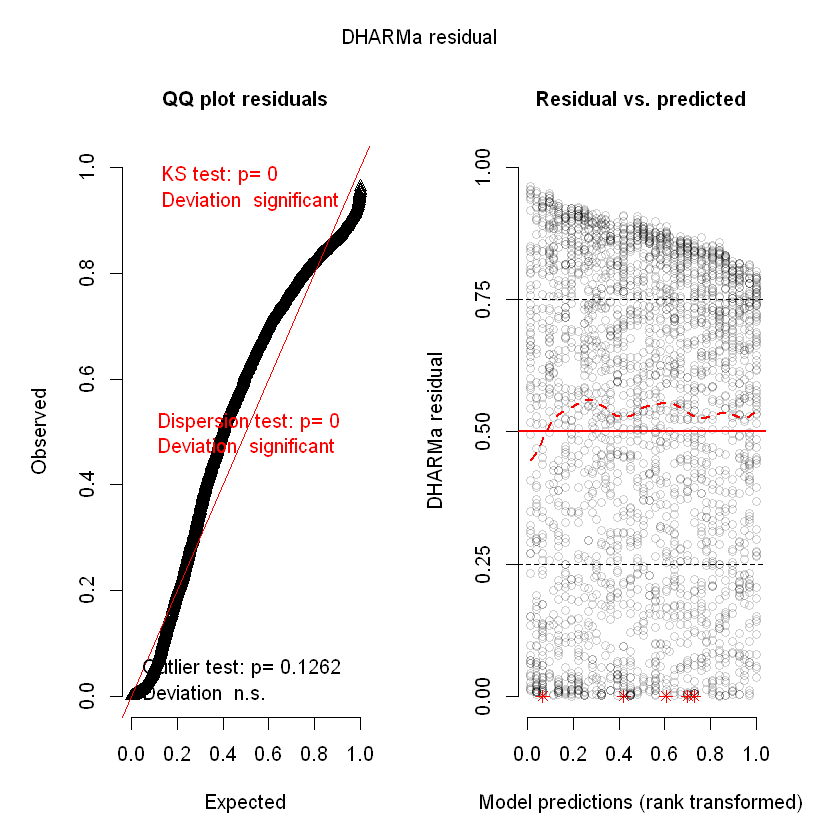


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 6, observations = 2705, p-value = 0.94
alternative hypothesis: two.sided
 percent confidence interval:
 0.0007208872 0.0066728281
sample estimates:
outlier frequency (expected: 0.00284288354898336 ) 
                                       0.002218115 


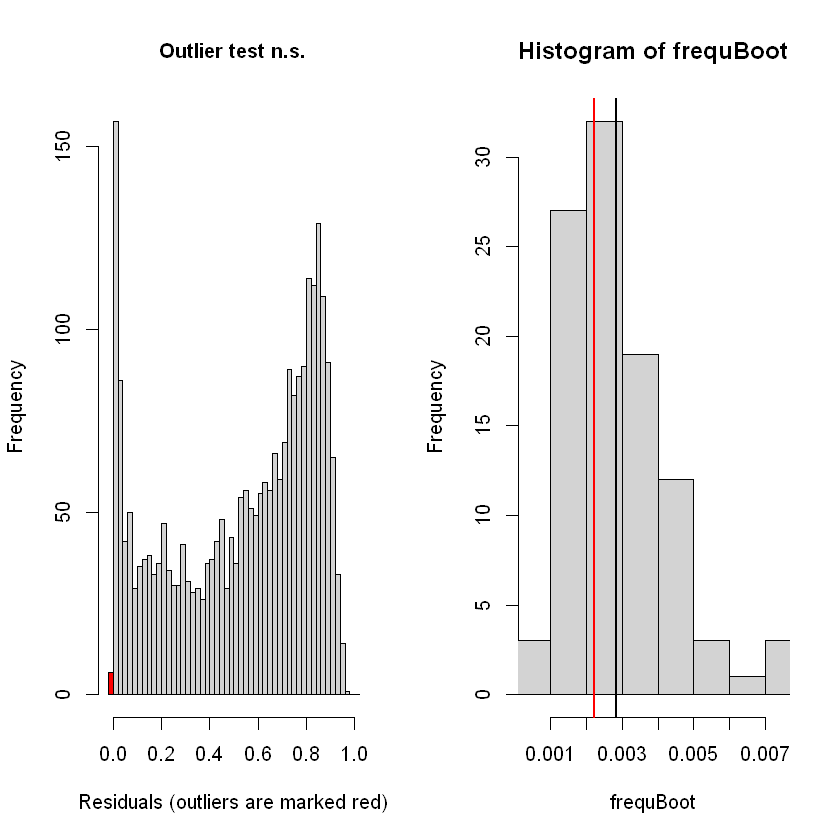


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.34362, p-value < 2.2e-16
alternative hypothesis: two.sided


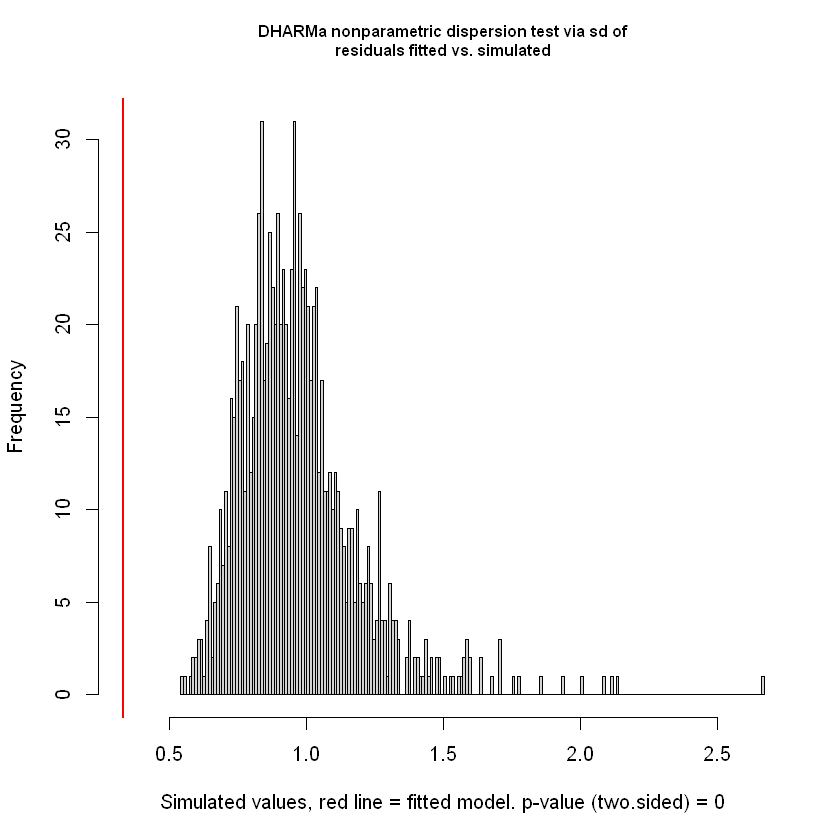


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 0, p-value = 1
alternative hypothesis: two.sided


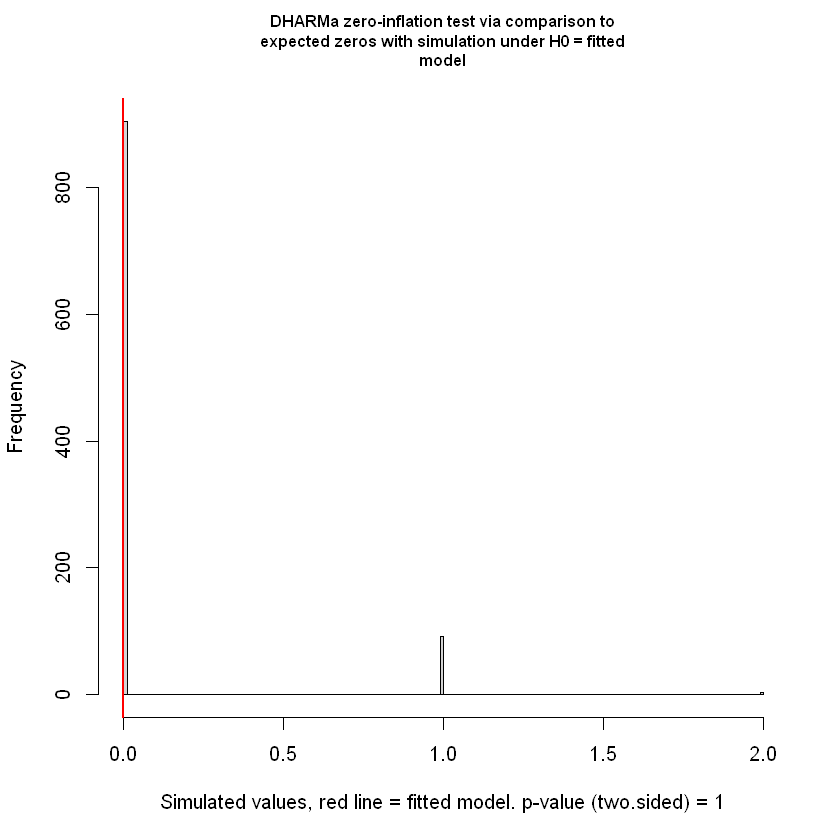

In [102]:
df_$Y = df_$weekly_avg_latency_1_Zone_min
hist(df_$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "nbinom2", data = df_)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + scale(I(WOA^2)) + (1|HenID), family="nbinom2", data = df_)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)
sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: poisson  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
122658.0 122669.7 -61327.0 122654.0     2607 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.4028   0.6346  
Number of obs: 2609, groups:  HenID, 183

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.06145    0.04696   107.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: poisson  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
114298.7 114333.9 -57143.3 114286.7     2603 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.4074   0.6383  
Number of obs: 2609, groups:  HenID, 183

Conditional model:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.981767   0.066603   74.80  < 2e-16 ***
TreatmentOFH                   0.135365   0.094448    1.43    0.152    
scale(weekly_avg_temperature) -0.072584   0.004224  -17.18  < 2e-16 ***
scale(WOA)                     0.063479   0.012441    5.10 3.35e-07 ***
scale(I(WOA^2))               -0.136197   0.013444  -10.13  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
DHARMa:testOutliers with type = binomial may have inflated Type 

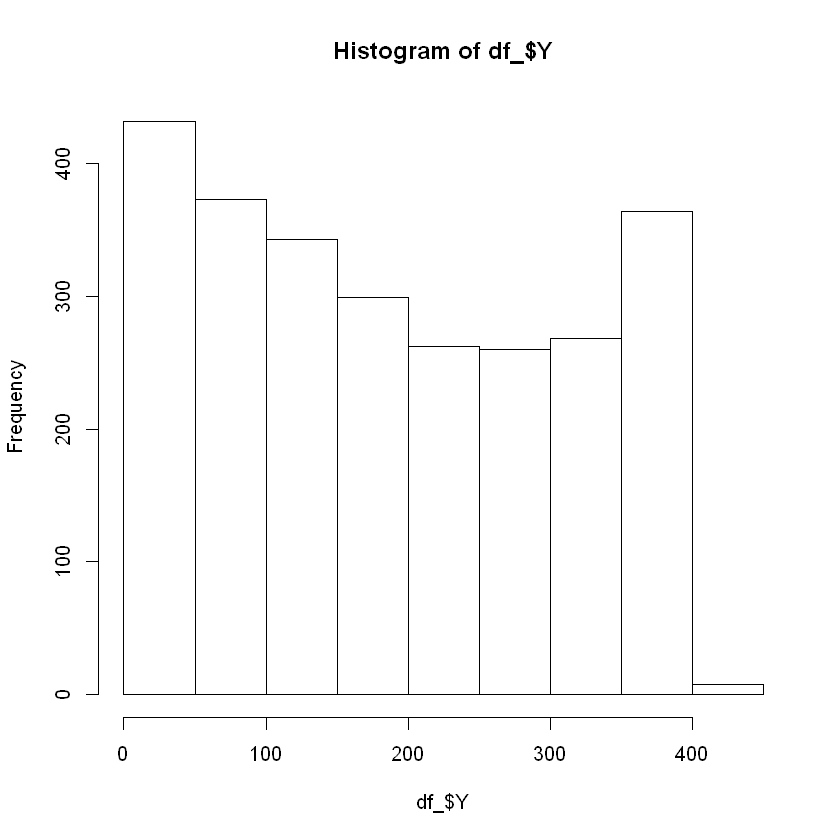

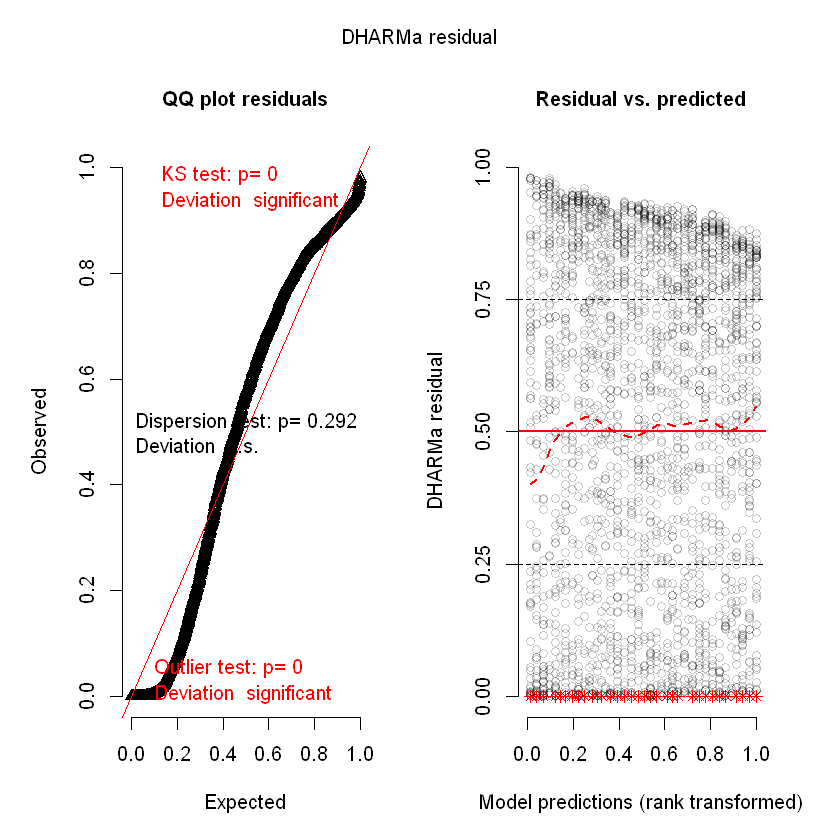


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 162, observations = 2609, p-value <
2.2e-16
alternative hypothesis: two.sided
 percent confidence interval:
 0.00000000 0.01190111
sample estimates:
outlier frequency (expected: 0.00287083173629743 ) 
                                        0.06209276 


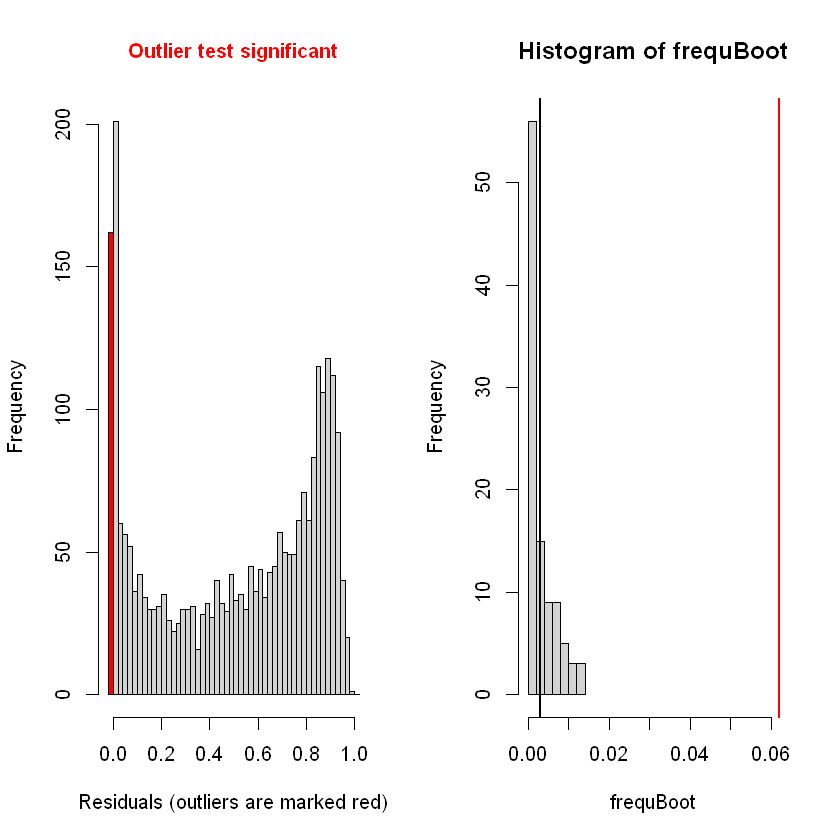


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.74757, p-value = 0.292
alternative hypothesis: two.sided


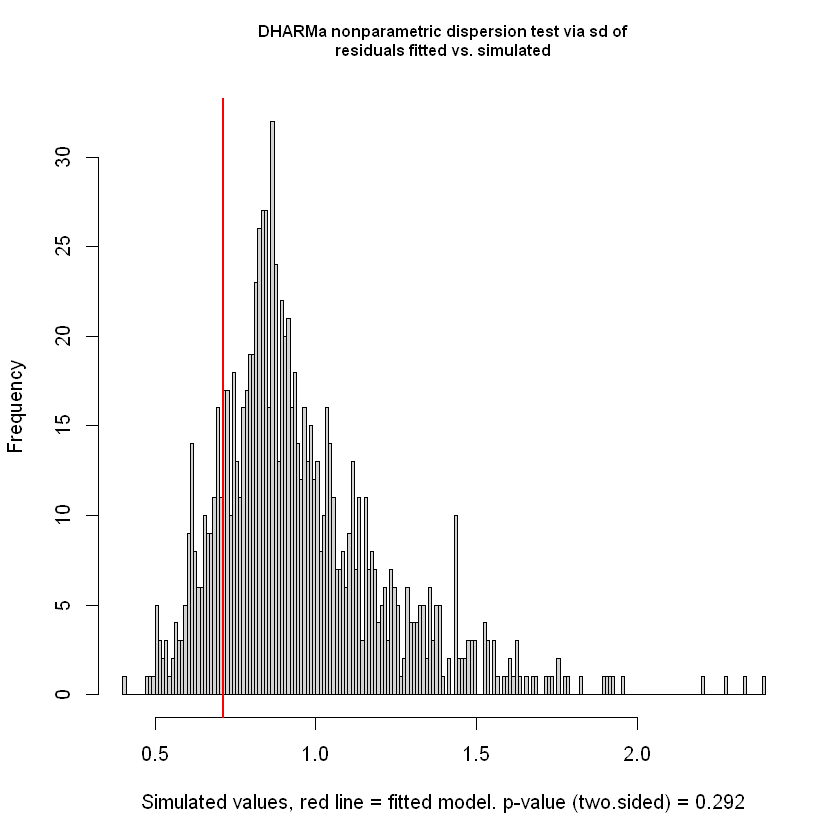


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = NaN, p-value = 1
alternative hypothesis: two.sided


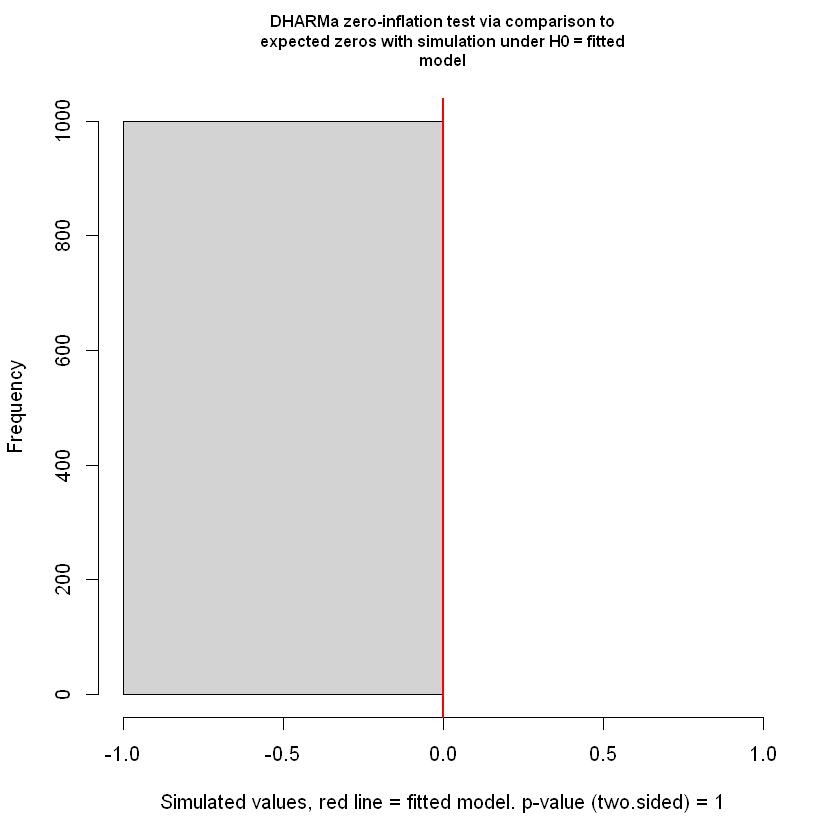

In [57]:
df_$Y = df_$weekly_avg_latency_1_Zone_min
hist(df_$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "poisson", data = df_)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + scale(I(WOA^2)) + (1|HenID), family="poisson", data = df_)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)
sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

In [75]:
asin(sqrt(0))
asin(sqrt(1))
asin(sqrt(-1))

[1] 0

[1] 1.570796

Warning message in sqrt(-1):
"production de NaN"


[1] NaN

In [80]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}


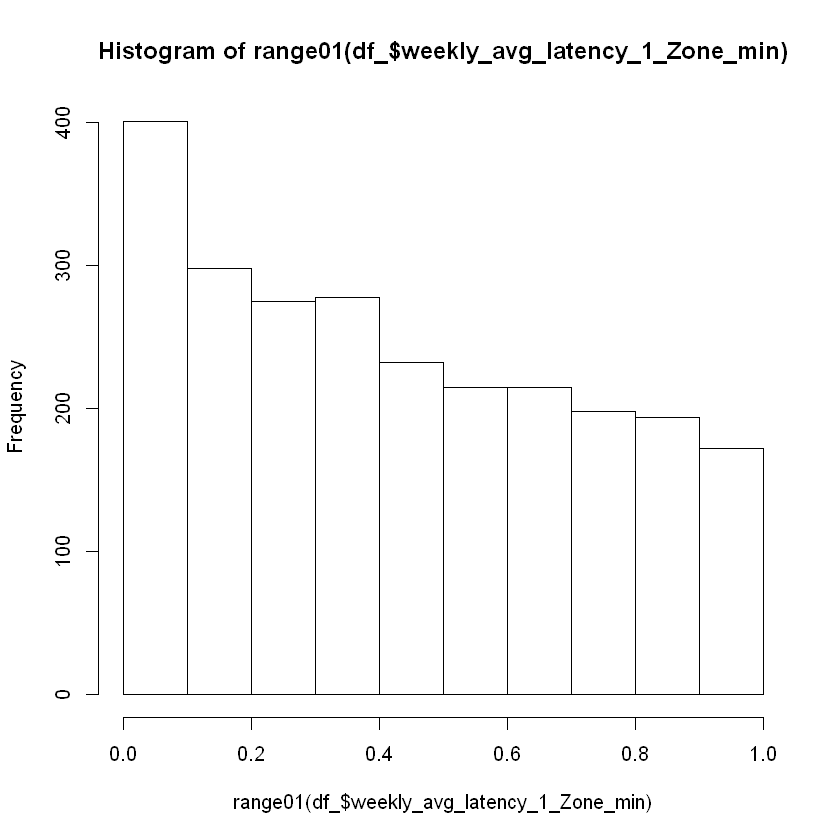

In [81]:
hist(range01(df_$weekly_avg_latency_1_Zone_min))

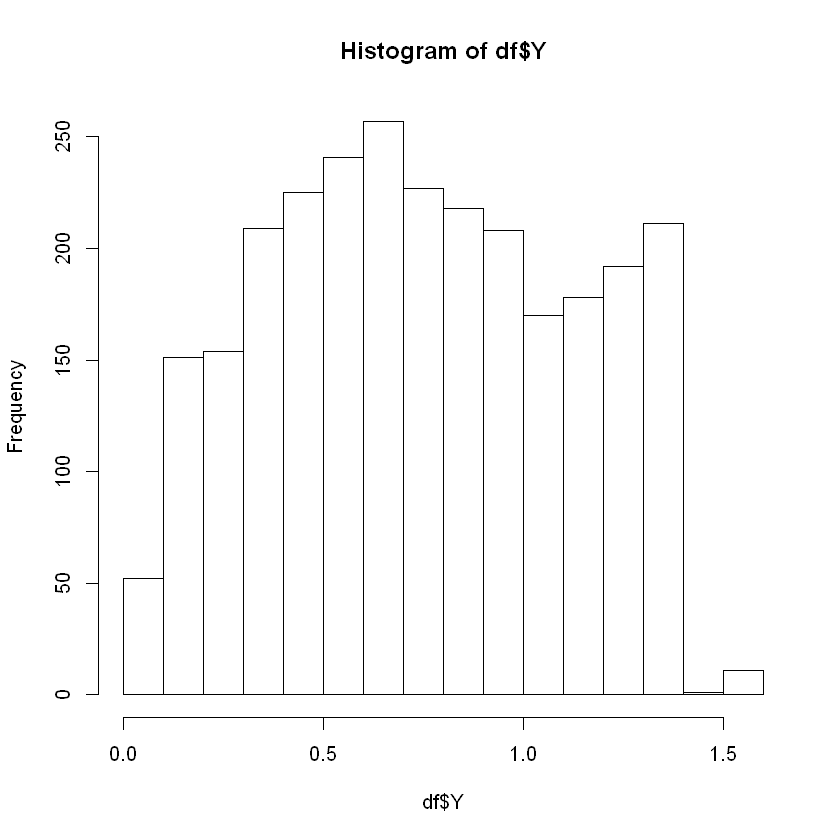

In [85]:
df$Y = asin(sqrt(range01(df$weekly_avg_latency_1_Zone_min)))
hist(df$Y)

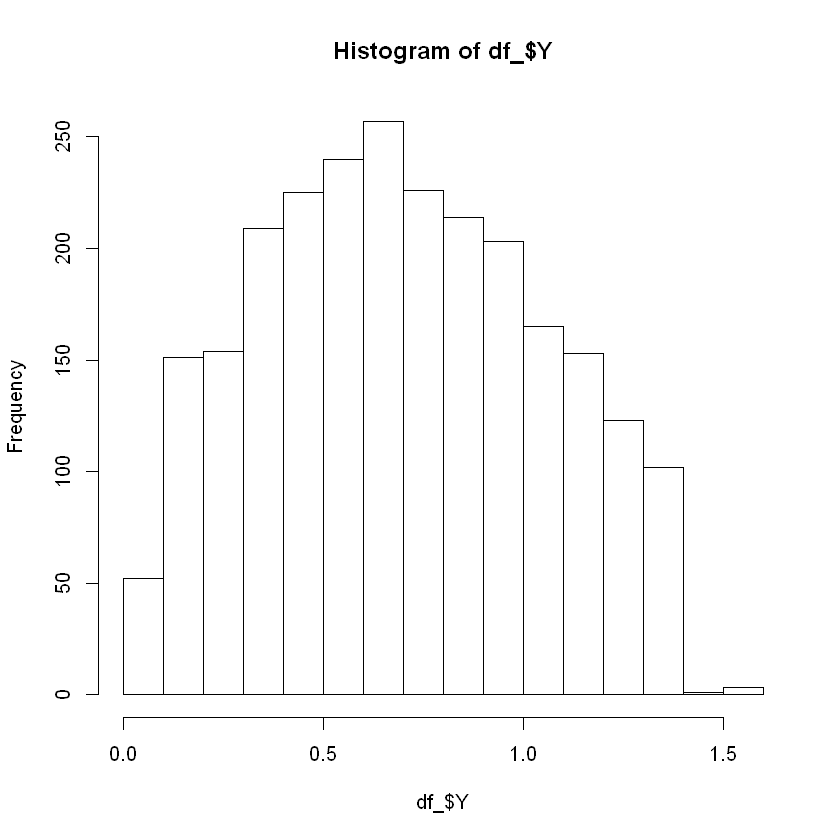

In [84]:
df_$Y = asin(sqrt(range01(df_$weekly_avg_latency_1_Zone_min)))
hist(df_$Y)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: gaussian  ( identity )
Formula:          Y ~ 1 + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
   423.2    440.7   -208.6    417.2     2475 

Random effects:

Conditional model:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.06143  0.2478  
 Residual             0.05722  0.2392  
Number of obs: 2478, groups:  HenID, 174

Dispersion estimate for gaussian family (sigma^2): 0.0572 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.69230    0.01951   35.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: gaussian  ( identity )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
   185.6    226.3    -85.8    171.6     2471 

Random effects:

Conditional model:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.06266  0.2503  
 Residual             0.05139  0.2267  
Number of obs: 2478, groups:  HenID, 174

Dispersion estimate for gaussian family (sigma^2): 0.0514 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.65275    0.02758  23.664  < 2e-16 ***
TreatmentOFH                   0.07477    0.03924   1.906  0.05671 .  
scale(weekly_avg_temperature) -0.04313    0.01352  -3.191  0.00142 ** 
scale(WOA)                    -0.02109    0.03929  -0.537  0.59145    
scale(I(WOA^2))               -0.01462    0.04191  -0.349  0.72723    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


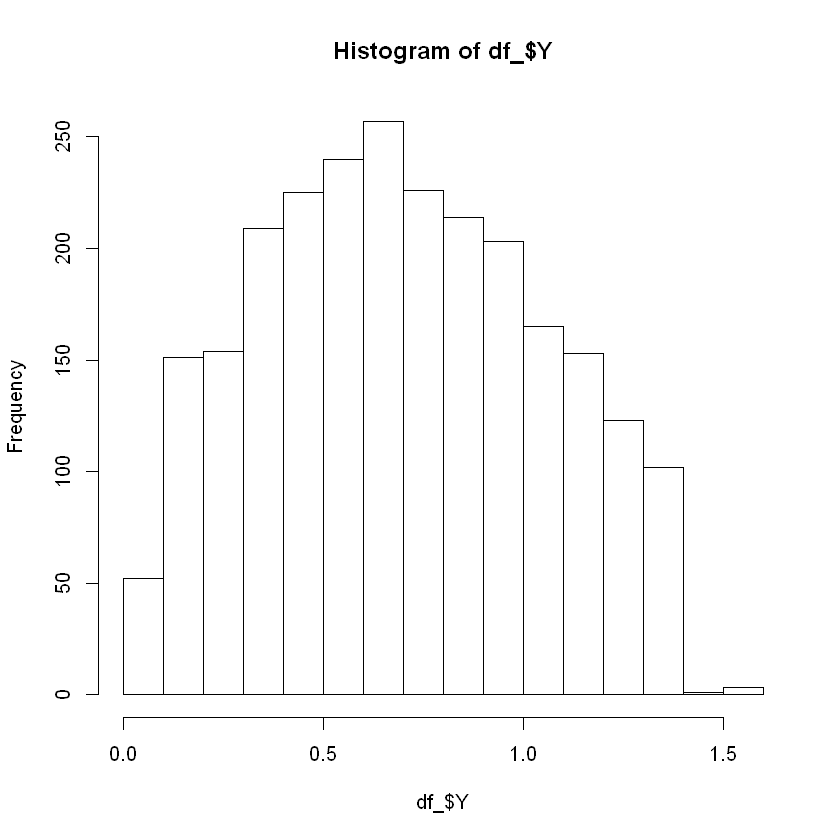

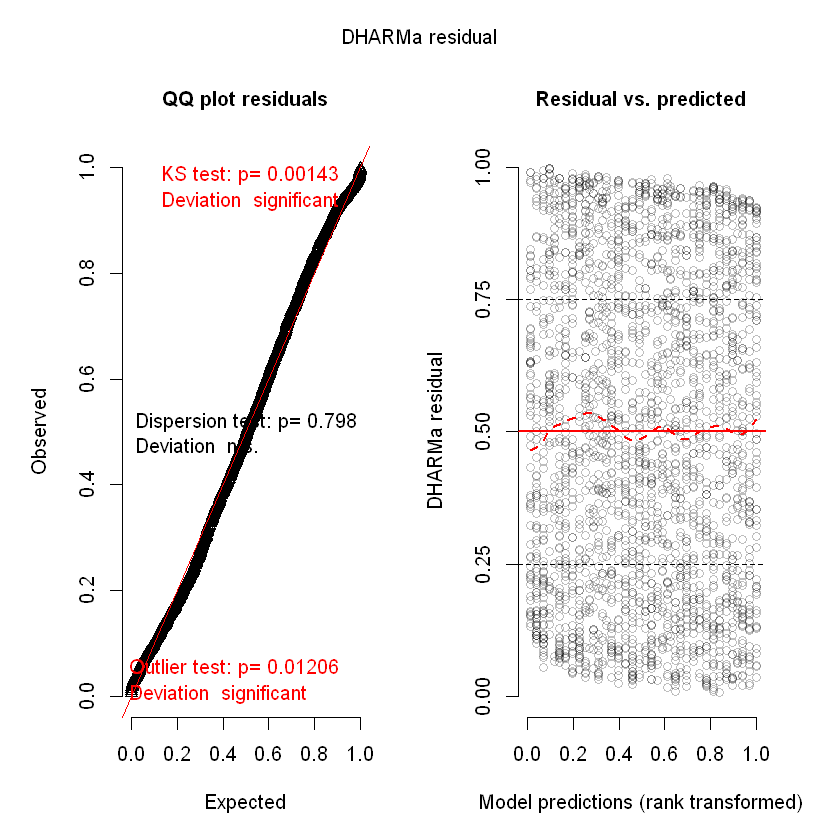


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 0, observations = 2478, p-value < 2.2e-16
alternative hypothesis: two.sided
 percent confidence interval:
 0.0008071025 0.0060532688
sample estimates:
outlier frequency (expected: 0.00319612590799031 ) 
                                                 0 


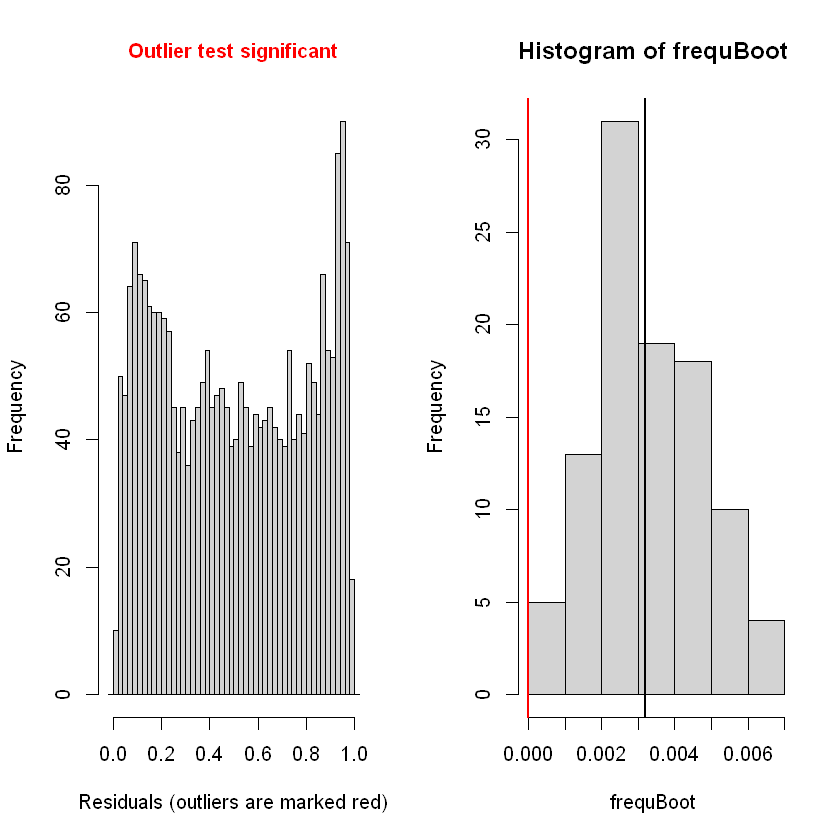


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.98177, p-value = 0.798
alternative hypothesis: two.sided


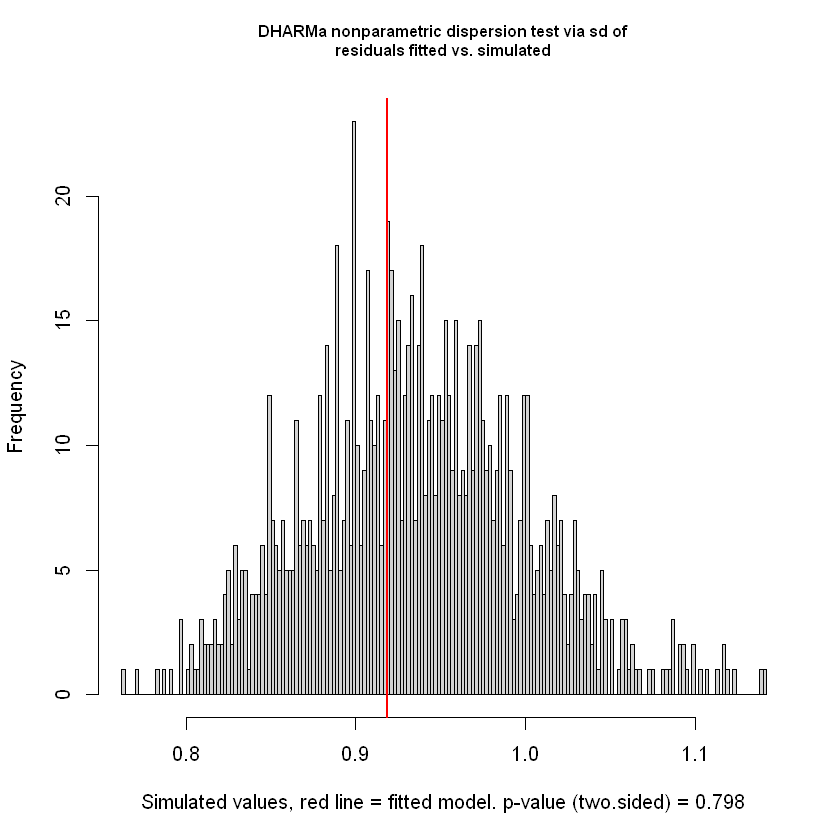


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = Inf, p-value < 2.2e-16
alternative hypothesis: two.sided


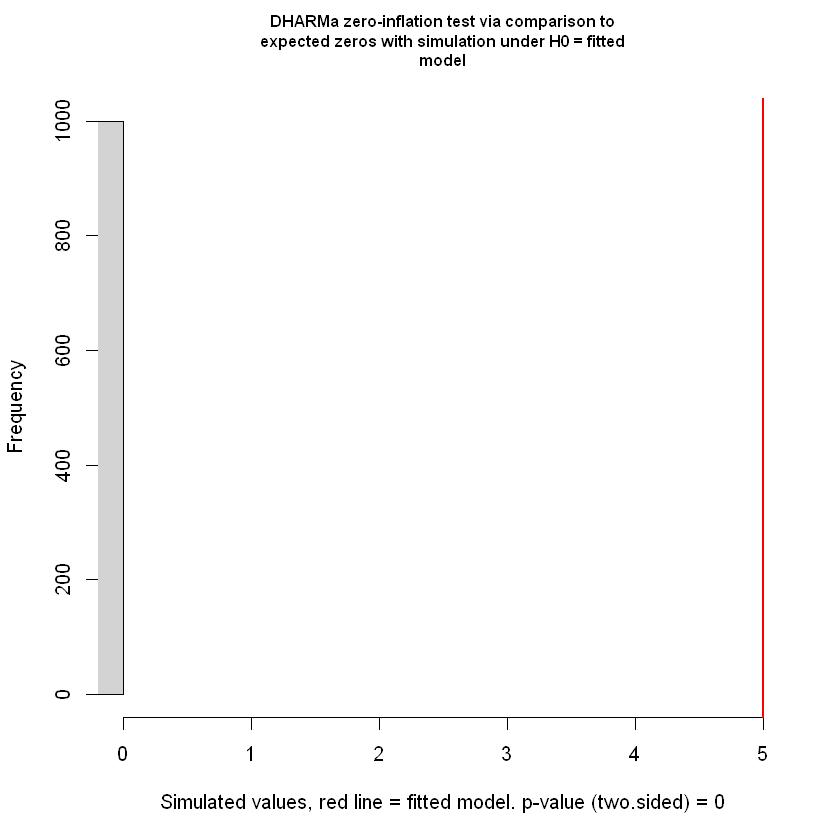

In [86]:
#df_$Y = df_$weekly_avg_latency_1_Zone_min
hist(df_$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "gaussian", data = df_)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + scale(I(WOA^2)) + (1|HenID), family="gaussian", data = df_)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)
sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

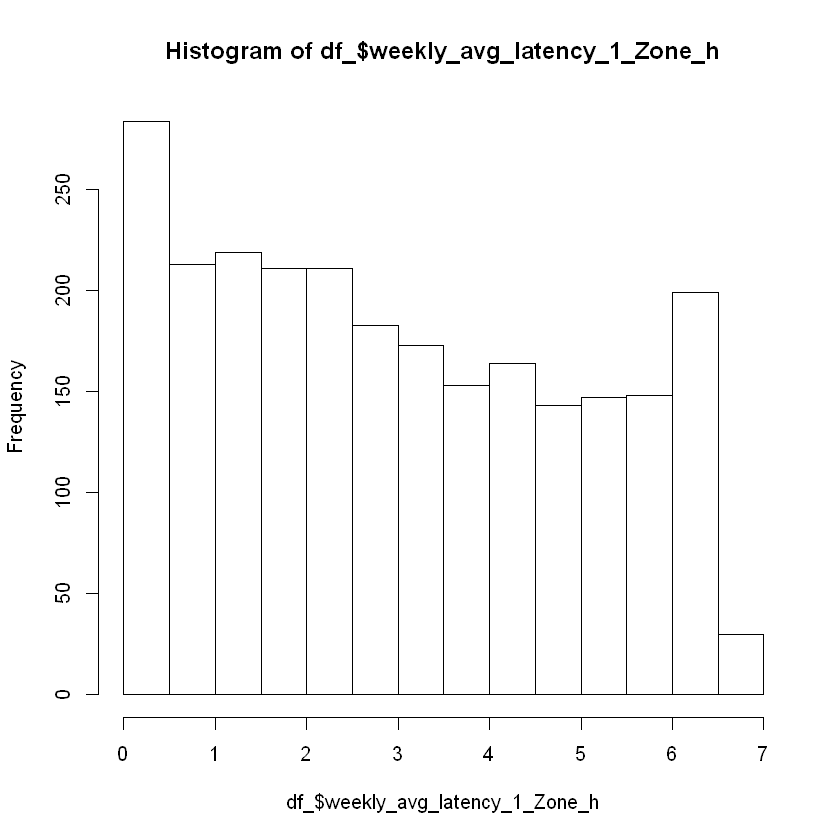

In [63]:
hist(df_$weekly_avg_latency_1_Zone_h)

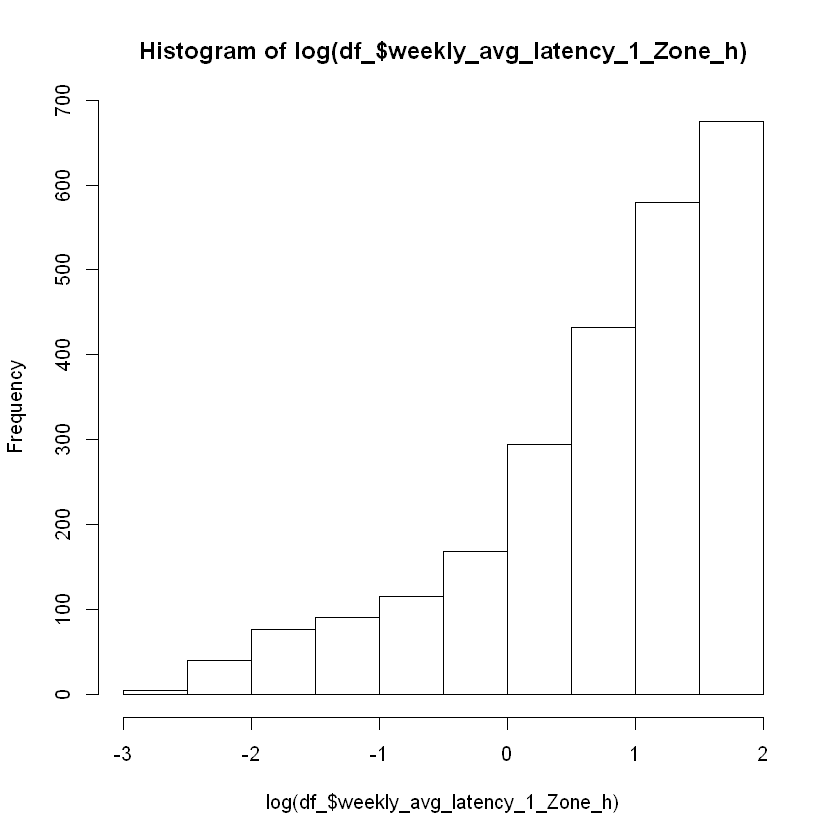

In [67]:
hist(log(df_$weekly_avg_latency_1_Zone_h))

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: gaussian  ( identity )
Formula:          Y ~ 1 + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
   375.1    392.7   -184.6    369.1     2642 

Random effects:

Conditional model:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.07547  0.2747  
 Residual             0.05471  0.2339  
Number of obs: 2645, groups:  HenID, 185

Dispersion estimate for gaussian family (sigma^2): 0.0547 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.7257     0.0208   34.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: gaussian  ( identity )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
   142.8    184.0    -64.4    128.8     2638 

Random effects:

Conditional model:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.07667  0.2769  
 Residual             0.04959  0.2227  
Number of obs: 2645, groups:  HenID, 185

Dispersion estimate for gaussian family (sigma^2): 0.0496 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.68547    0.02948  23.248  < 2e-16 ***
TreatmentOFH                   0.07617    0.04180   1.822  0.06841 .  
scale(weekly_avg_temperature) -0.03765    0.01280  -2.942  0.00326 ** 
scale(WOA)                    -0.01169    0.03731  -0.313  0.75409    
scale(I(WOA^2))               -0.02473    0.03975  -0.622  0.53386    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


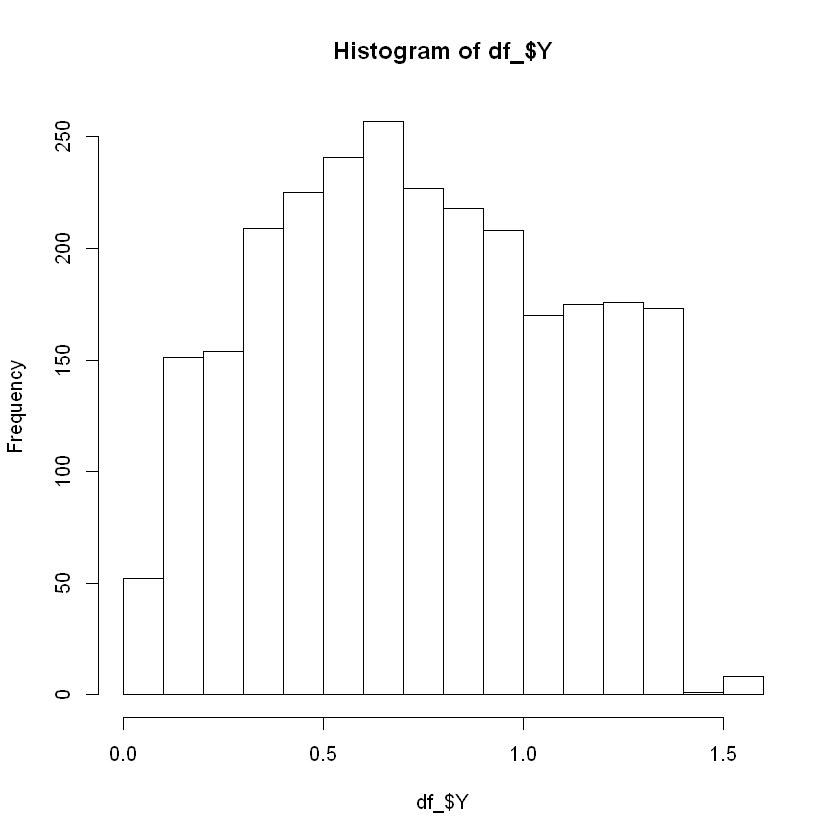

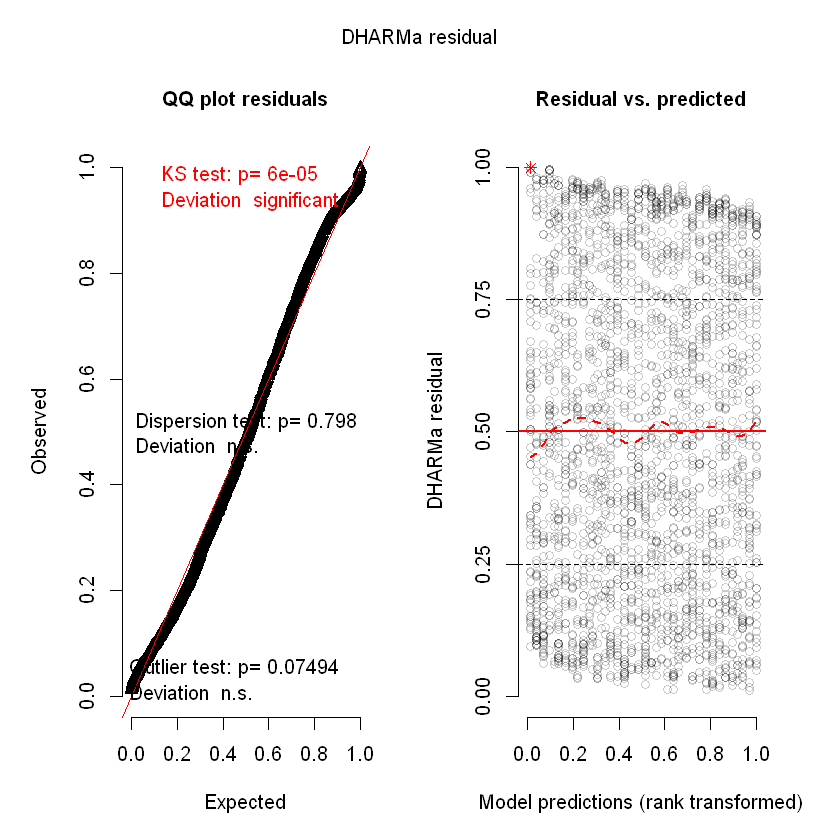


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 1, observations = 2645, p-value < 2.2e-16
alternative hypothesis: two.sided
 percent confidence interval:
 0.0007561437 0.0066257089
sample estimates:
outlier frequency (expected: 0.00336862003780718 ) 
                                      0.0003780718 


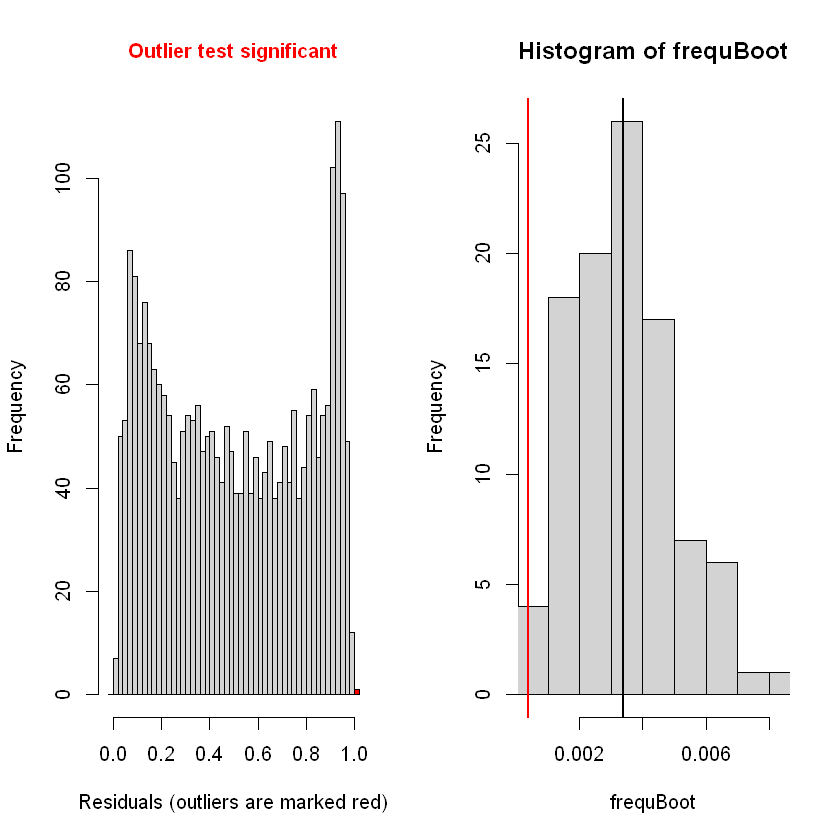


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.98084, p-value = 0.798
alternative hypothesis: two.sided


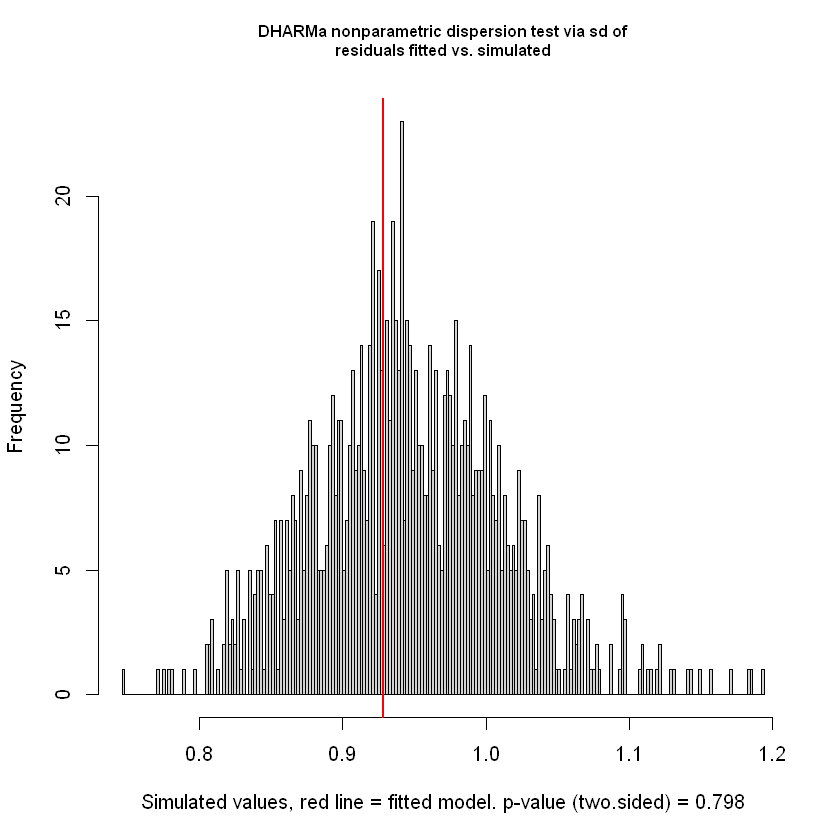


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = Inf, p-value < 2.2e-16
alternative hypothesis: two.sided


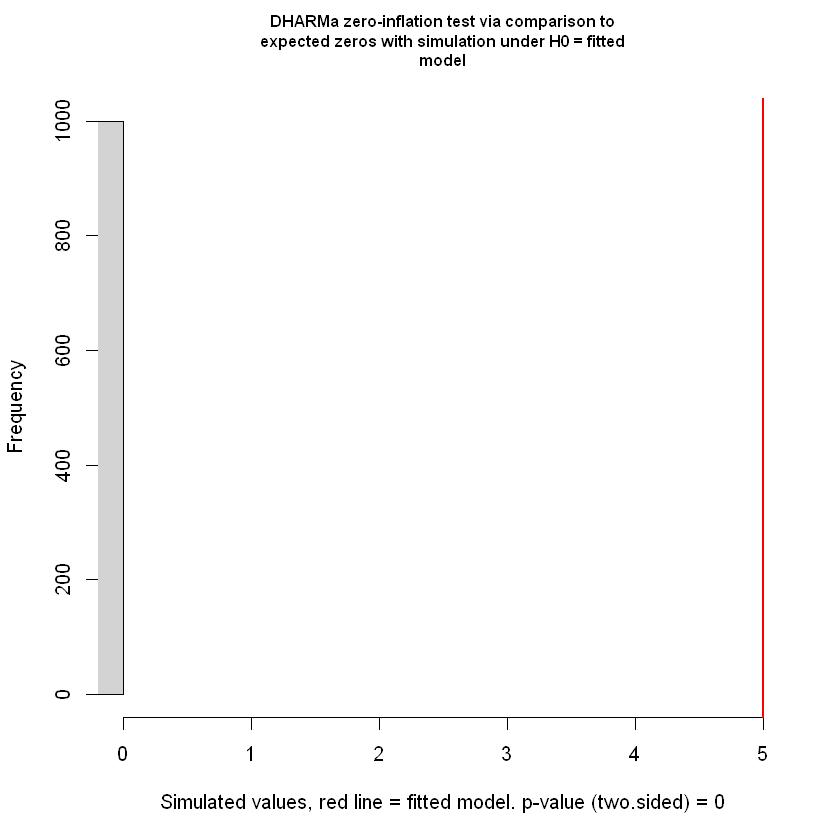

In [98]:
#never goes outside
df_ = df[!(df$HenID %in% c('hen_123',
 'hen_135',
 'hen_146',
 'hen_213',
 'hen_221',
 'hen_228',
 'hen_32',
 'hen_39',
 'hen_81')), ] 
#df_ = df
df_$Y = asin(sqrt(range01(df_$weekly_avg_latency_1_Zone_min)))
hist(df_$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family='gaussian', data = df_)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + scale(I(WOA^2)) + (1|HenID), family='gaussian', data = df_)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)
sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: gaussian  ( identity )
Formula:          Y ~ 1 + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
   367.6    385.3   -180.8    361.6     2702 

Random effects:

Conditional model:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.08522  0.2919  
 Residual             0.05375  0.2318  
Number of obs: 2705, groups:  HenID, 194

Dispersion estimate for gaussian family (sigma^2): 0.0537 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.75068    0.02155   34.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: gaussian  ( identity )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df_

     AIC      BIC   logLik deviance df.resid 
   133.6    174.9    -59.8    119.6     2698 

Random effects:

Conditional model:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.08550  0.2924  
 Residual             0.04882  0.2209  
Number of obs: 2705, groups:  HenID, 194

Dispersion estimate for gaussian family (sigma^2): 0.0488 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.71215    0.03033  23.477  < 2e-16 ***
TreatmentOFH                   0.07146    0.04306   1.660  0.09697 .  
scale(weekly_avg_temperature) -0.03691    0.01260  -2.930  0.00339 ** 
scale(WOA)                    -0.02089    0.03675  -0.568  0.56970    
scale(I(WOA^2))               -0.01580    0.03915  -0.404  0.68649    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


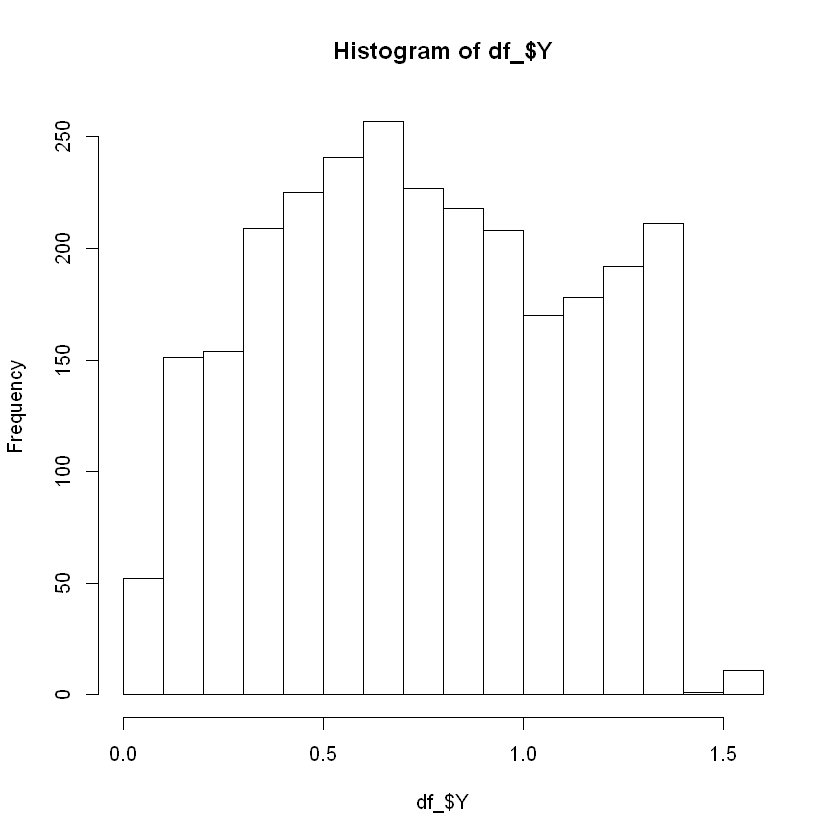

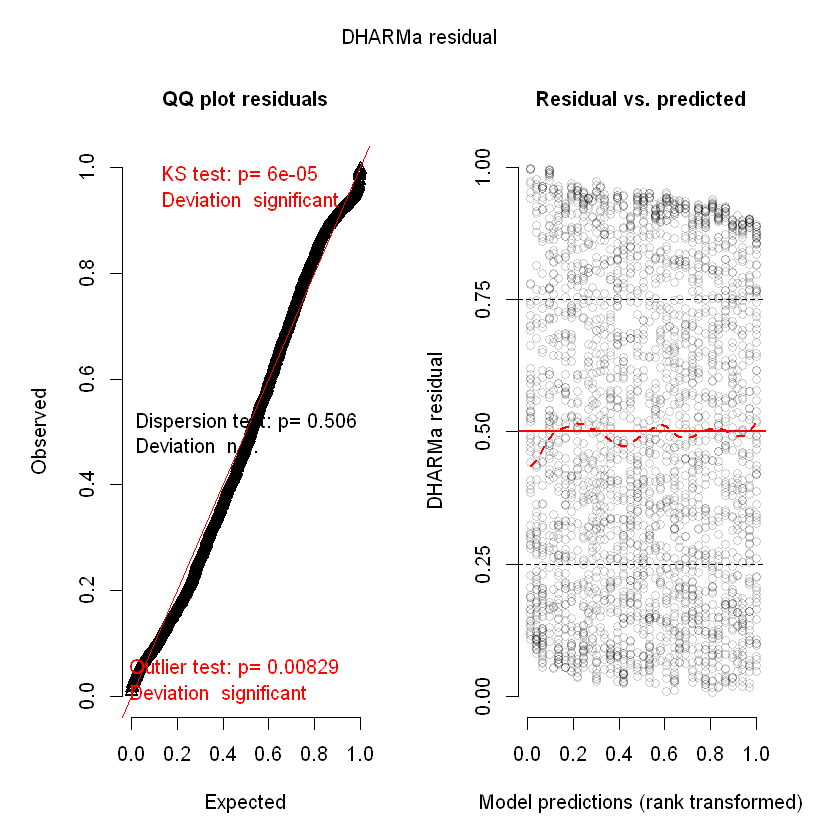


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 0, observations = 2705, p-value < 2.2e-16
alternative hypothesis: two.sided
 percent confidence interval:
 0.0007393715 0.0057393715
sample estimates:
outlier frequency (expected: 0.00314972273567468 ) 
                                                 0 


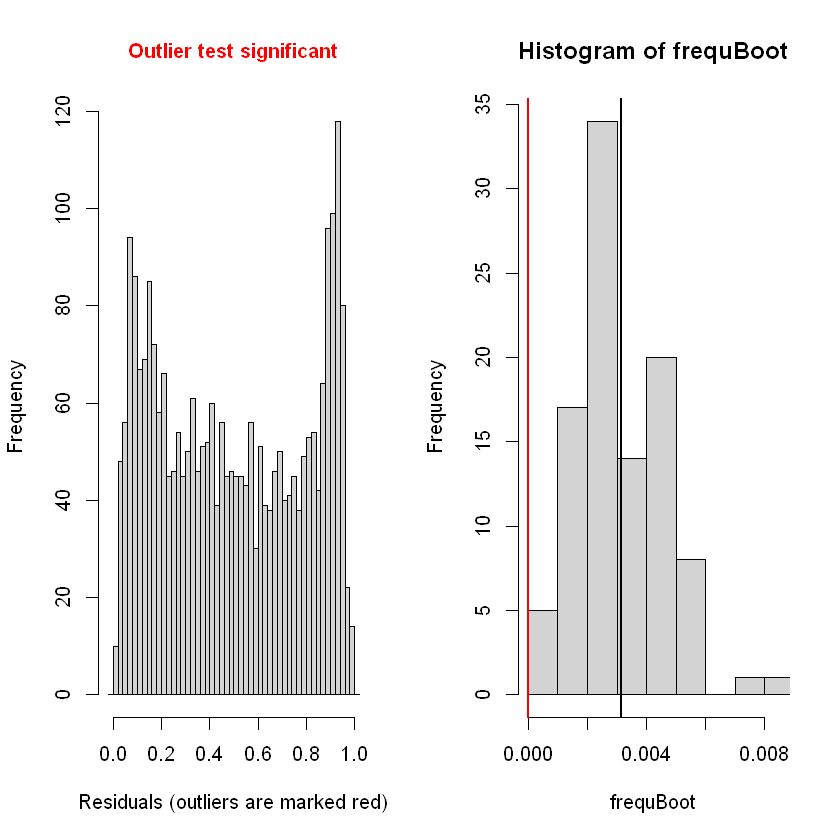


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.94995, p-value = 0.506
alternative hypothesis: two.sided


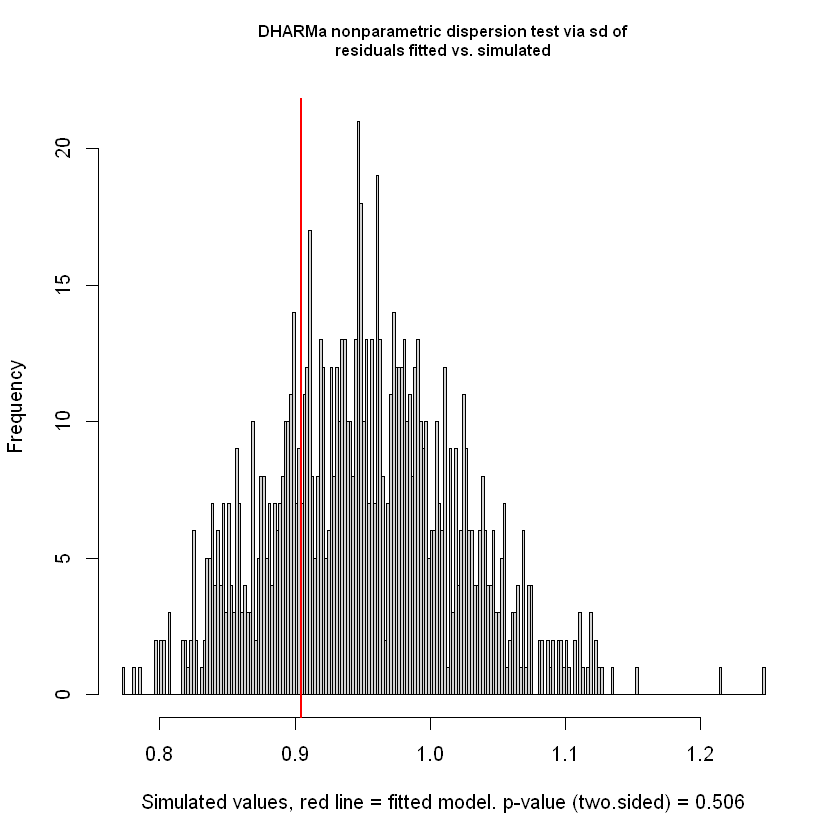


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = Inf, p-value < 2.2e-16
alternative hypothesis: two.sided


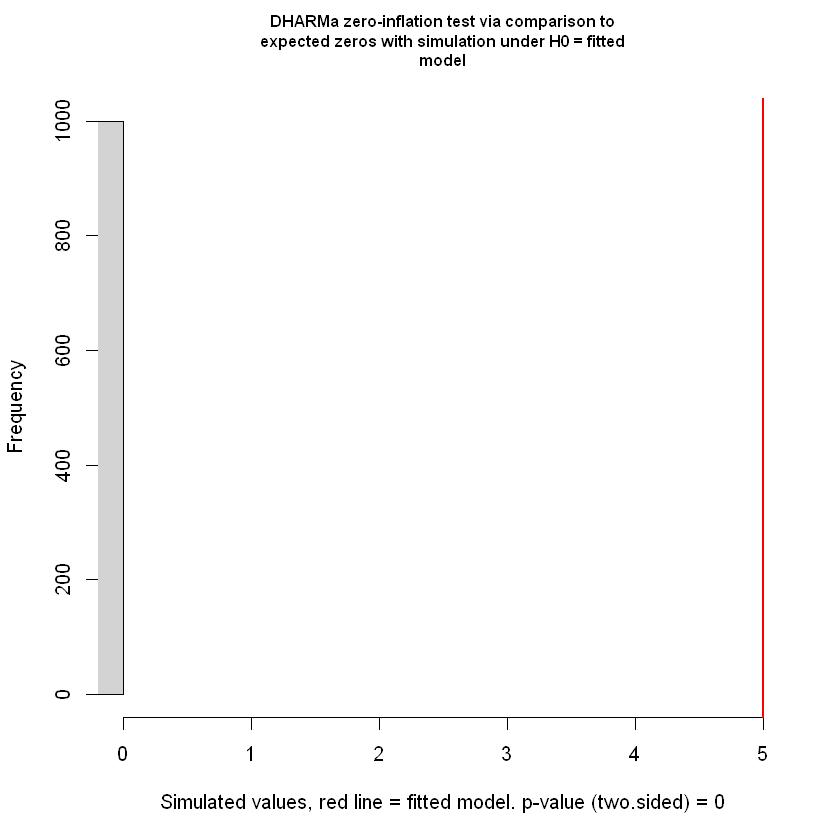

In [100]:
#all individuals
df_ = df
df_$Y = asin(sqrt(range01(df_$weekly_avg_latency_1_Zone_min)))
hist(df_$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family='gaussian', data = df_)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + scale(I(WOA^2)) + (1|HenID), family='gaussian', data = df_)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)
sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

### weekly_std_time_midduratioZ4_min

In [5]:
df$weekly_std_time_midduratioZ4_min
sum(df$weekly_std_time_midduratioZ4_min==0)
sum(df$weekly_std_time_midduratioZ4_min!=0)

[1]  11  11  13  15   5  19   7   4  16   5  29  10   6   8   6  59  16  22
  [19]   9   8  12  17  26  17  51  21   9   7  11  30  16  13   5  10  20  20
  [37]  10  10  31  96  92  23  19   7  26  27  15  11  19   8   7  21  15  14
  [55]  10  22  56  19  18  16   3   6  83   8   6  17  10  10  23  13  11  10
  [73]  12  15  18  13  21   8  12  16   9  18  11   8   6  11  10   8   9   7
  [91]   5   6  22   7  18   8   8  13   6  98  50   8  10  24   7  11  11   2
 [109]   6   3   3  88  15   7   5  10   6  15   9  12   6  12  11  29  10  13
 [127]   6  12  22   5  13  15  12  30  18   5   7  16   6  26  24  16   8  10
 [145]  13  87   7  16  31   9  34 128  31  19  10   3  11  15   9   8   8  13
 [163]  12 268  35  25  15  13  16  15  18   6  17  22   8  21  23  15  17  34
 [181]  15  79  14   9   6   7   8  11  16  12  10  31 115   6   6  16 103  40
 [199]  28 287  24  22  17  12  16  17  18  32   7  16   6  36  20  27  29  24
 [217]  53  12  22  20  12  14  16  10  10  39   7  36  21  14  49  29  32  55
 [235]  41  12  73 112  10  12   6  11  10   7  17  15   8  13  13  25  15   8
 [253]  58  14  18  29  12  17  39  19  19   9   8  50  12  13   3  10   5   6
 [271]  20   5   6   7   4   8   5  10  30   4  14  10  13  15  11 247  22  19
 [289] 259 271  16   6  12   6   6  11   8   4  12  11   5   6   7  61  56  45
 [307]  40   4  27  14   6  17   9   7   7  34  48 257  13  12  12  28  11  18
 [325]  14   8  14  14   6   9  35  12  17  44   8   7   9   4  78  10   5   9
 [343]  44  26   4   9   2  14  15  14  27 280  47   7  23  32  13   8  11   9
 [361]   9   7  20   7 103  19  13  16  55 196  10  34  29  18  19  18   4  10
 [379]   9  13  38  39  15  45  23  14   9  19   9  14  19  18 101  65 187 295
 [397]  79 270  23  14   3  13  22   5  16  42   9  21   5   9   8  11  56   4
 [415]  11  10  30  19  30  20  30  14  12  10 104 119  29  19  30  45  23  17
 [433]  12  17   5   7   9   7   9  12  11   6  18   7  17  13  17  10   7   8
 [451]  12  15   8  24  30  24  17  17  16  10  12  11   6   5  11 154 103   7
 [469]  12  24  56   7   8  16  11  11   4 179  14  19  14  18  15  11  23  20
 [487]  19   9  48 153 273  48  18   8   7  19   5   7  18   5   8  11  51  37
 [505]  27   8  51  10  11  12   6  14   6   3   9   9  10  11   7   9  10   9
 [523]  24   9  18  15  12   6   8  19  11   9  54  31  48  13  22  20  10  22
 [541]  21  17  32  17 175  18  10   7   3  14   7  17  11  13  12   7  13   7
 [559]  10  41  12  16  14  24   7  25   8  10  10  15  20  17  10   9 198  35
 [577]  26  21  48  20  18   6  22   8   9  13   8  11  12 108  34  23  42  10
 [595]   9  11  18  15  26  31  14   9  14   9   8   4  83  43   5  10   7  14
 [613]   7  21  18  19   5  15   6   5  16   6   9   4  10  10  23  11  17  17
 [631]  16  12  11   8   6   5  39   4  51   8   9   7 289 101  15  54  22  14
 [649]  18  15  83  14   8  14   5  15  24  20  28  16  31  27  37   9  19  13
 [667]  24  18  50  25  25  13  10  10  10  25 168  17 111  14  41  44  14  15
 [685]  23  26  37  23  40  28  38  63  61  64  63  11  13   8  21   7  18  25
 [703]   9  26  17  16  13  10  13  14  44  19  11  11   9   8  15   8  14  10
 [721]  16  10  71  31  16  35  21  12  30  33  60   6 234  45  10  31   5   7
 [739]  36  24  18   8  13   7   7 139  14   7  22  11   5   8  13  13  15  10
 [757]  10   9  13   6  11   5   5  10  17   7  15   9  19  14   8  11  11   9
 [775]  22  42  24  11  39  13  38  16  14  17  55  21  31 184 117   8  12   5
 [793]  12   9 134   4   7   9  15   4   4  11  22  10   8  15  14  26 240   5
 [811]   4  32  54   4  15   5  17  86 185 251  33  59  15  80 105  14  21  35
 [829]  10  48  52  30  29  12  14   5  18   1  20   7  15  13  18  26  12  12
 [847]   3  14  22  16  16   6  29  20   7  22  10  38   5   9   9  70   6  75
 [865]  21  14  11  21  29   3  25  20  20 229  25   9  21 300  17   8  10 165
 [883]  27  11  11  18   6   6  24   8  47  82 105  72 140 163  70  26  19  13
 [901]  13  44  68  16   7  13  11   9   9  34  34  2

[1] 0

[1] 2705

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: nbinom1  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 22872.4  22890.1 -11433.2  22866.4     2702 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.04636  0.2153  
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom1 family (): 18.1 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.20976    0.02348   136.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: nbinom1  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 22875.0  22910.4 -11431.5  22863.0     2699 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.04606  0.2146  
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom1 family (): 18.1 

Conditional model:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.249449   0.031460  103.29   <2e-16 ***
TreatmentOFH                  -0.079360   0.042946   -1.85   0.0646 .  
scale(weekly_avg_temperature)  0.001544   0.038499    0.04   0.9680    
scale(WOA)                     0.001001   0.038869    0.03   0.9795    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

VarOdN    VarOlN    VarOlN 
0.7149588 0.5393891 1.0266618

VarOdF    VarOlF    VarOlF 
0.7139966 0.5388279 1.0247962

R2glmmM     R2glmmC   ICCrawPop   ICCadjPop 
0.001471518 0.044418833 0.043202730 0.043010605

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
DHARMa:testOutliers with type = binomial may have inflated Type 

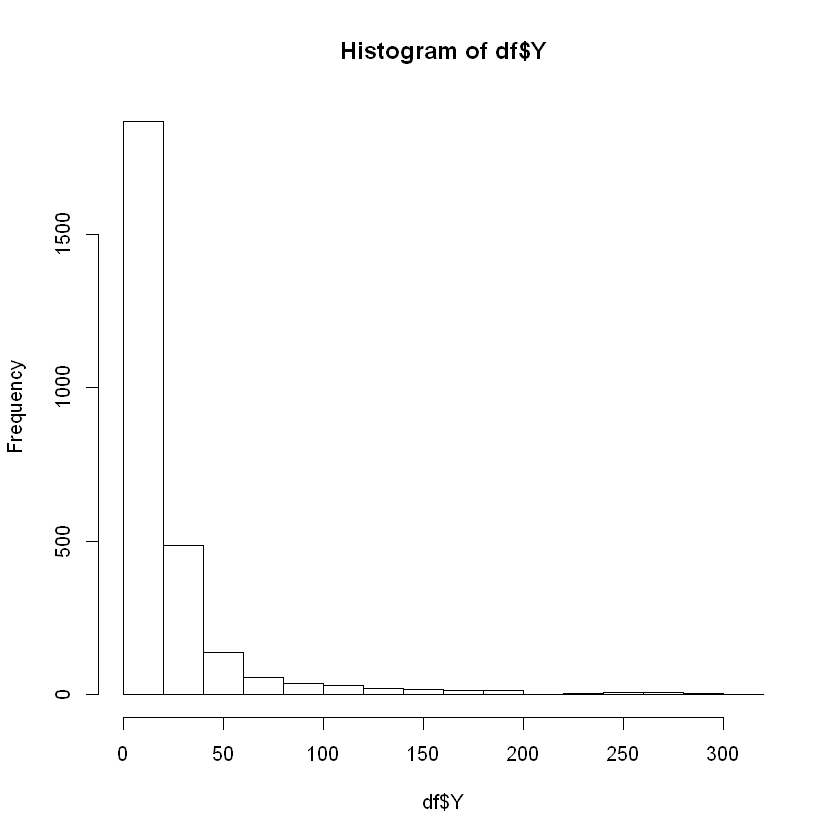

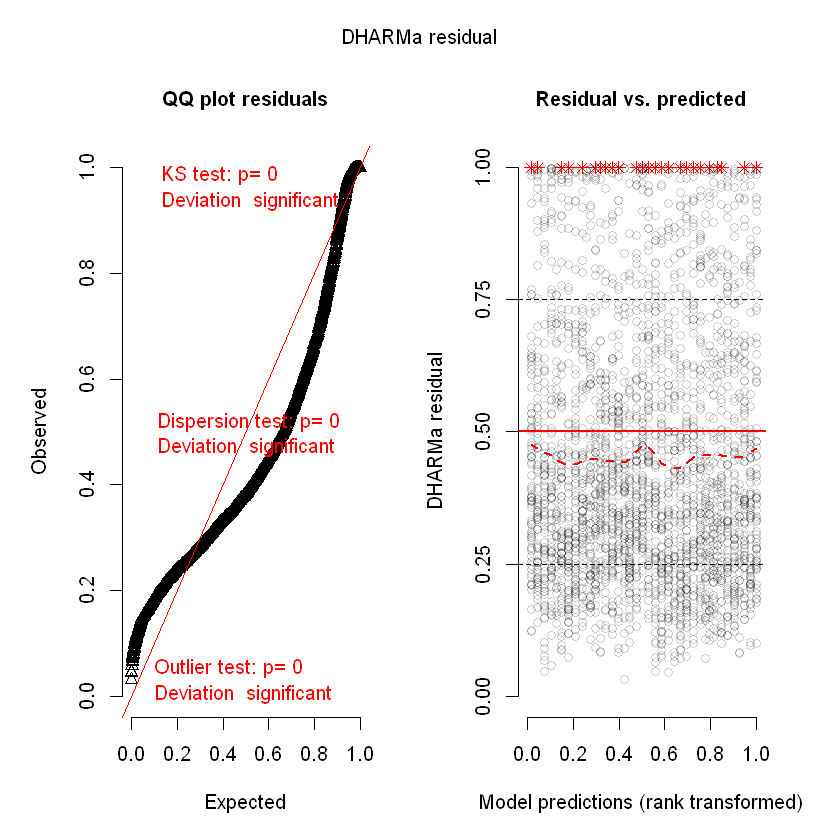


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 54, observations = 2705, p-value < 2.2e-16
alternative hypothesis: two.sided
 percent confidence interval:
 0.0001756007 0.0033271719
sample estimates:
outlier frequency (expected: 0.00148983364140481 ) 
                                        0.01996303 


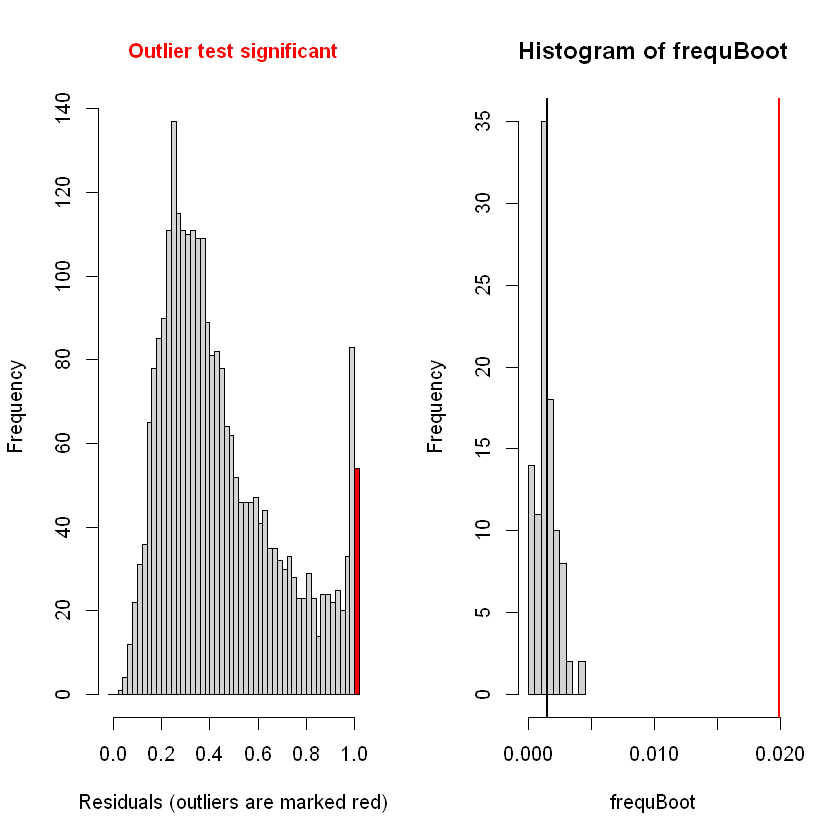

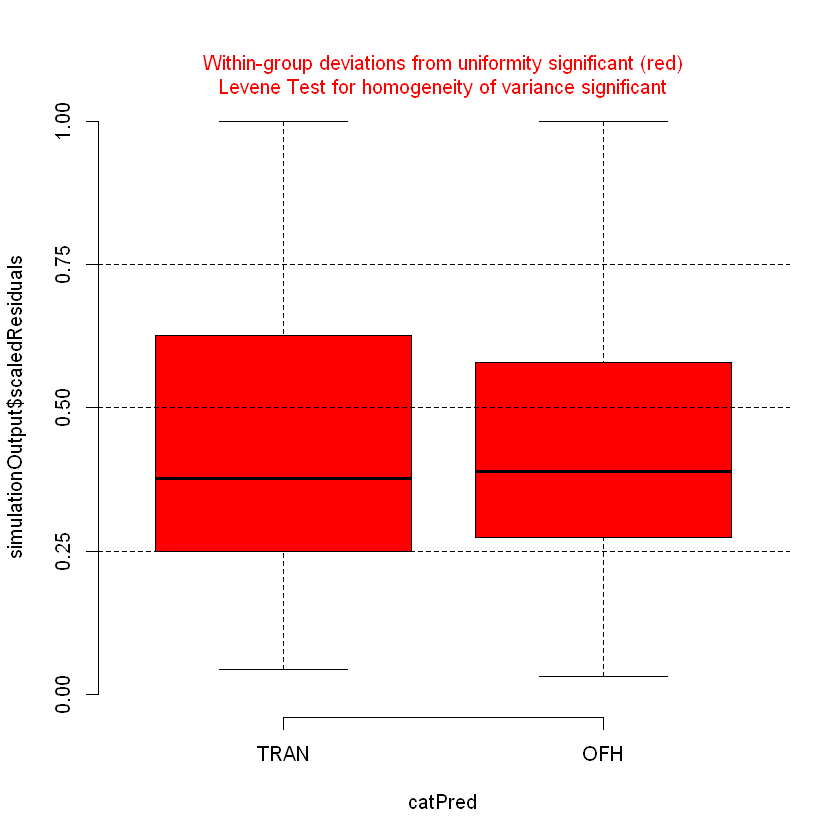


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 2.5593, p-value < 2.2e-16
alternative hypothesis: two.sided


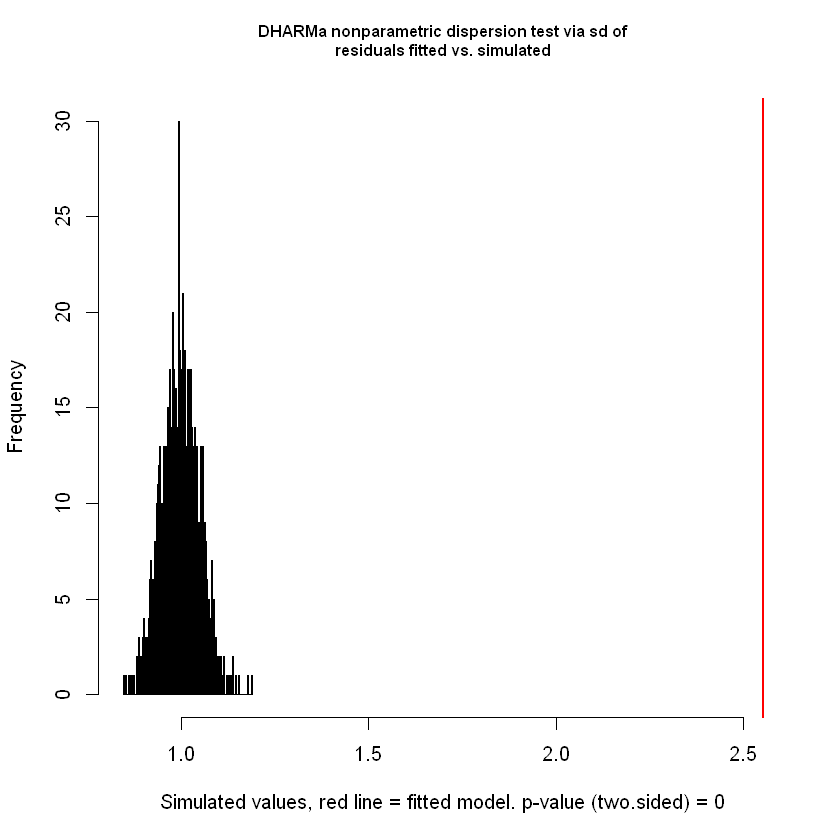


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 0, p-value < 2.2e-16
alternative hypothesis: two.sided


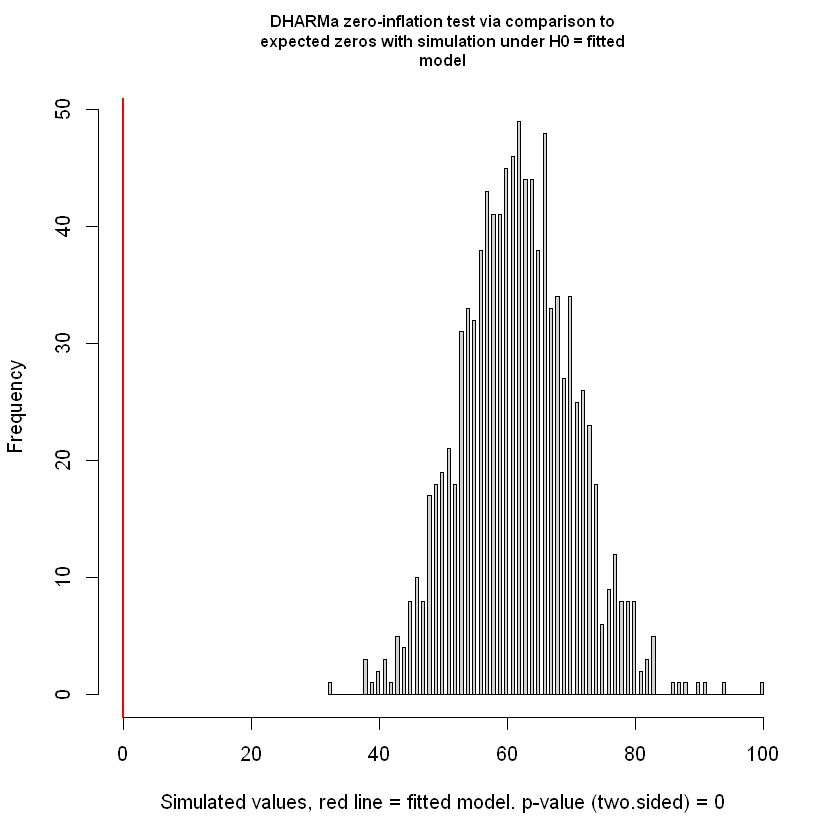

In [94]:
df$Y = df$weekly_std_time_midduratioZ4_min
hist(df$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "nbinom1", data = df)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + (1|HenID), family = "nbinom1", data = df)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)

# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(fecmodADMBf) %*%fixef(fecmodADMBf)[[1]]))#[[1]] instead of nothing for glmmadmb
# getting the observation-level variance Null model
omegaN <- summary(fecmodADMBr)$sigma #instead og fecmodADMBr$alpha in glmmadmb # overdispersion omega is alpha in
lambda <-as.numeric(exp(fixef(fecmodADMBr)[[1]] + 0.5 * (as.numeric(VarCorr(fecmodADMBr)[[1]])))) #[[1]] instead of [1] for glmmadmb
# lambda2 <- mean(df$Egg) # for lambda we use the mean of all
# observations
VarOdN <- omegaN/lambda # the delta method
VarOlN <-log(1 + omegaN/lambda) # log-normal approximation
VarOtN <-trigamma(lambda/omegaN) # trigamma function
# comparing the three
c(VarOdN = VarOdN, VarOlN = VarOlN, VarOlN = VarOtN)

# Full model
omegaF <- summary(fecmodADMBf)$sigma # overdispersion omega is alpha in glmmadmb instead of fecmodADMBf$alpha  for glmmadmb
VarOdF <- omegaF/lambda# the delta method
VarOlF <-log(1 + omegaF/lambda)# log-normal approximation
VarOtF <-trigamma(lambda/omegaF)# trigamma function# comparing the three
c(VarOdF = VarOdF, VarOlF = VarOlF, VarOlF = VarOtF)

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])))/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)

# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(fecmodADMBr)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBr)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(fecmodADMBf)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

### weekly_avertical_travel_distance

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: nbinom1  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 21994.3  22012.0 -10994.2  21988.3     2702 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.1901   0.436   
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom1 family (): 1.64 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.02907    0.03172     127   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: nbinom1  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 21957.0  21992.5 -10972.5  21945.0     2699 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.1895   0.4354  
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom1 family (): 1.59 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.05853    0.04456   91.08  < 2e-16 ***
TreatmentOFH                  -0.06231    0.06330   -0.98 0.324869    
scale(weekly_avg_temperature) -0.05719    0.01099   -5.20 1.96e-07 ***
scale(WOA)                     0.03675    0.01099    3.34 0.000829 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

VarOdN     VarOlN     VarOlN 
0.02647994 0.02613542 0.02683363

VarOdF     VarOlF     VarOlF 
0.02569393 0.02536939 0.02602684

R2glmmM     R2glmmC   ICCrawPop   ICCadjPop 
0.007794612 0.880205473 0.876324977 0.879264385

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
DHARMa:testOutliers with type = binomial may have inflated Type 

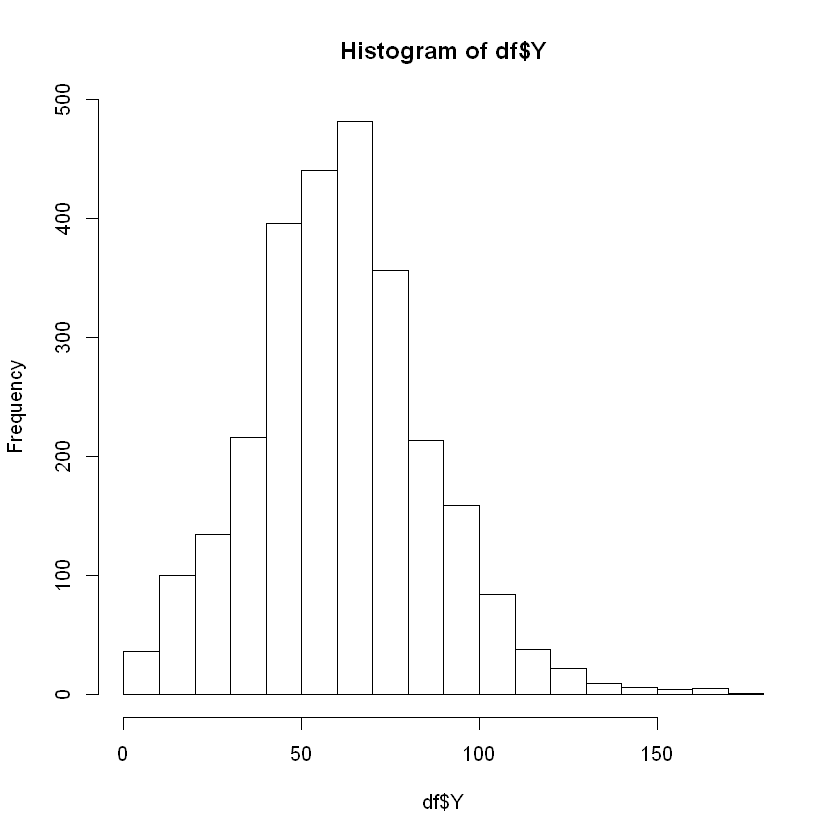

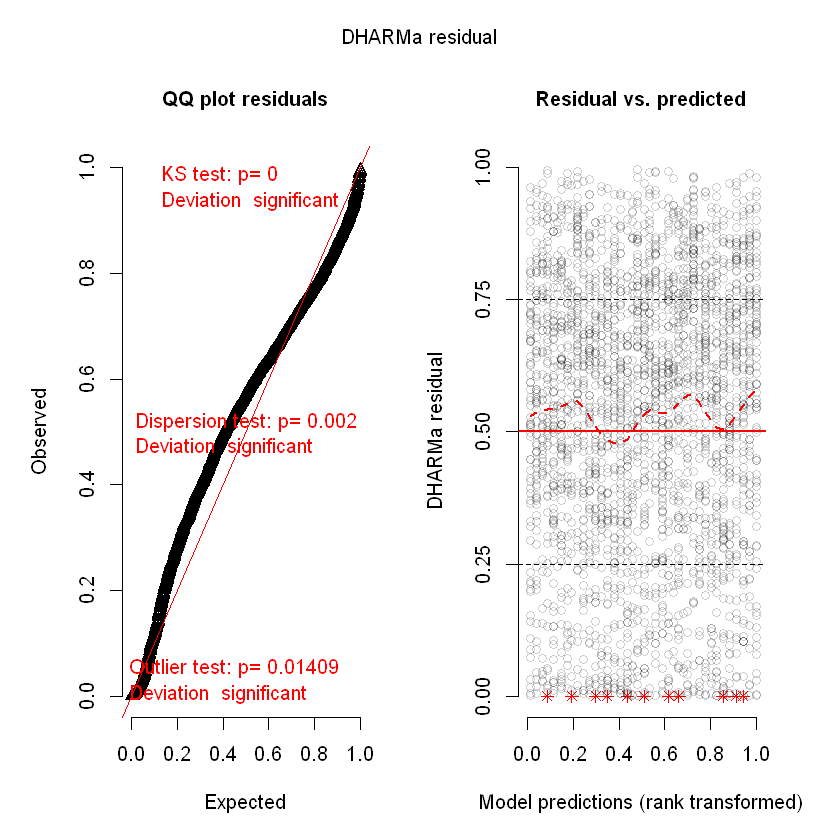


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 12, observations = 2705, p-value = 0.38
alternative hypothesis: two.sided
 percent confidence interval:
 0.0005452865 0.0083456562
sample estimates:
outlier frequency (expected: 0.00264325323475046 ) 
                                       0.004436229 


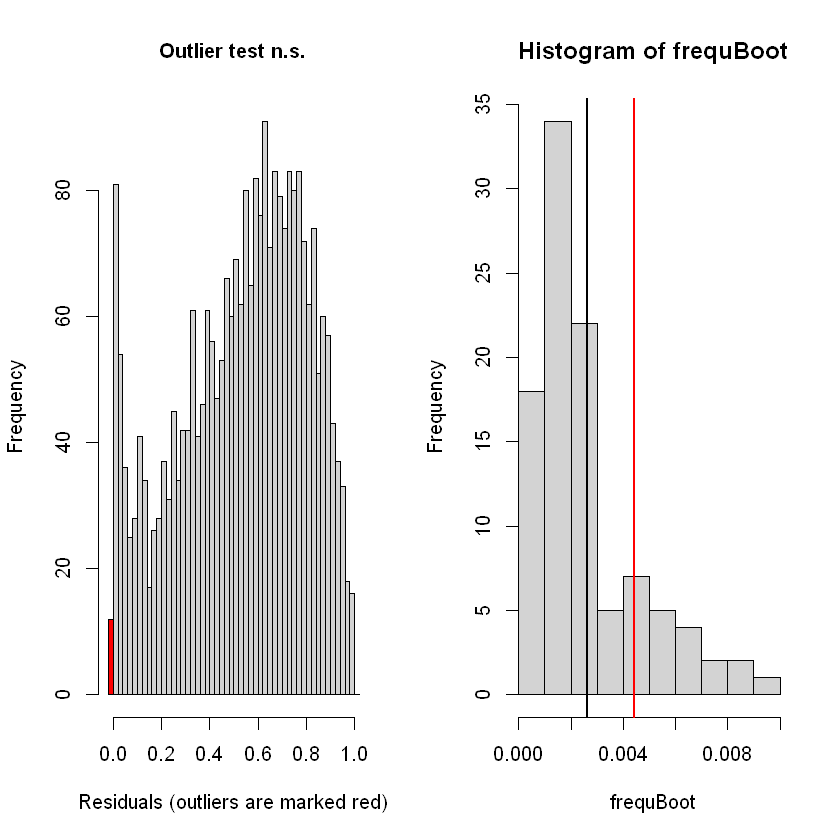


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.64304, p-value = 0.002
alternative hypothesis: two.sided


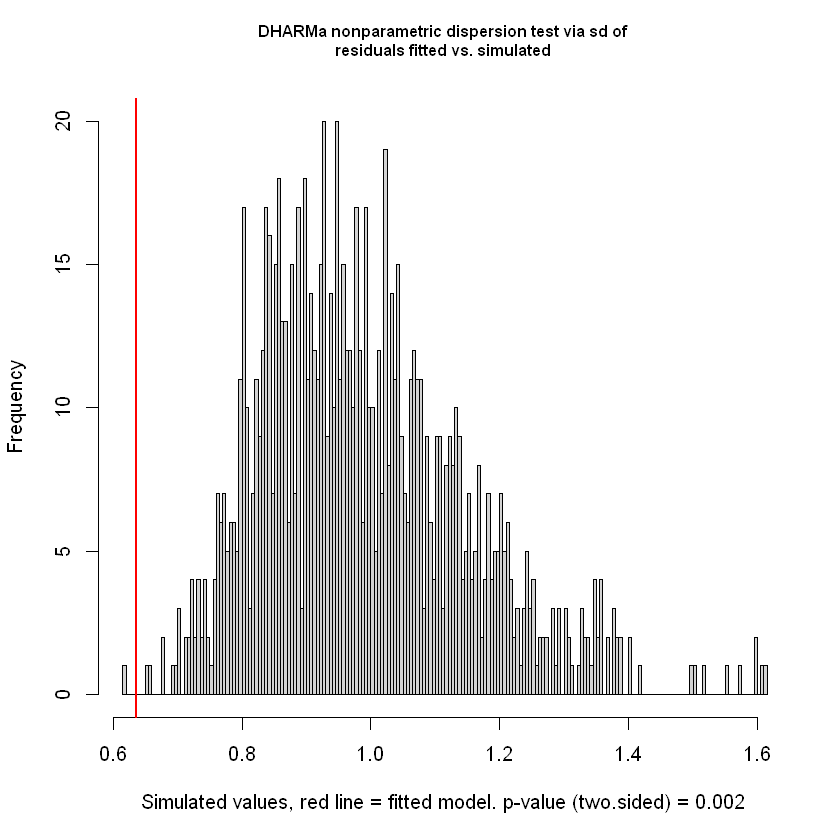


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 0, p-value = 1
alternative hypothesis: two.sided


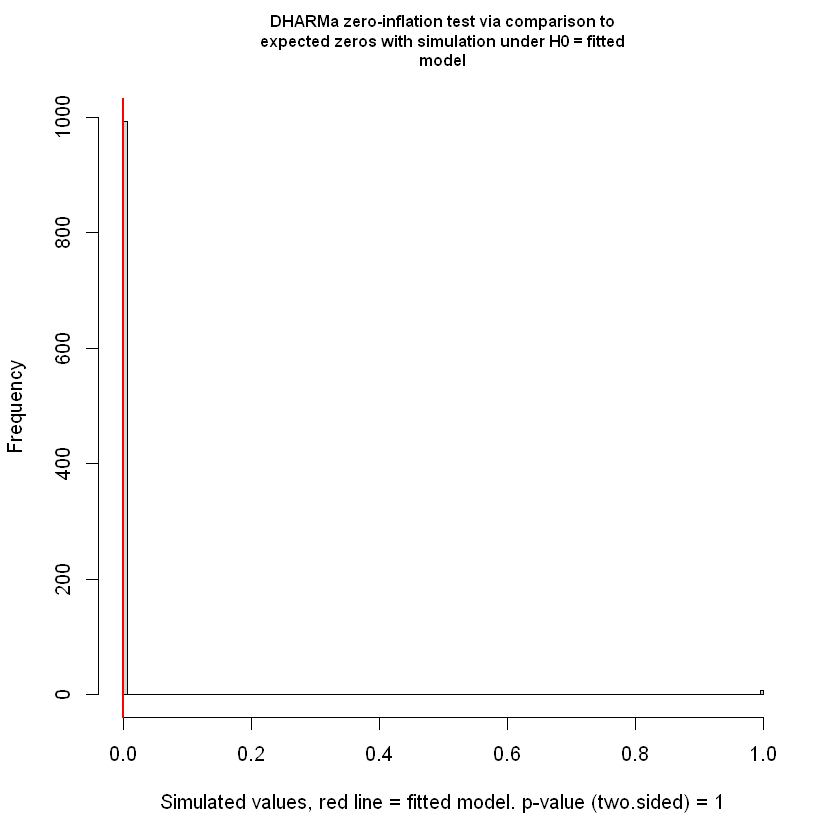

In [21]:
df$Y = df$weekly_avertical_travel_distance
hist(df$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "nbinom1", data = df)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA)+ (1|HenID), family = "nbinom1", data = df)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)

# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(fecmodADMBf) %*%fixef(fecmodADMBf)[[1]]))#[[1]] instead of nothing for glmmadmb
# getting the observation-level variance Null model
omegaN <- sigma(fecmodADMBr) #instead of fecmodADMBr$alpha in glmmadmb # overdispersion omega is alpha in
lambda <-as.numeric(exp(fixef(fecmodADMBr)[[1]] + 0.5 * (as.numeric(VarCorr(fecmodADMBr)[[1]])))) #[[1]] instead of [1] for glmmadmb
# lambda2 <- mean(df$Egg) # for lambda we use the mean of all
# observations
VarOdN <- omegaN/lambda # the delta method
VarOlN <-log(1 + omegaN/lambda) # log-normal approximation
VarOtN <-trigamma(lambda/omegaN) # trigamma function
# comparing the three
c(VarOdN = VarOdN, VarOlN = VarOlN, VarOlN = VarOtN)

# Full model
omegaF <- sigma(fecmodADMBf) # overdispersion omega is alpha in glmmadmb instead of fecmodADMBf$alpha  for glmmadmb
VarOdF <- omegaF/lambda# the delta method
VarOlF <-log(1 + omegaF/lambda)# log-normal approximation
VarOtF <-trigamma(lambda/omegaF)# trigamma function# comparing the three
c(VarOdF = VarOdF, VarOlF = VarOlF, VarOlF = VarOtF)

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])))/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)

# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(fecmodADMBr)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBr)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(fecmodADMBf)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

sim_res = simulateResiduals(fecmodADMBf, n=1000, refit=T)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

In [37]:
#returns an overdispersion parameter (usually denoted α as in Hardin and Hilbe (2007)): such that the variance equals µ(1 + α).
#p.19 on http://cran.nexr.com/web/packages/glmmTMB/glmmTMB.pdf
sigma(fecmodADMBf)

[1] 1.588261

In [35]:
summary(fecmodADMBf)$sigma

[1] 1.588261

In [28]:
fecmodADMBf

Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    (1 | HenID)
Data: df
      AIC       BIC    logLik  df.resid 
 21957.05  21992.47 -10972.52      2699 
Random-effects (co)variances:

Conditional model:
 Groups Name        Std.Dev.
 HenID  (Intercept) 0.4354  

Number of obs: 2705 / Conditional model: HenID, 194

Overdispersion parameter for nbinom1 family (): 1.59 

Fixed Effects:

Conditional model:
                  (Intercept)                   TreatmentOFH  
                      4.05853                       -0.06231  
scale(weekly_avg_temperature)                     scale(WOA)  
                     -0.05719                        0.03675  

In [ ]:
difference arise from the dispersion parameters of fixed efect model (omegaF) 1.59 vs 2.5883

In [25]:
1.59^2

[1] 2.5281

### weekly_nbr_uncommon_behavior

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: nbinom1  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
  7193.1   7210.8  -3593.5   7187.1     2702 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 1.443    1.201   
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom1 family (): 0.611 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.33729    0.09517  -3.544 0.000394 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: nbinom1  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
  7186.4   7221.8  -3587.2   7174.4     2699 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 1.436    1.198   
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom1 family (): 0.599 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)   
(Intercept)                   -0.21655    0.13114  -1.651  0.09868 . 
TreatmentOFH                  -0.24877    0.18558  -1.341  0.18008   
scale(weekly_avg_temperature)  0.18126    0.05617   3.227  0.00125 **
scale(WOA)                    -0.15157    0.05682  -2.668  0.00763 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

VarF     omegaN     VarOdN     VarOlN     VarOlN 
0.02001103 0.61130341 0.41627159 0.34802778 0.51456034

omegaF    VarOdF    VarOlF    VarOtF 
0.5992127 0.4080383 0.3421975 0.5022687

R2glmmM    R2glmmC  ICCrawPop  ICCadjPop 
0.01022112 0.74345397 0.73715291 0.74080470

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


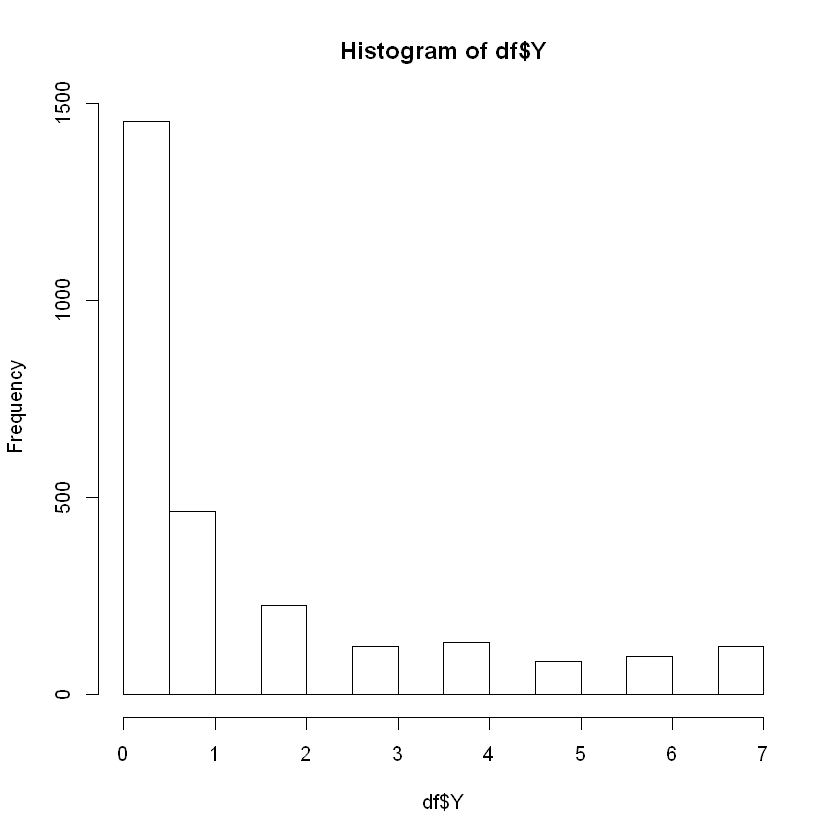

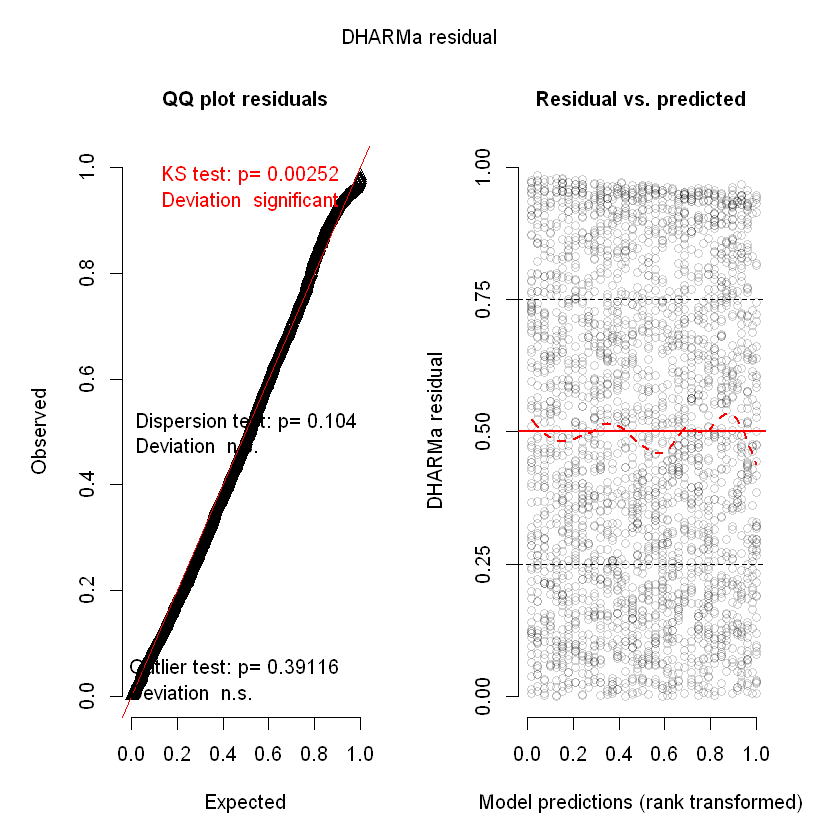


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 0, observations = 2705, p-value = 0.94
alternative hypothesis: two.sided
 percent confidence interval:
 0.000000000 0.006303142
sample estimates:
outlier frequency (expected: 0.00102033271719039 ) 
                                                 0 


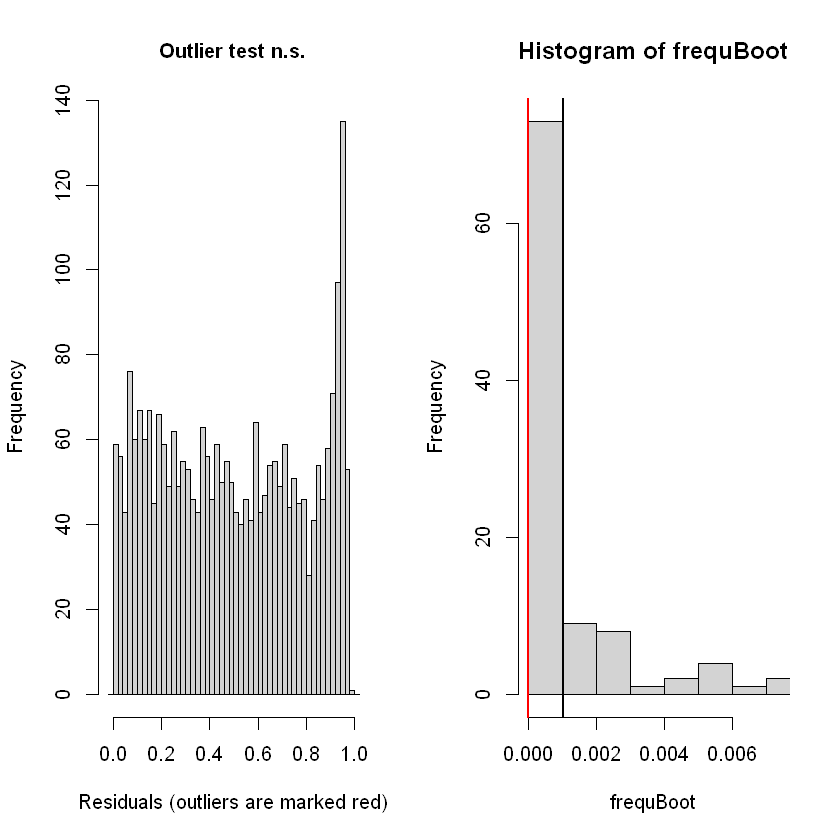


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.42027, p-value = 0.104
alternative hypothesis: two.sided


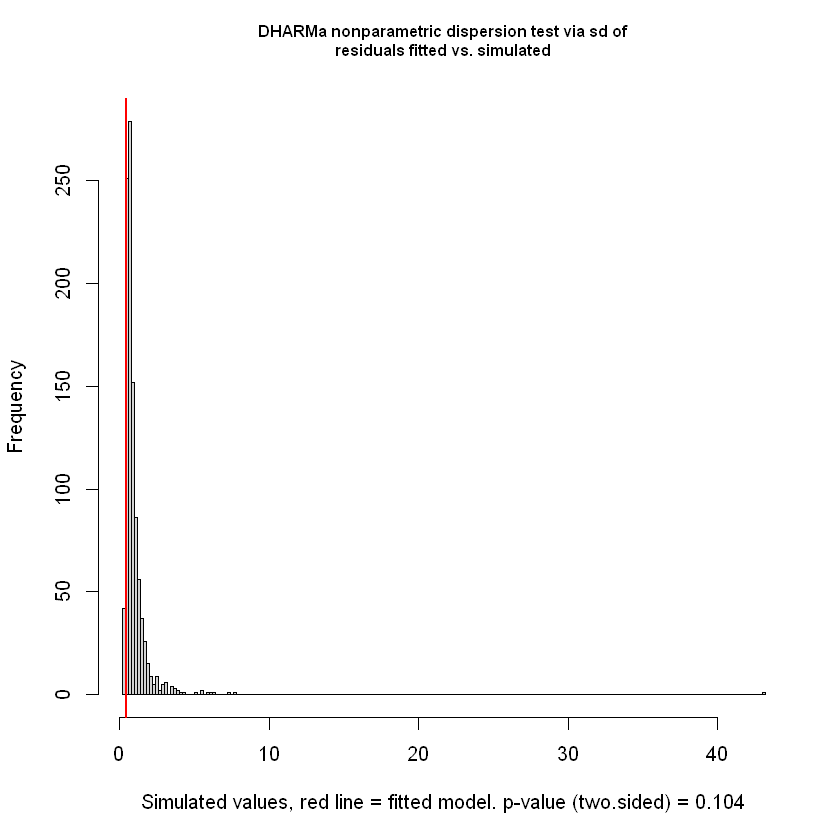


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 1.0196, p-value = 0.656
alternative hypothesis: two.sided


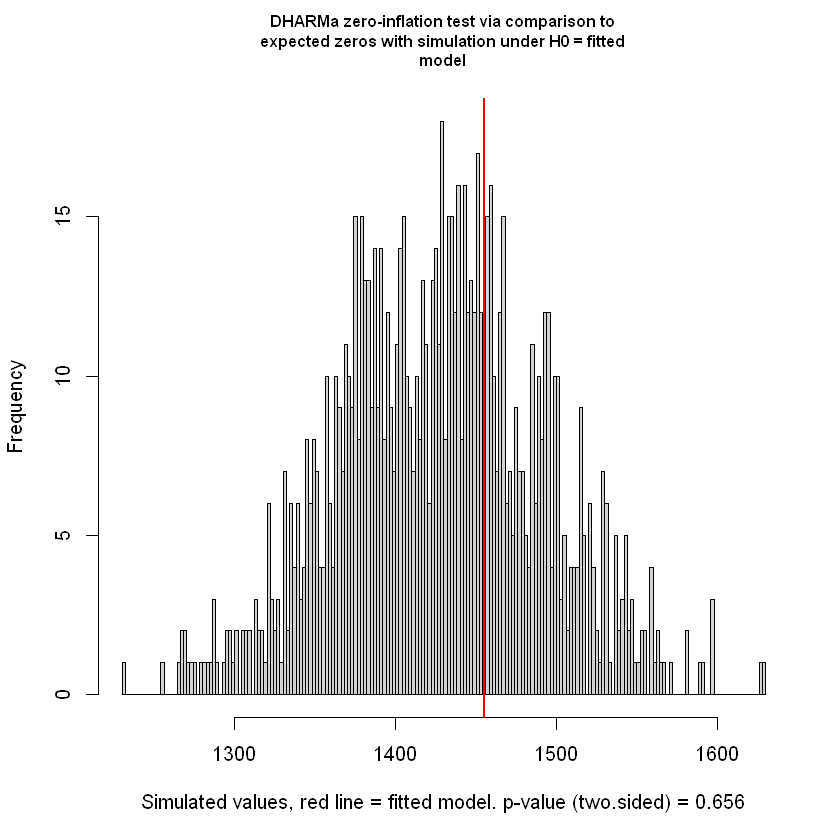

In [110]:
df$Y = df$weekly_nbr_uncommon_behavior
hist(df$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "nbinom1", data = df)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA)+ (1|HenID), family = "nbinom1", data = df)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)

# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(fecmodADMBf) %*%fixef(fecmodADMBf)[[1]]))#[[1]] instead of nothing for glmmadmb
# getting the observation-level variance Null model
omegaN <- summary(fecmodADMBr)$sigma #instead of fecmodADMBr$alpha in glmmadmb # overdispersion omega is alpha in
lambda <-as.numeric(exp(fixef(fecmodADMBr)[[1]] + 0.5 * (as.numeric(VarCorr(fecmodADMBr)[[1]])))) #[[1]] instead of [1] for glmmadmb
# lambda2 <- mean(df$Egg) # for lambda we use the mean of all
# observations
VarOdN <- omegaN/lambda # the delta method
VarOlN <-log(1 + omegaN/lambda) # log-normal approximation
VarOtN <-trigamma(lambda/omegaN) # trigamma function
# comparing the three
c(VarF=VarF, omegaN=omegaN, VarOdN = VarOdN, VarOlN = VarOlN, VarOlN = VarOtN)

# Full model
omegaF <- summary(fecmodADMBf)$sigma # overdispersion omega is alpha in glmmadmb instead of fecmodADMBf$alpha  for glmmadmb
VarOdF <- omegaF/lambda# the delta method
VarOlF <-log(1 + omegaF/lambda)# log-normal approximation
VarOtF <-trigamma(lambda/omegaF)# trigamma function# comparing the three
c(omegaF=omegaF, VarOdF = VarOdF, VarOlF = VarOlF, VarOtF = VarOtF)

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])))/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)

# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(fecmodADMBr)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBr)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(fecmodADMBf)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

In [ ]:
Quasi-Poisson GLMMs with log link with glmmtmb: 0.74 and 0.43 with glmmadmb

In [104]:
summary(fecmodADMBf)$sigma

[1] 0.5992127

#  Negative binomial GLMMs with log link

### weekly_nbr_uncommon_behavior

In [85]:
sum(df$weekly_nbr_uncommon_behavior==0)
sum(df$weekly_nbr_uncommon_behavior!=0)

[1] 1455

[1] 1250

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: nbinom2  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
  7303.7   7321.4  -3648.8   7297.7     2702 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 1.597    1.264   
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom2 family ():  3.7 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.37989    0.09821  -3.868  0.00011 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: nbinom2  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
  7291.5   7326.9  -3639.7   7279.5     2699 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 1.583    1.258   
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for nbinom2 family (): 3.79 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -0.23936    0.13577  -1.763  0.07791 .  
TreatmentOFH                  -0.29058    0.19313  -1.505  0.13244    
scale(weekly_avg_temperature)  0.23801    0.06003   3.965 7.35e-05 ***
scale(WOA)                    -0.21242    0.06054  -3.509  0.00045 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] 47.25746
[1] 1.519796


VarOdN    VarOlN    VarOtN 
0.9284227 0.6567024 1.4771505

numeric(0)

ICCrawPop 
0.5194812

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


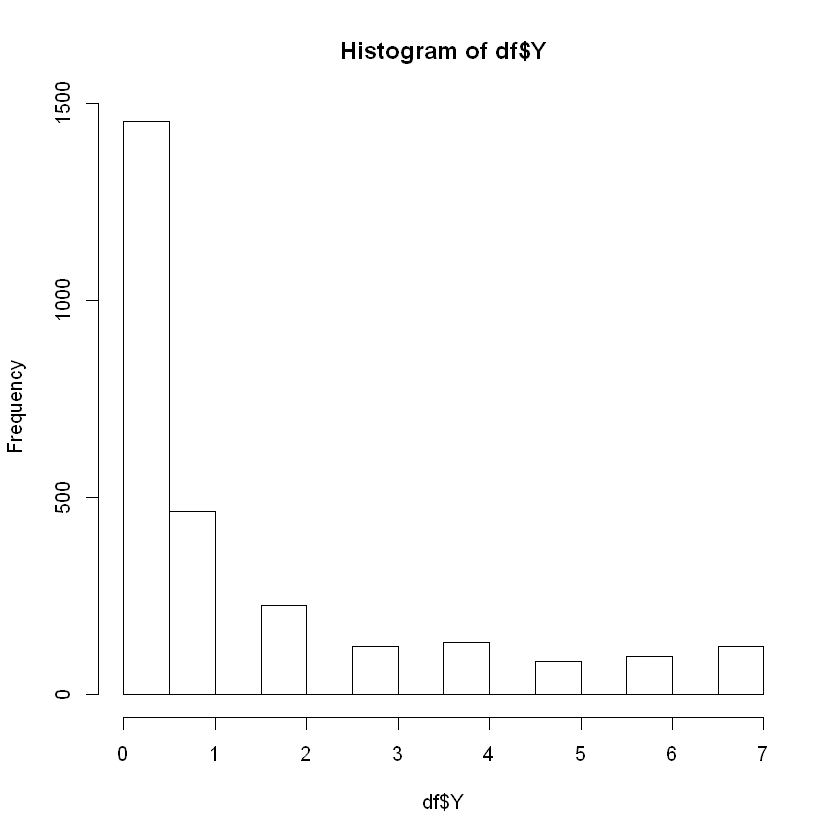

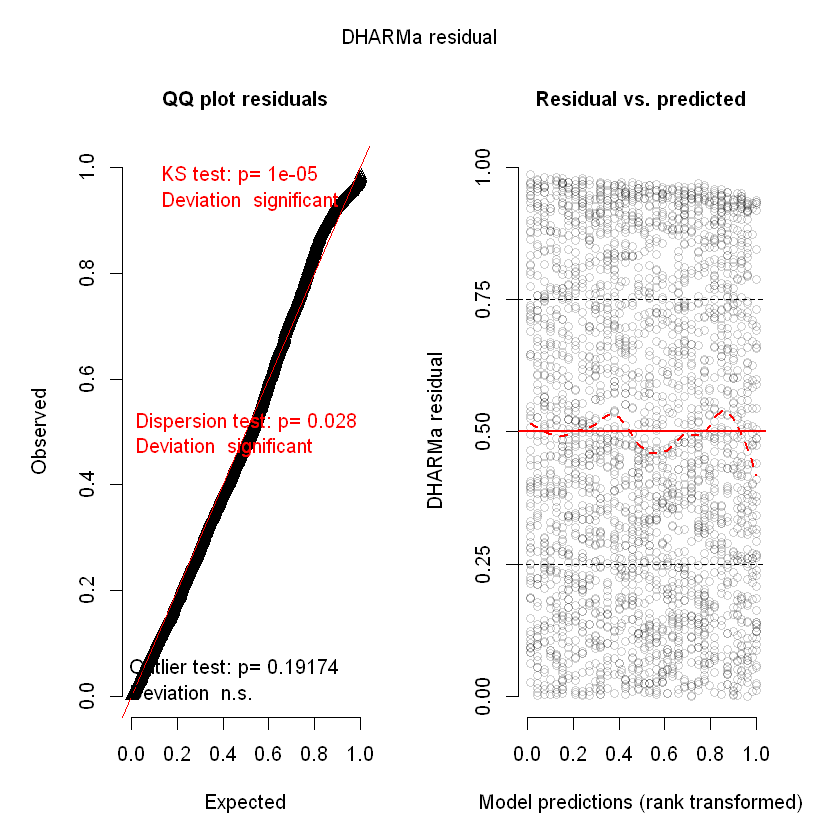


	DHARMa bootstrapped outlier test

data:  sim_res
outliers at both margin(s) = 0, observations = 2705, p-value = 0.38
alternative hypothesis: two.sided
 percent confidence interval:
 0.000000000 0.006654344
sample estimates:
outlier frequency (expected: 0.00162661737523105 ) 
                                                 0 


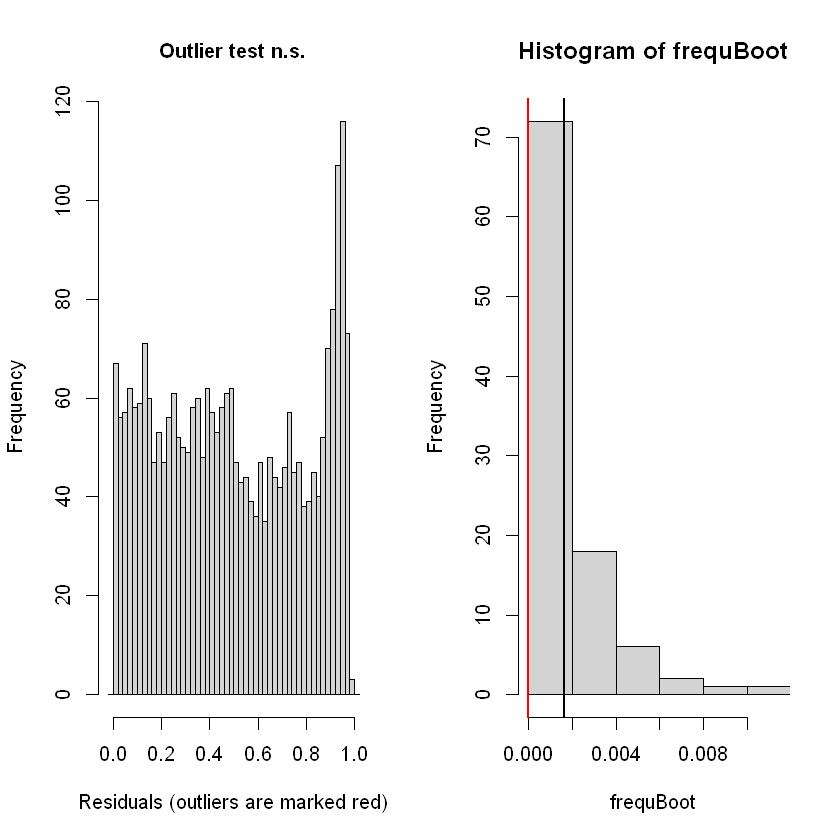


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.28765, p-value = 0.028
alternative hypothesis: two.sided


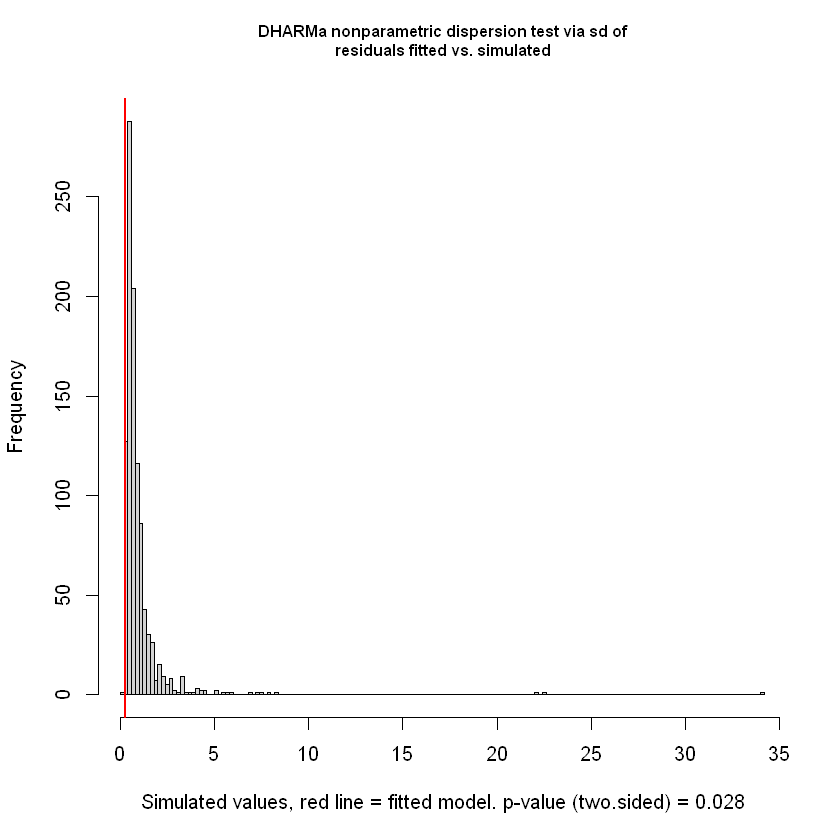


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 1.0596, p-value = 0.166
alternative hypothesis: two.sided


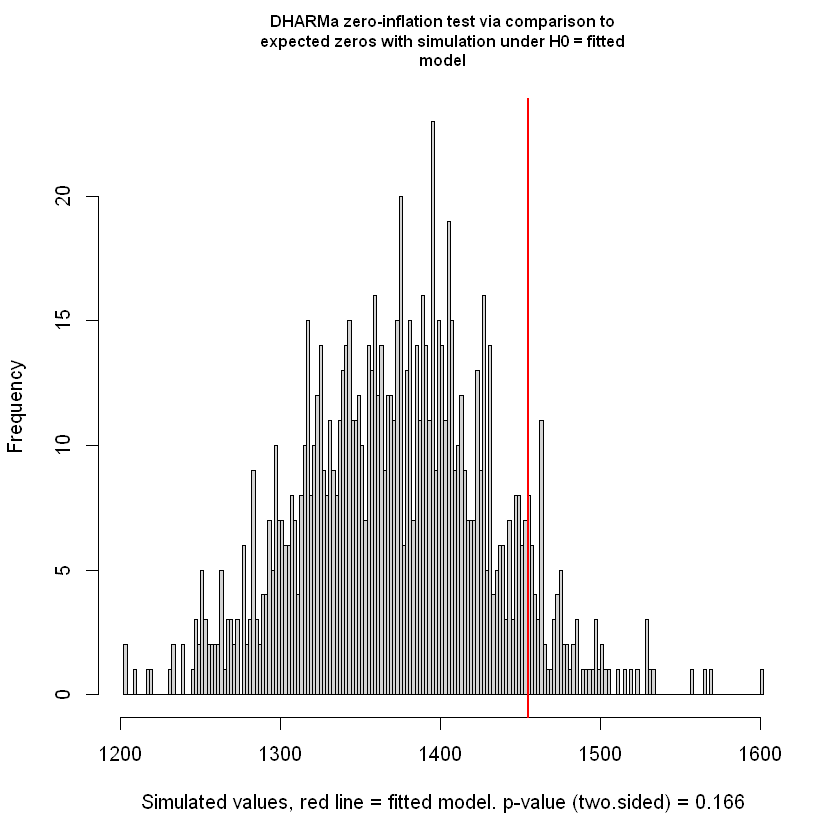

In [98]:
df$Y = df$weekly_nbr_uncommon_behavior
hist(df$Y)
# Fit null model without fixed effects (but including all random effects)
fecmodADMBr <-glmmTMB(Y ~ 1 + (1 | HenID), family = "nbinom2", data = df)
# Fit alternative model including fixed and all random effects
fecmodADMBf <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) + (1|HenID), family = "nbinom2", data = df)
# View model fits for both models
summary(fecmodADMBr)
summary(fecmodADMBf)

# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(fecmodADMBf) %*%fixef(fecmodADMBf)[[1]]))#[[1]] instead of nothing for glmmadmb
# getting the observation-level variance Null model
thetaN <- summary(fecmodADMBr)$sigma #instead og fecmodADMBr$alpha in glmmadmb # overdispersion omega is alpha in
lambda <-as.numeric(exp(fixef(fecmodADMBr)[[1]] + 0.5 * (as.numeric(VarCorr(fecmodADMBr)[[1]])))) #[[1]] instead of [1] for glmmadmb
print(omegaN)
print(lambda)
# lambda2 <- mean(DataAll$Parasite)
VarOdN <- 1/lambda + 1/thetaN # the delta method
VarOlN <-log(1 + (1/lambda) + (1/thetaN))# log-normal approximation
VarOtN <-trigamma((1/lambda + 1/thetaN)^(-1))# trigamma function
# comparing the three
c(VarOdN = VarOdN, VarOlN = VarOlN, VarOtN = VarOtN)

# Full model
thetaF <- fecmodADMBf$alpha# note that theta is called alpha in glmmadmb
VarOdF <- 1/lambda + 1/thetaF# the delta method
VarOlF <-log(1 + (1/lambda) + (1/thetaF))# log-normal approximation
VarOtF <-trigamma((1/lambda + 1/thetaF)^(-1))# trigamma function
# comparing the three
c(VarOdF = VarOdF, VarOlF = VarOlF, VarOtF = VarOtF)

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])))/(VarF +sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)
# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(fecmodADMBr)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBr)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(fecmodADMBf)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(fecmodADMBf)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

sim_res = simulateResiduals(fecmodADMBf, n=1000)
plot(sim_res)
testOutliers(sim_res, type = 'bootstrap') 
testDispersion(sim_res)
testZeroInflation(sim_res)

# Gamma GLMMs with log link - continuous positive distribution skewed

### weekly_avertical_travel_distance

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: Gamma  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 22183.2  22200.9 -11088.6  22177.2     2702 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.2242   0.4735  
Number of obs: 2705, groups:  HenID, 194

Dispersion estimate for Gamma family (sigma^2): 0.0503 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.02200    0.03435   117.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: Gamma  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 21911.2  21952.5 -10948.6  21897.2     2698 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.2215   0.4706  
Number of obs: 2705, groups:  HenID, 194

Dispersion estimate for Gamma family (sigma^2): 0.0451 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.05715    0.04802   84.49   <2e-16 ***
TreatmentOFH                  -0.07017    0.06822   -1.03    0.304    
scale(weekly_avg_temperature)  0.01580    0.01223    1.29    0.196    
scale(WOA)                     0.57210    0.03536   16.18   <2e-16 ***
scale(I(WOA^2))               -0.60555    0.03759  -16.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


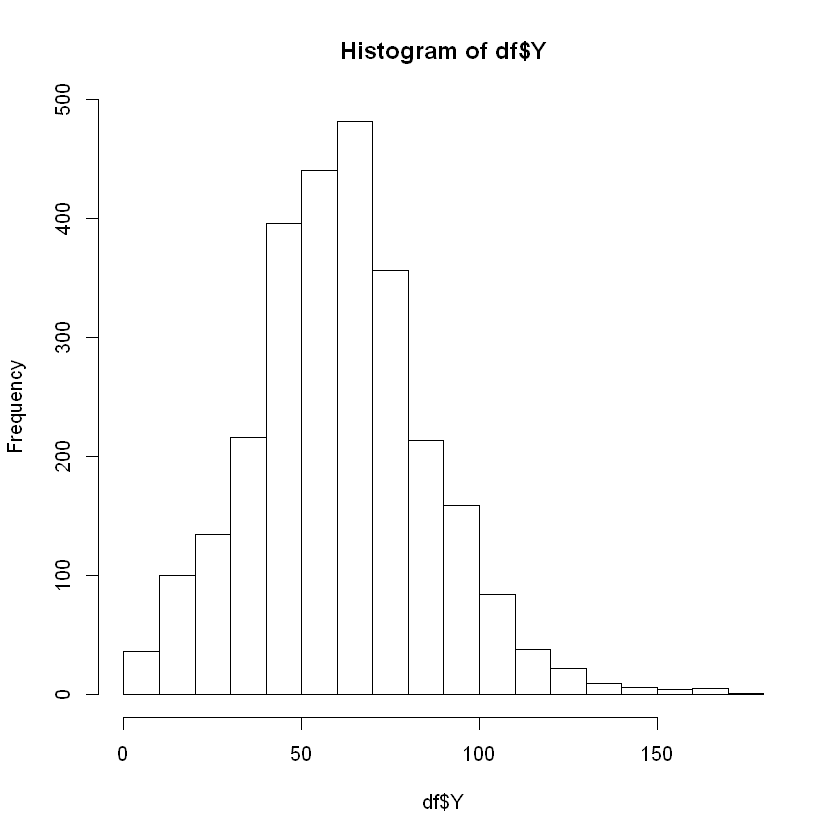

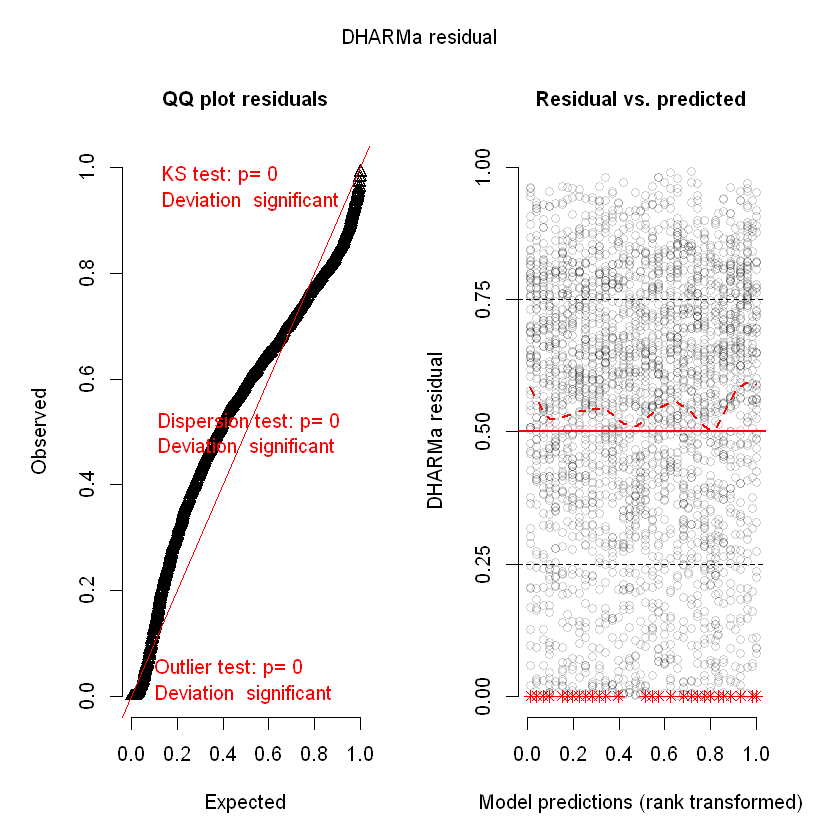


	DHARMa outlier test based on exact binomial test with approximate
	expectations

data:  sim_res
outliers at both margin(s) = 49, observations = 2705, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.003992016
95 percent confidence interval:
 0.01343057 0.02387844
sample estimates:
frequency of outliers (expected: 0.00399201596806387 ) 
                                             0.0181146 


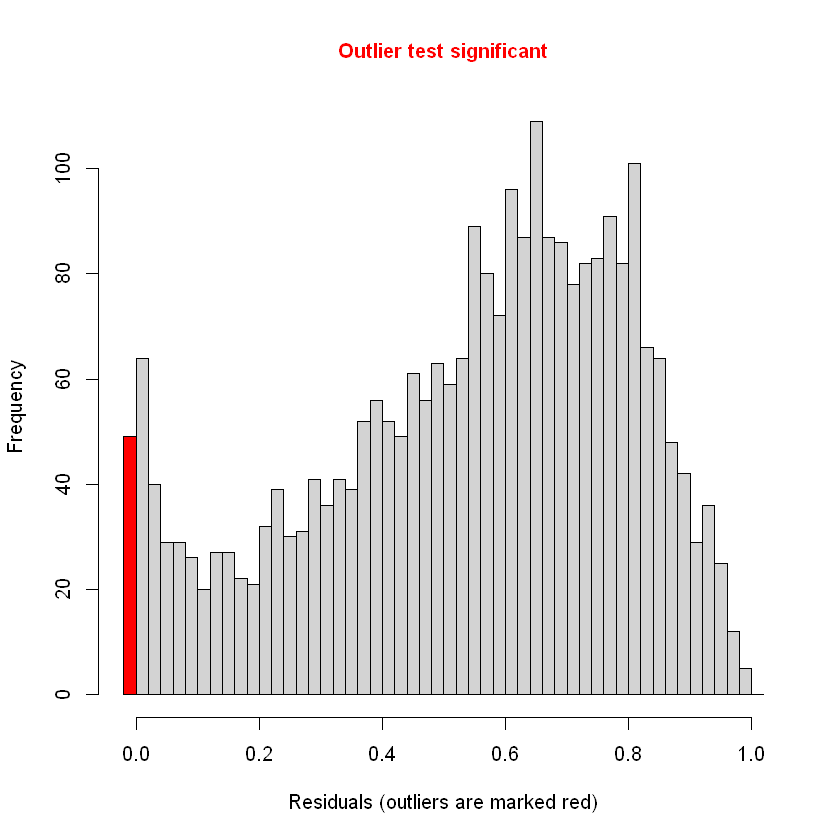

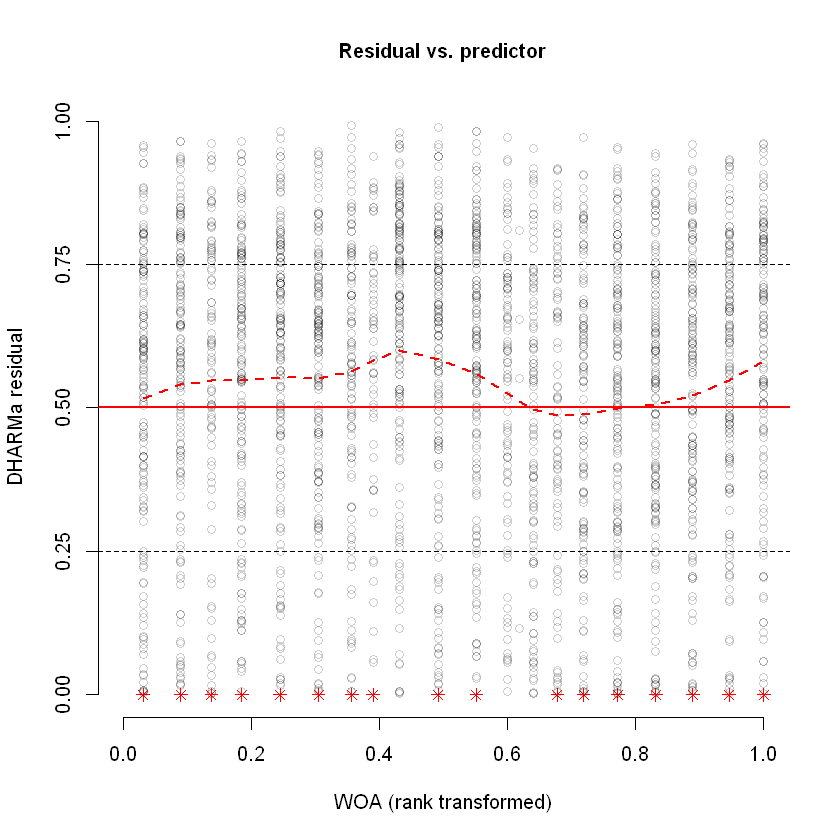

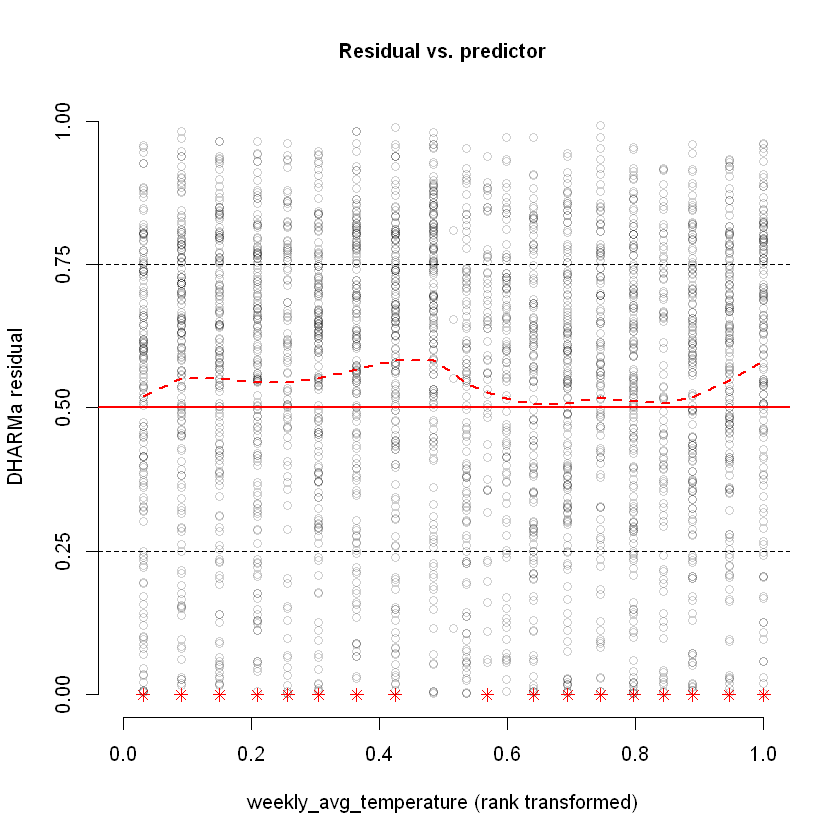

[1] 3.502128

[1] 19.87566


VarF         nuN      VarOdN      VarOlN      VarOtN 
 3.50212786 19.87566324  0.05031279  0.04908801  0.05159969

nuF      VarOdF      VarOlF      VarOtF 
22.15583314  0.04513484  0.04414591  0.04616874

R2glmmM   R2glmmC ICCrawPop ICCadjPop 
0.9289962 0.9877530 0.8129210 0.8275163

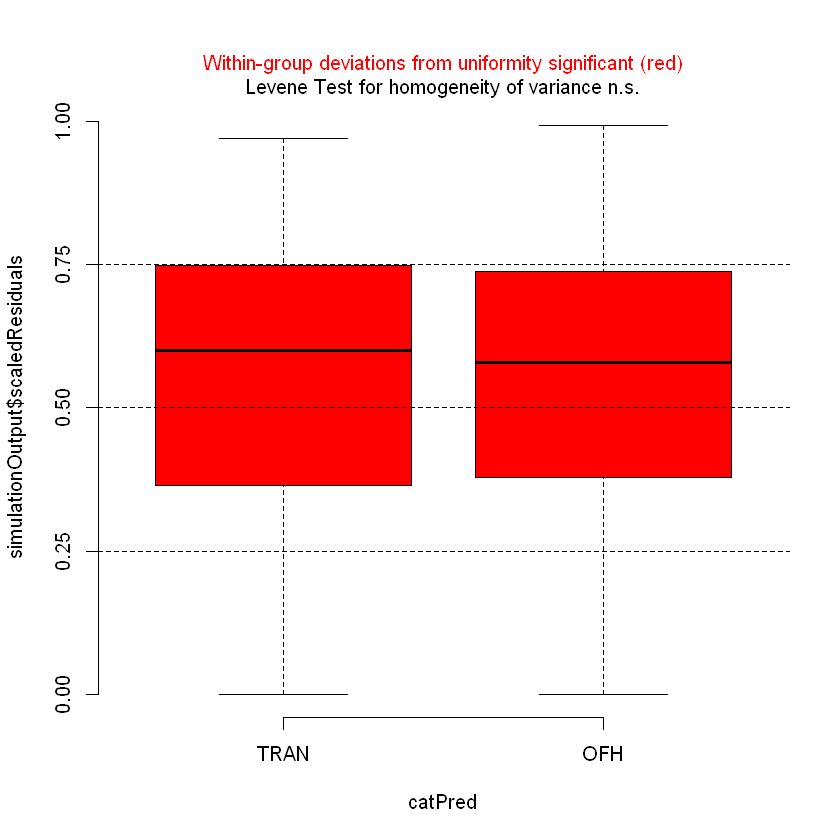

In [136]:
df$Y = df$weekly_avertical_travel_distance
hist(df$Y)
# Fit null model without fixed effects (but including all random effects)
modR <-glmmTMB(Y ~ 1 + (1|HenID), family = Gamma(link = "log"), data=df)
# Fit alternative model including fixed and all random effects
modF <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +scale(I(WOA^2)) + (1|HenID), family = Gamma(link="log"), data=df)
# View model fits for both models
summary(modR)
summary(modF)
sim_res = simulateResiduals(modF, n=500)
plot(sim_res)
testOutliers(sim_res)
#plot residual against predictors
plotResiduals(sim_res, form = df$WOA)
plotResiduals(sim_res, form = df$weekly_avg_temperature)
plotResiduals(sim_res, form = df$Treatment)

# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(modF)[[1]] %*%fixef(modF)[[1]]))
VarF

# getting the observation-level variance Null model
#https://stats.stackexchange.com/questions/247624/dispersion-parameter-for-gamma-family/247631#247631
#sigma^2 is the dispersion, and 1/dispersion is shape parameter
#https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/gamma.shape.glm.html
#nuN <- summary(modR)$sigma #instead of  modR$alpha (overdispersion omega is alpha) in glmmadmb
nuN <- 1/summary(modR)$sigma^2 #instead of  modR$alpha (overdispersion omega is alpha) in glmmadmb
print(nuN)
VarOdN <- 1/nuN# the delta method
VarOlN <-log(1 + 1/nuN)# log-normal approximation
VarOtN <-trigamma(nuN)# trigamma function
# comparing the three
c(VarF=VarF, nuN=nuN, VarOdN = VarOdN, VarOlN = VarOlN, VarOtN = VarOtN)

# Full model
#nuF <- summary(modF)$sigma #instead of  modF$alpha, in glmmadmb
nuF <- 1/summary(modF)$sigma^2 #instead of  modF$alpha, in glmmadmb
# overdispersion omega is alpha in glmmadmb
VarOdF <- 1/nuF# the delta method
VarOlF <-log(1 + 1/nuF)# log-normal approximation
VarOtF <-trigamma(nuF)# trigamma function-
# comparing the three
c(nuF=nuF, VarOdF = VarOdF, VarOlF = VarOlF, VarOtF = VarOtF)
#select highest one?? read!

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(modF)[[1]])))/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(modR)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modR)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(modF)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

### weekly_avg_time_midduratioZ4_min

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: Gamma  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 28779.6  28797.3 -14386.8  28773.6     2702 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.08419  0.2902  
Number of obs: 2705, groups:  HenID, 194

Dispersion estimate for Gamma family (sigma^2): 0.0843 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.05893    0.02174   232.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: Gamma  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 28222.0  28263.3 -14104.0  28208.0     2698 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.08576  0.2928  
Number of obs: 2705, groups:  HenID, 194

Dispersion estimate for Gamma family (sigma^2): 0.0677 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    5.07389    0.03065  165.56   <2e-16 ***
TreatmentOFH                  -0.04117    0.04351   -0.95    0.344    
scale(weekly_avg_temperature)  0.01527    0.01493    1.02    0.306    
scale(WOA)                    -0.39274    0.04325   -9.08   <2e-16 ***
scale(I(WOA^2))                0.49674    0.04627   10.74   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


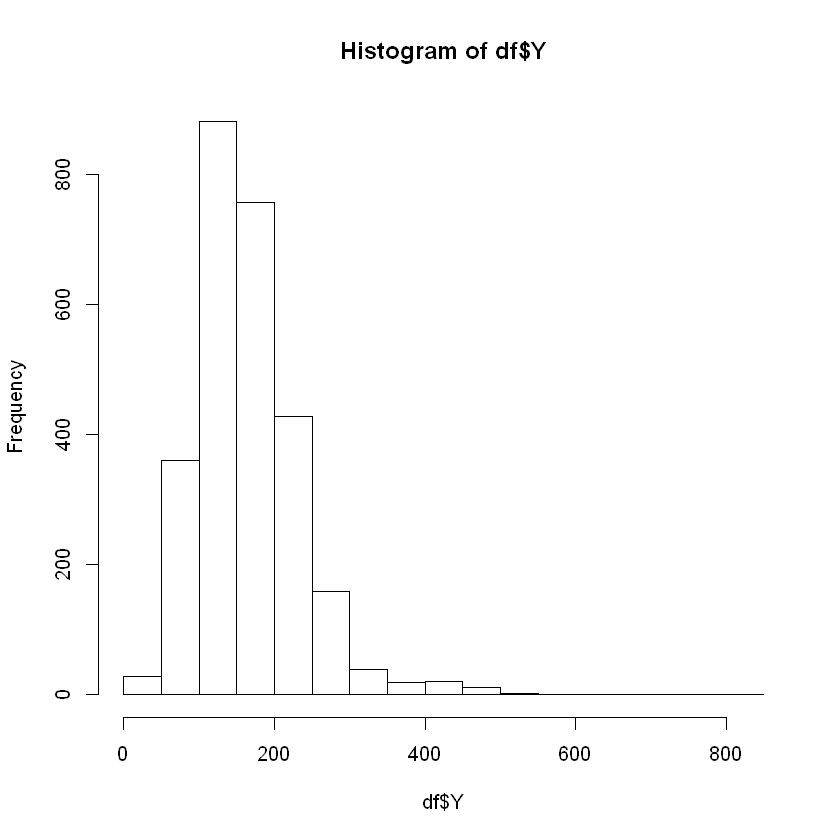

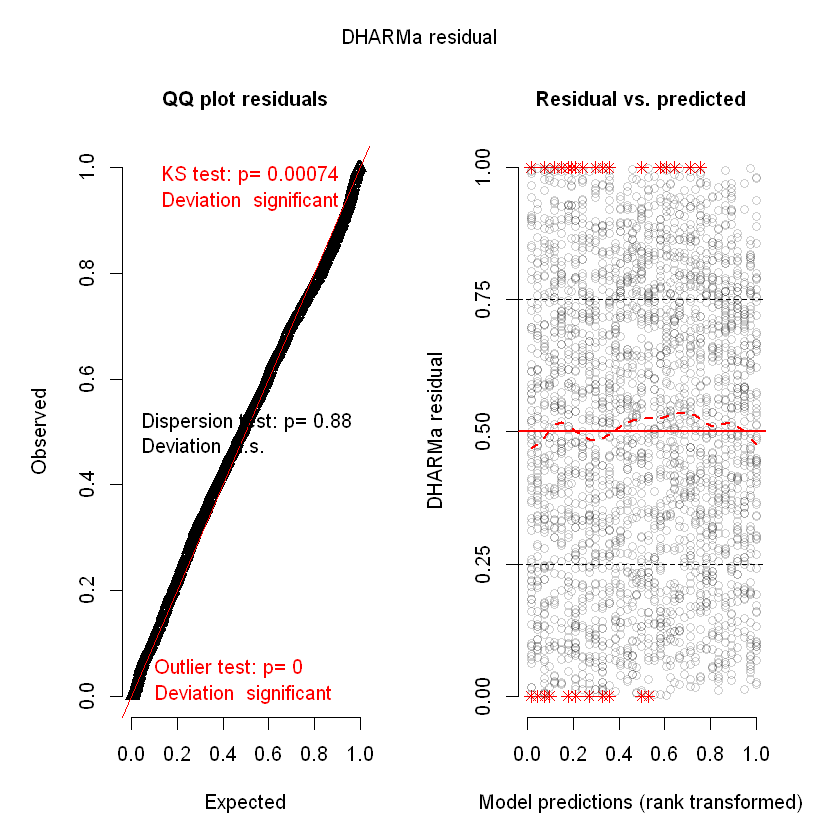


	DHARMa outlier test based on exact binomial test with approximate
	expectations

data:  sim_res
outliers at both margin(s) = 39, observations = 2705, p-value =
2.367e-11
alternative hypothesis: true probability of success is not equal to 0.003992016
95 percent confidence interval:
 0.01027198 0.01965729
sample estimates:
frequency of outliers (expected: 0.00399201596806387 ) 
                                            0.01441774 


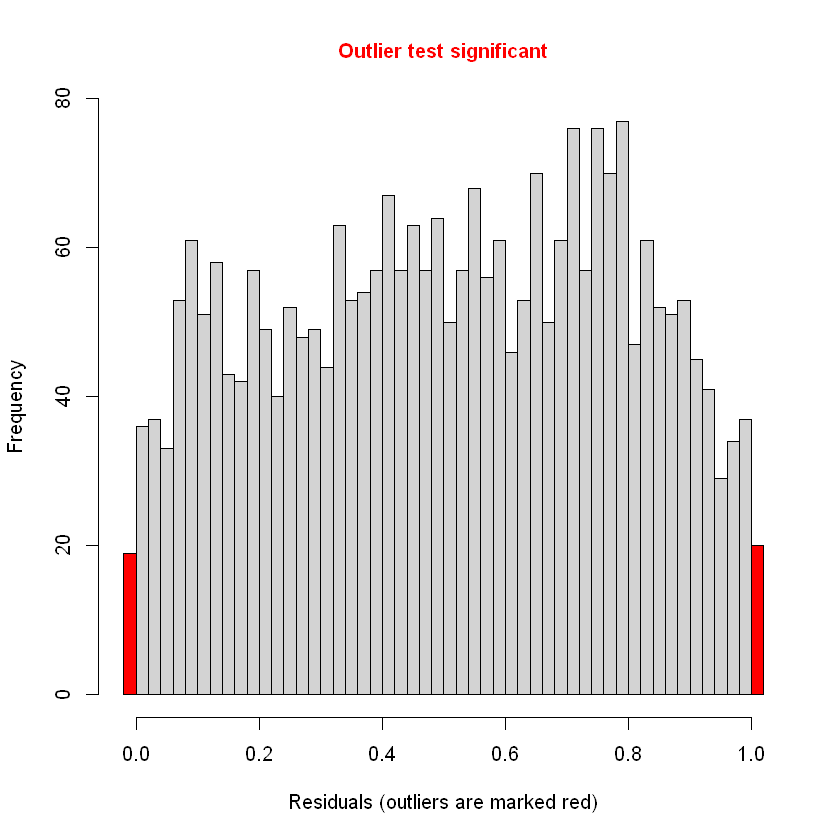

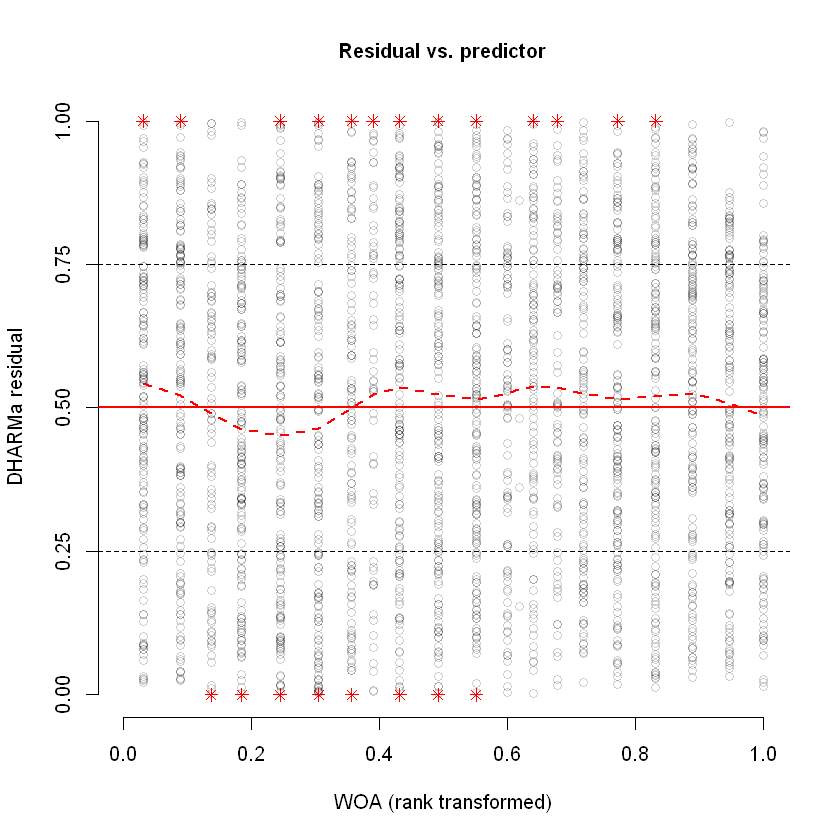

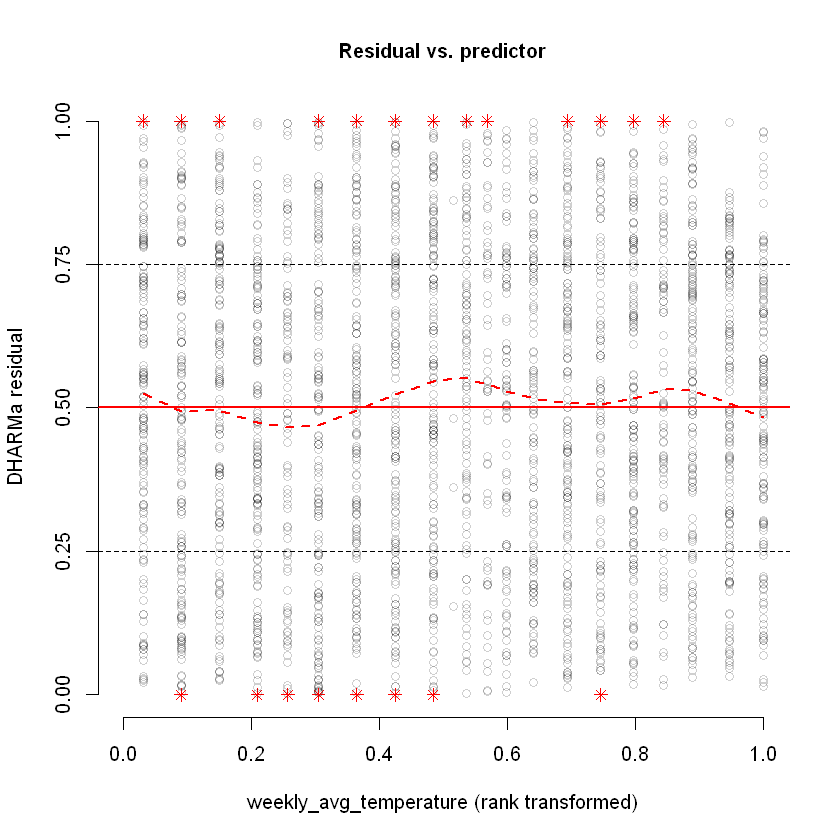

[1] 5.209673

[1] 11.85941


VarF         nuN      VarOdN      VarOlN      VarOtN 
 5.20967349 11.85940779  0.08432124  0.08095421  0.08797606

nuF      VarOdF      VarOlF      VarOtF 
14.76910722  0.06770890  0.06551514  0.07005284

R2glmmM   R2glmmC ICCrawPop ICCadjPop 
0.9709610 0.9869438 0.4890024 0.5503907

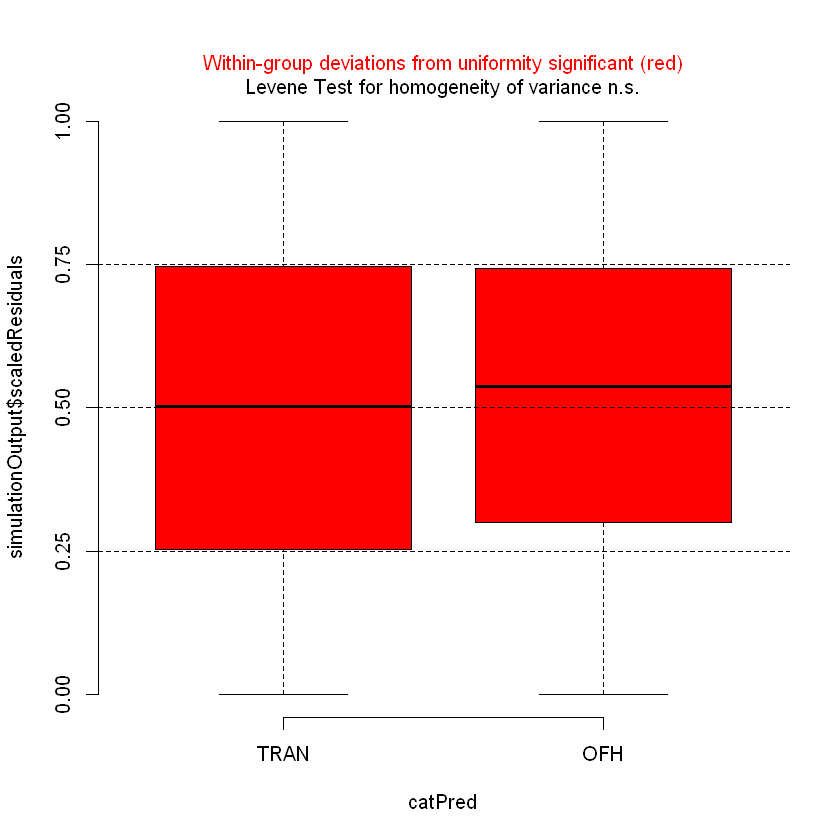

In [5]:
df$Y = df$weekly_avg_time_midduratioZ4_min
hist(df$Y)
# Fit null model without fixed effects (but including all random effects)
modR <-glmmTMB(Y ~ 1 + (1|HenID), family = Gamma(link = "log"), data=df)
# Fit alternative model including fixed and all random effects
modF <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +scale(I(WOA^2))+ (1|HenID), family = Gamma(link="log"), data=df)
# View model fits for both models
summary(modR)
summary(modF)
sim_res = simulateResiduals(modF, n=500)
plot(sim_res)
testOutliers(sim_res)
#plot residual against predictors
plotResiduals(sim_res, form = df$WOA)
plotResiduals(sim_res, form = df$weekly_avg_temperature)
plotResiduals(sim_res, form = df$Treatment)

# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(modF)[[1]] %*%fixef(modF)[[1]]))
VarF

#getting the observation-level variance Null model
#https://stats.stackexchange.com/questions/247624/dispersion-parameter-for-gamma-family/247631#247631
#sigma^2 is the dispersion, and 1/dispersion is shape parameter
#https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/gamma.shape.glm.html
#nuN <- summary(modR)$sigma #instead of  modR$alpha (overdispersion omega is alpha) in glmmadmb
nuN <- 1/summary(modR)$sigma^2 #instead of  modR$alpha (overdispersion omega is alpha) in glmmadmb
print(nuN)
VarOdN <- 1/nuN# the delta method
VarOlN <-log(1 + 1/nuN)# log-normal approximation
VarOtN <-trigamma(nuN)# trigamma function
# comparing the three
c(VarF=VarF, nuN=nuN, VarOdN = VarOdN, VarOlN = VarOlN, VarOtN = VarOtN)

# Full model
#nuF <- summary(modF)$sigma #instead of  modF$alpha, in glmmadmb
nuF <- 1/summary(modF)$sigma^2 #instead of  modF$alpha, in glmmadmb
# overdispersion omega is alpha in glmmadmb
VarOdF <- 1/nuF# the delta method
VarOlF <-log(1 + 1/nuF)# log-normal approximation
VarOtF <-trigamma(nuF)# trigamma function-
# comparing the three
c(nuF=nuF, VarOdF = VarOdF, VarOlF = VarOlF, VarOtF = VarOtF)
#select highest one?? read!

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(modF)[[1]])))/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(modR)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modR)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(modF)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

main_var = 'weekly_avg_time_midduratioZ4_min'
modR = glmmTMB(as.formula(paste(main_var, " ~ 1 + (1|HenID)")), family = Gamma(link = "log"), data=df)
modR

main_var = 'weekly_avg_time_midduratioZ4_min'
formula_str = '~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +scale(I(WOA^2))+ (1|HenID)'
modF = glmmTMB(as.formula(paste(main_var, formula_str)), family=Gamma(link="log"), data=df)
modF

In [ ]:
#Bootstrapping is any test or metric that uses random sampling with replacement (e.g. mimicking the sampling process), 
#and falls under the broader class of resampling methods. 
# Creating Function to obtain R-Squared from the data
# Performing 1500 replications with boot 
#R: nbr of bootstrap replicates.
#statistic: The function should include an indices parameter that the boot() function can use to select cases for each 
#replication
#boot( ) calls the statistic function R times. Each time, it generates a set of random indices, with replacement, from the 
#integers 1:nrow(data). These indices are used within the statistic function to select a sample. 
#we can add the parameters that has to be passed to the function that produces the statistic of interest, in this case: formula
ICC_R_squared <- function(formula_str, main_var, data, indices) {
    data_boot = data[indices,] # selecting sample with boot 
    # Fit null model without fixed effects (but including all random effects)
    modR = glmmTMB(as.formula(paste(main_var, " ~ 1 + (1|HenID)")), family = Gamma(link = "log"), data=data_boot)
    # Fit alternative model including fixed and all random effects
    modF = glmmTMB(as.formula(paste(main_var, formula_str)), family=Gamma(link="log"), data=data_boot)

    # Calculation of the variance in fitted values
    VarF <-var(as.vector(model.matrix(modF)[[1]] %*%fixef(modF)[[1]]))

    #getting the observation-level variance Null model
    #https://stats.stackexchange.com/questions/247624/dispersion-parameter-for-gamma-family/247631#247631
    #sigma^2 is the dispersion, and 1/dispersion is shape parameter
    #https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/gamma.shape.glm.html
    nuN <- 1/summary(modR)$sigma^2 #instead of  modR$alpha (overdispersion omega is alpha) in glmmadmb
    VarOdN <- 1/nuN# the delta method
    VarOlN <-log(1 + 1/nuN)# log-normal approximation
    VarOtN <-trigamma(nuN)# trigamma function

    # Full model
    nuF <- 1/summary(modF)$sigma^2 #instead of  modF$alpha, in glmmadmb
    # overdispersion omega is alpha in glmmadmb
    VarOdF <- 1/nuF# the delta method
    VarOlF <-log(1 + 1/nuF)# log-normal approximation
    VarOtF <-trigamma(nuF)# trigamma function-

    # R2[GLMM(m)] - marginal R2[GLMM]
    R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) + VarOtF)
    # R2[GLMM(c)] - conditional R2[GLMM] for full model
    R2glmmC <- (VarF +sum(as.numeric(VarCorr(modF)[[1]])))/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
    # Raw unadjusted ICC[HenID]
    ICCrawPop <-VarCorr(modR)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modR)[[1]])) +VarOtN)
    # adjusted ICC[HenID]
    ICCadjPop <-VarCorr(modF)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
    return (c(R2glmmM, R2glmmC, ICCrawPop, ICCadjPop))
} 


# Performing 1500 replications with boot 
#R: nbr of bootstrap replicates.
#statistic: The function should include an indices parameter that the boot() function can use to select cases for each 
#replication
#we can add the parameters that has to be passed to the function that produces the statistic of interest
#we use the default:  non-parametric simulation types are the ordinary bootstrap
set.seed(123)
output <- boot(data=df, statistic=ICC_R_squared, sim='ordinary', R=2500, main_var = 'weekly_avg_time_midduratioZ4_min',
               formula_str = '~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +scale(I(WOA^2))+ (1|HenID)')
output
# Plotting the output 
# Plotting the output 
plot(output_, index=1)
plot(output_, index=2)
plot(output_, index=3)
plot(output_, index=4)

# Obtaining a confidence interval of 95%
#if to few replicates then you will have an error as boot.ci calls bca.ci which tries to calculate them using the empinf 
#function, and then it uses them to calculate the acceleration constant (a). empinf will fails and returns a vector of NA values
#if not enough samples, so with no values for L, a can't be calculated, and you get your error
boot.ci(output_, type="bca", index=1) #perc
boot.ci(output_, type="bca", index=2)
boot.ci(output_, type="bca", index=3)
boot.ci(output_, type="bca", index=4)
# Obtaining a confidence interval of 95%
#if to few replicates then you will have an error as boot.ci calls bca.ci which tries to calculate them using the empinf 
#function, and then it uses them to calculate the acceleration constant (a). empinf will fails and returns a vector of NA values
#if not enough samples, so with no values for L, a can't be calculated, and you get your error

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = inte

In [60]:
citation('boot')


To cite the 'boot' package in publications use:

  Angelo Canty and Brian Ripley (2021). boot: Bootstrap R (S-Plus)
  Functions. R package version 1.3-28.

  Davison, A. C. & Hinkley, D. V. (1997) Bootstrap Methods and Their
  Applications. Cambridge University Press, Cambridge. ISBN
  0-521-57391-2

To see these entries in BibTeX format, use 'print(<citation>,
bibtex=TRUE)', 'toBibtex(.)', or set
'options(citation.bibtex.max=999)'.


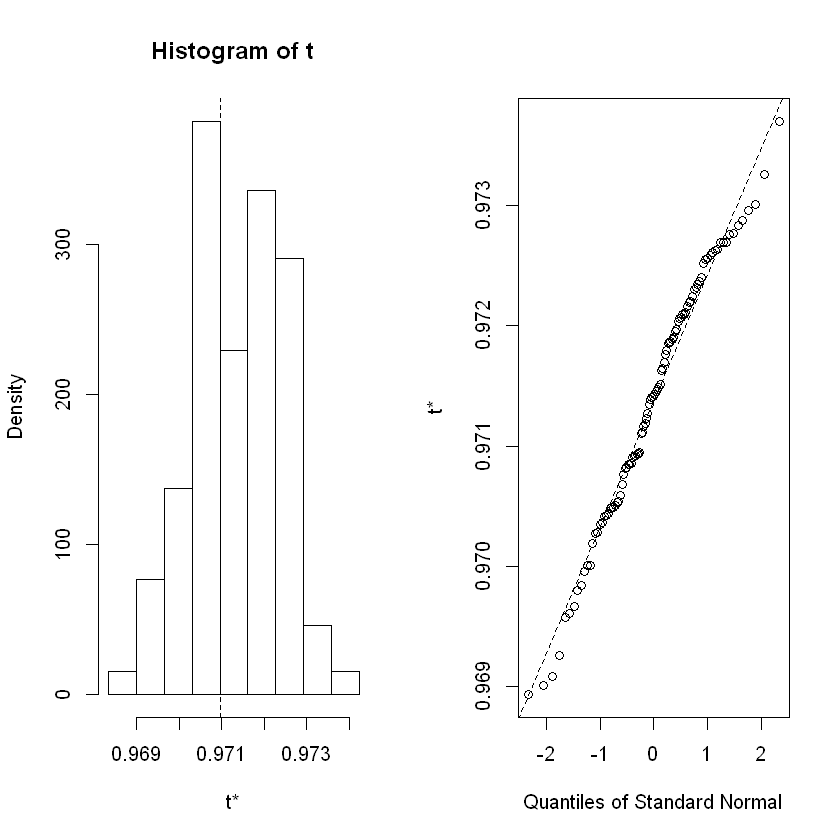

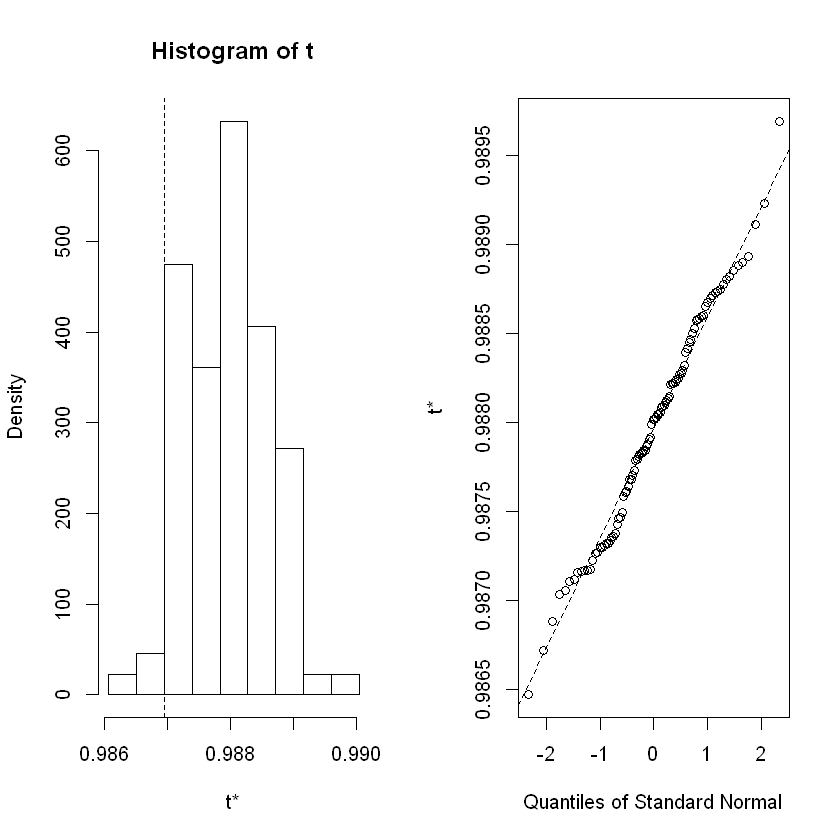

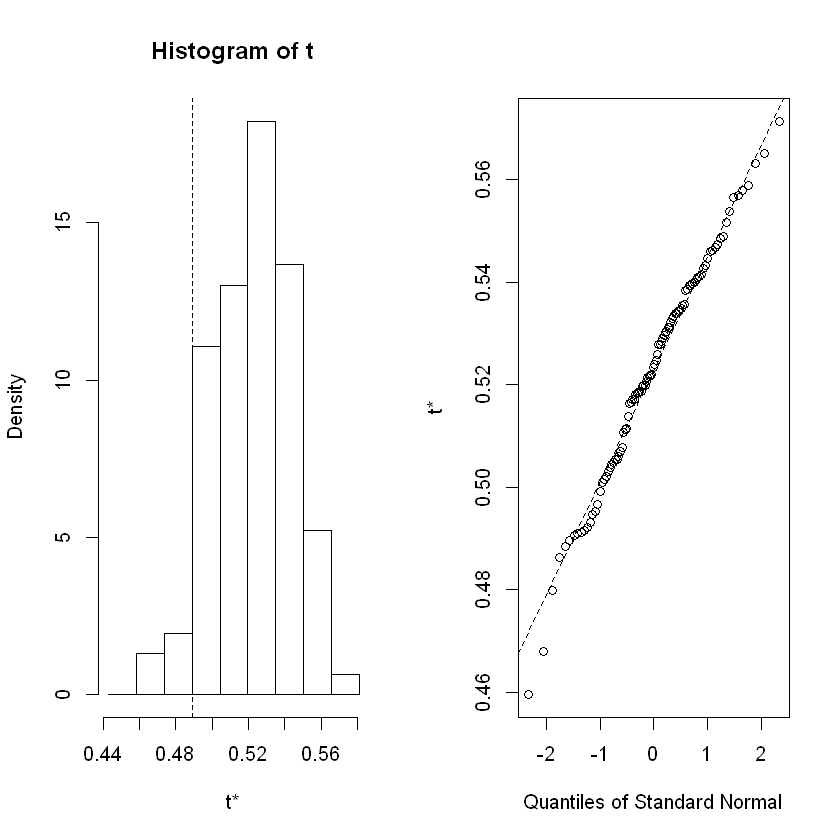

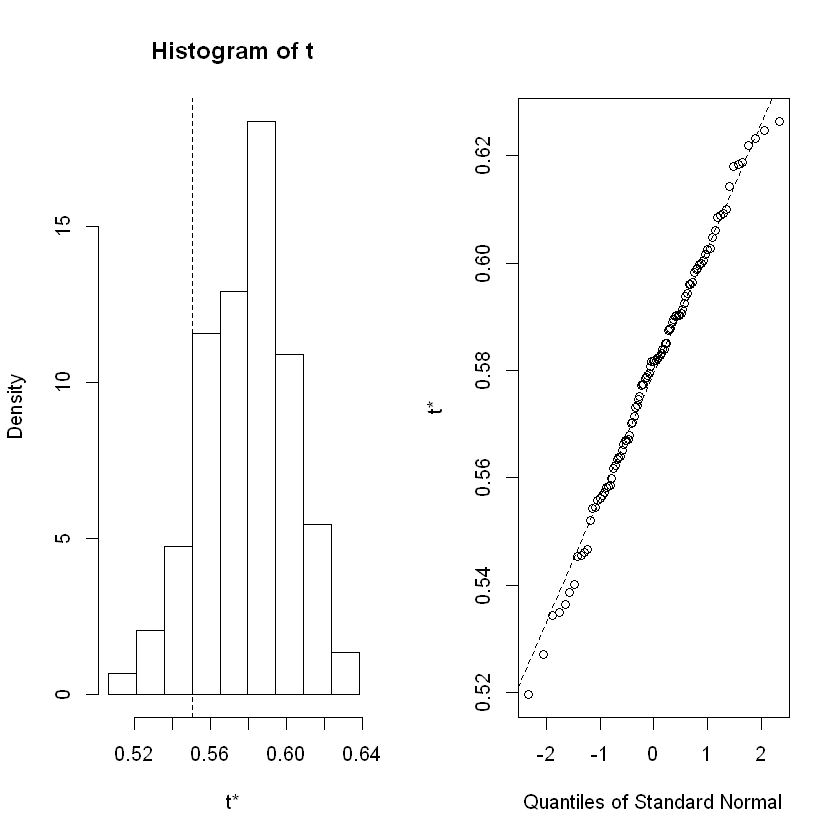

In [59]:
plot(output_, index=1)
plot(output_, index=2)
plot(output_, index=3)
plot(output_, index=4)

### weekly_avg_distribution_entropy

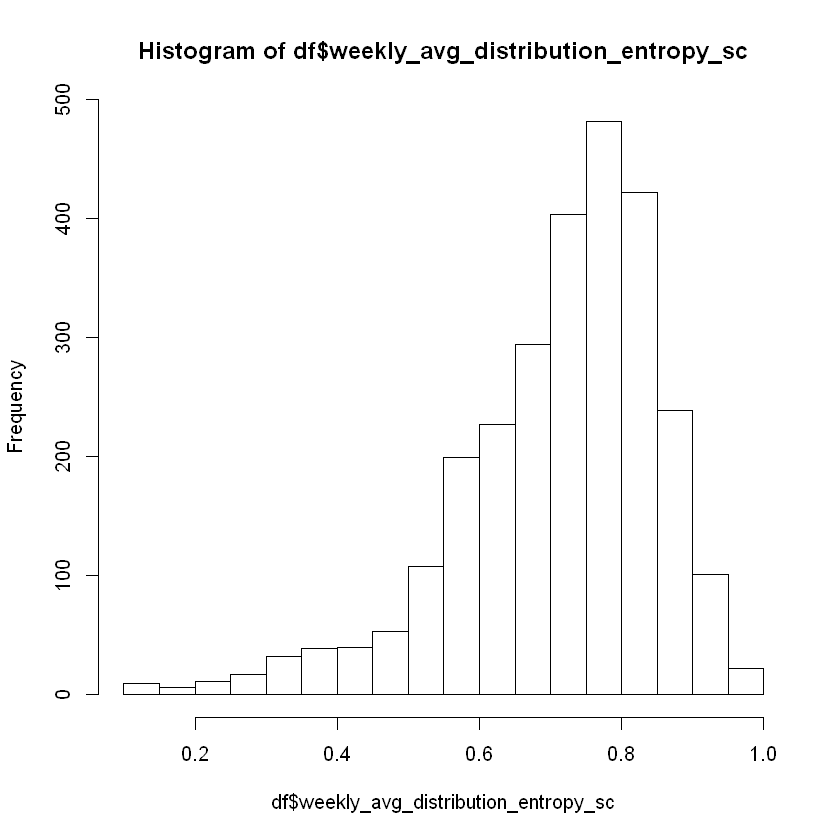

In [178]:
#scale form 0-1
range01 <- function(x){(x-min(x))/(max(x)-min(x))}
#Adding ... will allow you to pass through na.rm = T if you want to omit missing values from the calculation 
#(they will still be present in the results):
range01 <- function(x, ...){(x - min(x, ...)) / (max(x, ...) - min(x, ...))}
#df$weekly_avg_distribution_entropy_sc = range01(df$weekly_avg_distribution_entropy, na.rm = T)
#df$weekly_avg_distribution_entropy_sc = rescale(df$weekly_avg_distribution_entropy, from=c(0.001, 0.999))
range02 <- function(x){   (x - min(x))/(max(x)-min(x)) * (0.99 - 0.1) + 0.1}
df$weekly_avg_distribution_entropy_sc = range02(df$weekly_avg_distribution_entropy)
hist(df$weekly_avg_distribution_entropy_sc)

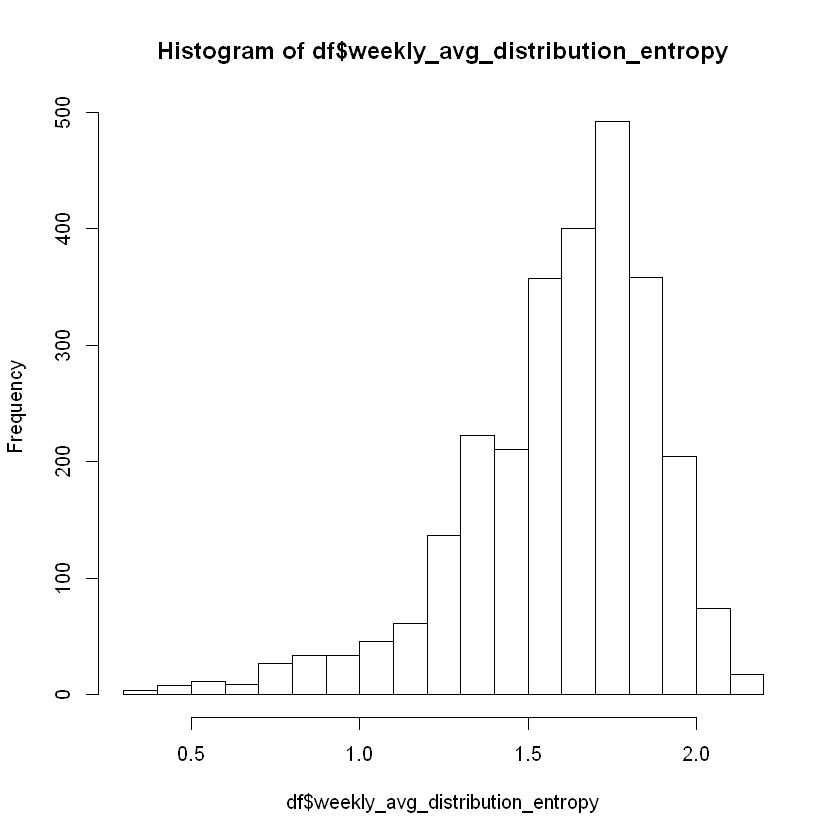

In [154]:
hist(df$weekly_avg_distribution_entropy)

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: Gamma  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
   -95.7    -87.1     50.8   -101.7      124 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.03605  0.1899  
Number of obs: 127, groups:  HenID, 25

Dispersion estimate for Gamma family (sigma^2): 0.014 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.12141    0.04085   2.973  0.00295 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: beta  ( logit )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
 -6240.7  -6199.3   3127.3  -6254.7     2698 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.4481   0.6694  
Number of obs: 2705, groups:  HenID, 194

Overdispersion parameter for beta family (): 39.5 

Conditional model:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    0.95758    0.06859  13.960  < 2e-16 ***
TreatmentOFH                  -0.01814    0.09743  -0.186 0.852267    
scale(weekly_avg_temperature)  0.06980    0.02045   3.413 0.000643 ***
scale(WOA)                     0.06647    0.05987   1.110 0.266861    
scale(I(WOA^2))               -0.02426    0.06389  -0.380 0.704188    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


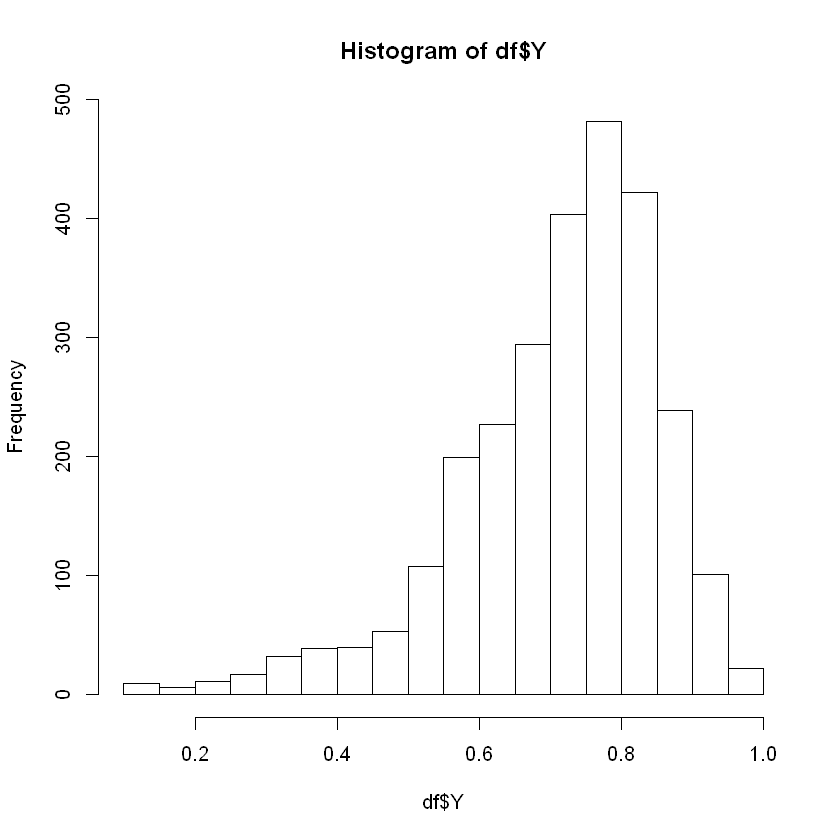

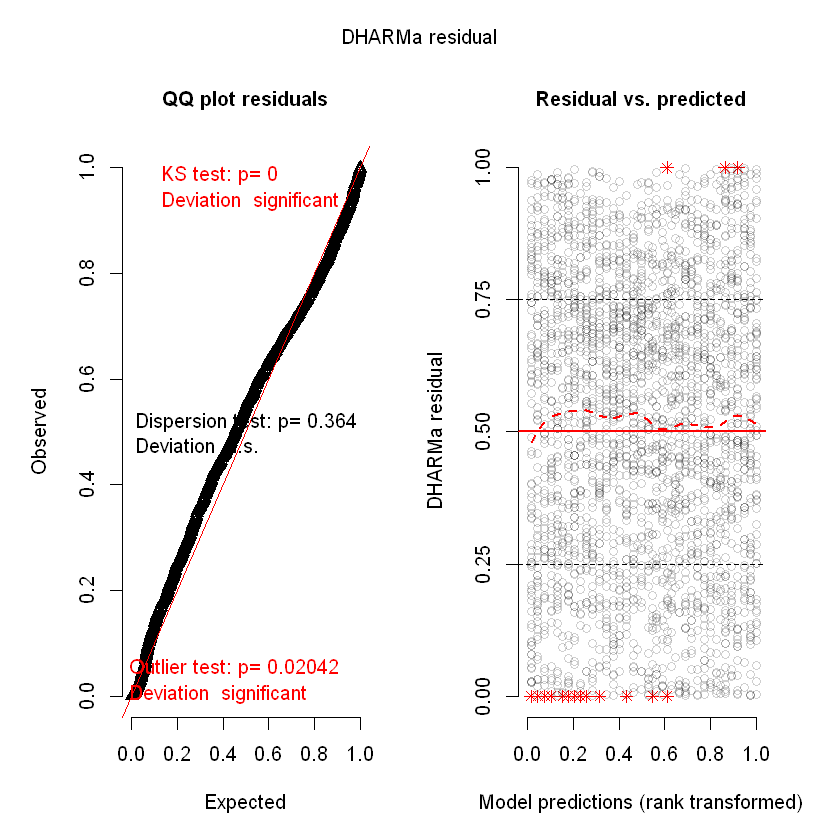


	DHARMa outlier test based on exact binomial test with approximate
	expectations

data:  sim_res
outliers at both margin(s) = 19, observations = 2705, p-value = 0.02042
alternative hypothesis: true probability of success is not equal to 0.003992016
95 percent confidence interval:
 0.004234067 0.010947250
sample estimates:
frequency of outliers (expected: 0.00399201596806387 ) 
                                            0.00702403 


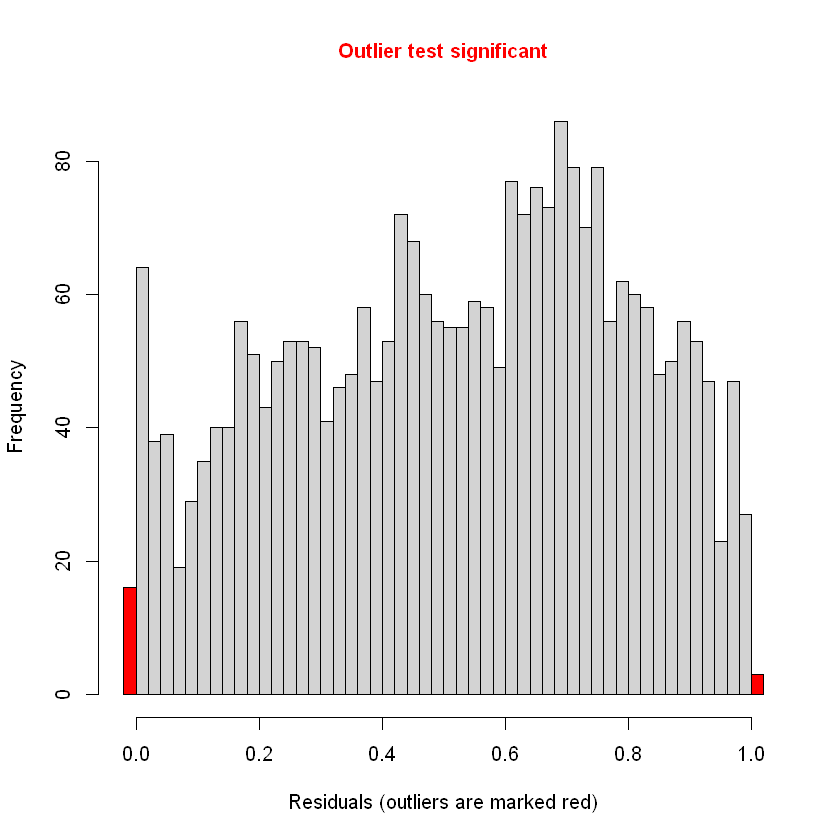

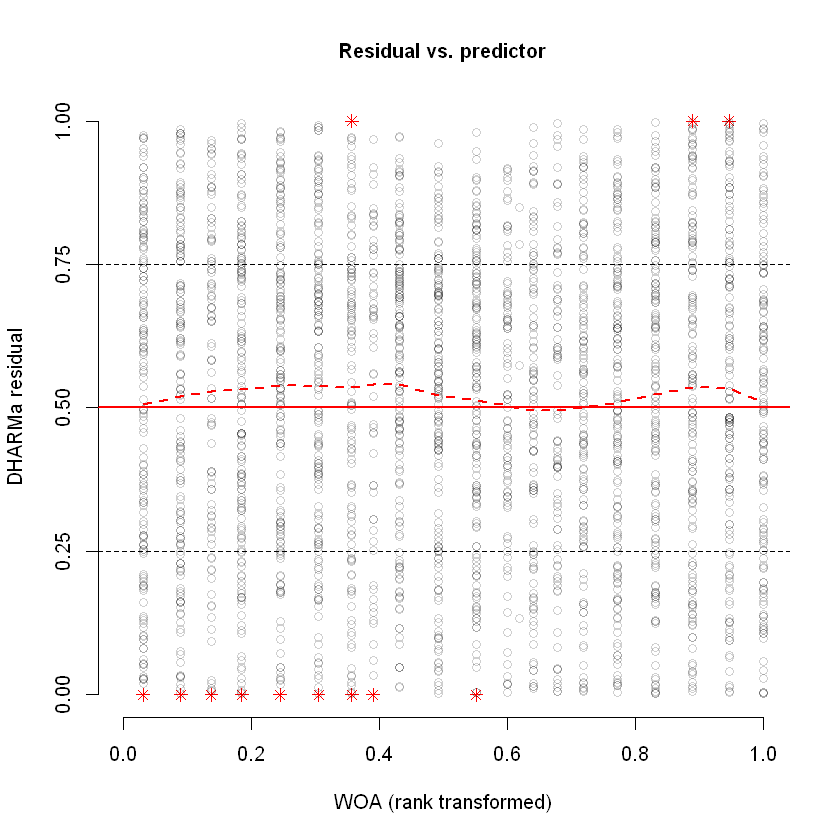

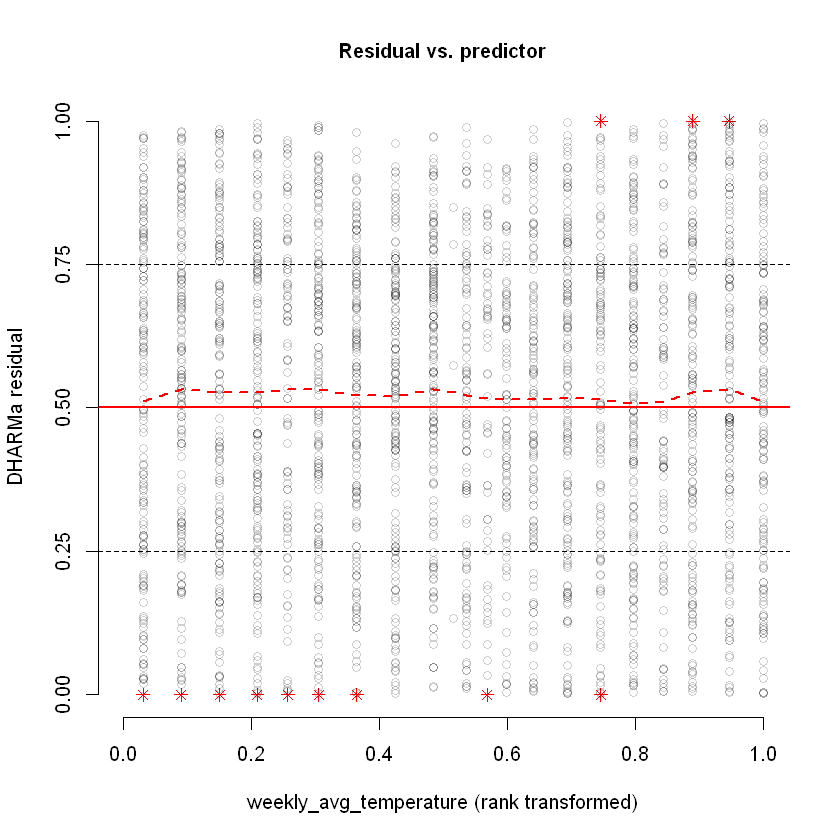

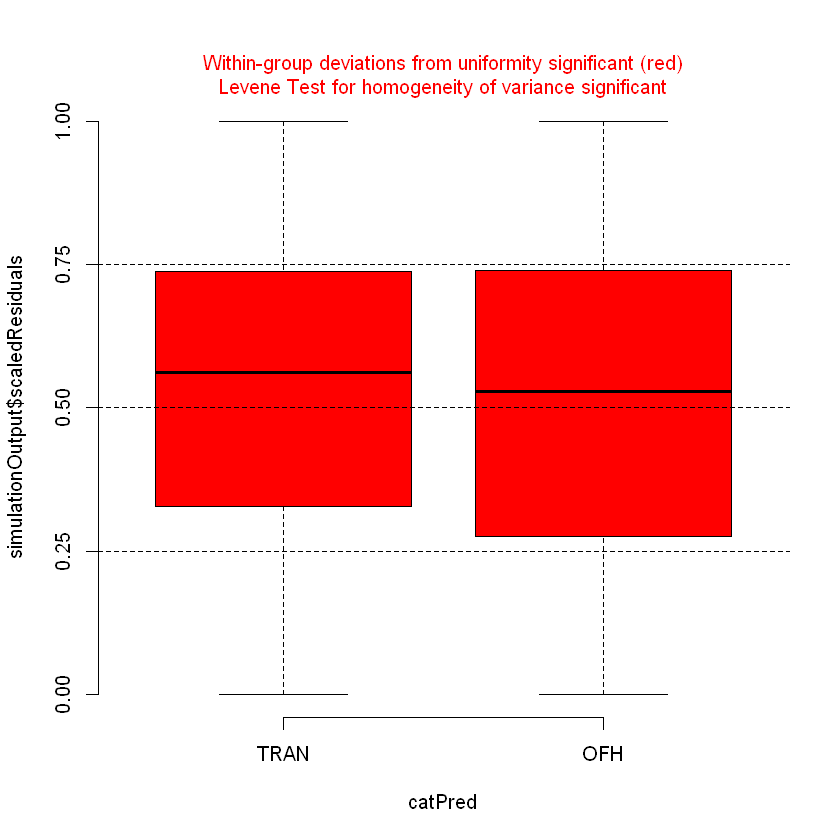

In [180]:
df$Y = df$weekly_avg_distribution_entropy_sc
hist(df$Y)
# Fit alternative model including fixed and all random effects
modF <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA)+scale(I(WOA^2)) + (1|HenID), family =beta_family(), data=df)
# View model fits for both models
summary(modR)
summary(modF)
sim_res = simulateResiduals(modF, n=500)
plot(sim_res)
testOutliers(sim_res)
#plot residual against predictors
plotResiduals(sim_res, form = df$WOA)
plotResiduals(sim_res, form = df$weekly_avg_temperature)
plotResiduals(sim_res, form = df$Treatment)


Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


 Family: Gamma  ( log )
Formula:          Y ~ 1 + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
   -95.7    -87.1     50.8   -101.7      124 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.03605  0.1899  
Number of obs: 127, groups:  HenID, 25

Dispersion estimate for Gamma family (sigma^2): 0.014 

Conditional model:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.12141    0.04085   2.973  0.00295 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Family: Gamma  ( log )
Formula:          Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +  
    scale(I(WOA^2)) + (1 | HenID)
Data: df

     AIC      BIC   logLik deviance df.resid 
   -89.4    -69.5     51.7   -103.4      120 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev.
 HenID  (Intercept) 0.03591  0.1895  
Number of obs: 127, groups:  HenID, 25

Dispersion estimate for Gamma family (sigma^2): 0.0138 

Conditional model:
                               Estimate Std. Error z value Pr(>|z|)  
(Intercept)                    0.119592   0.062446   1.915   0.0555 .
TreatmentOFH                   0.020605   0.082274   0.250   0.8022  
scale(weekly_avg_temperature)  0.005953   0.032237   0.185   0.8535  
scale(WOA)                     0.083999   0.103966   0.808   0.4191  
scale(I(WOA^2))               -0.076868   0.111753  -0.688   0.4916  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Warning message in Matrix::sparseMatrix(dims = c(0, 0), i = integer(0), j = integer(0), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


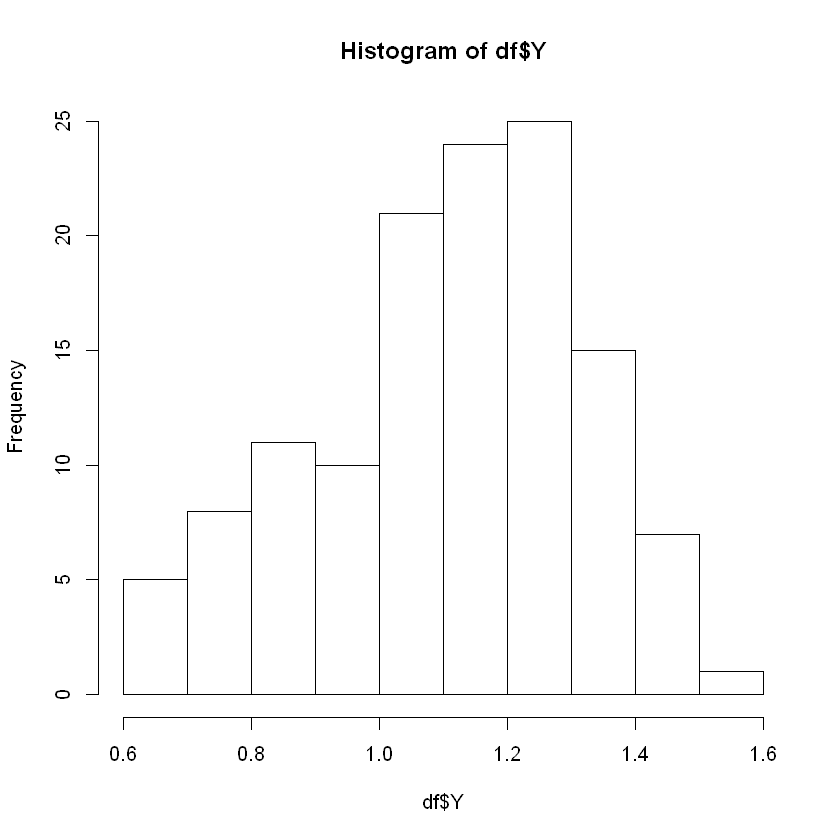

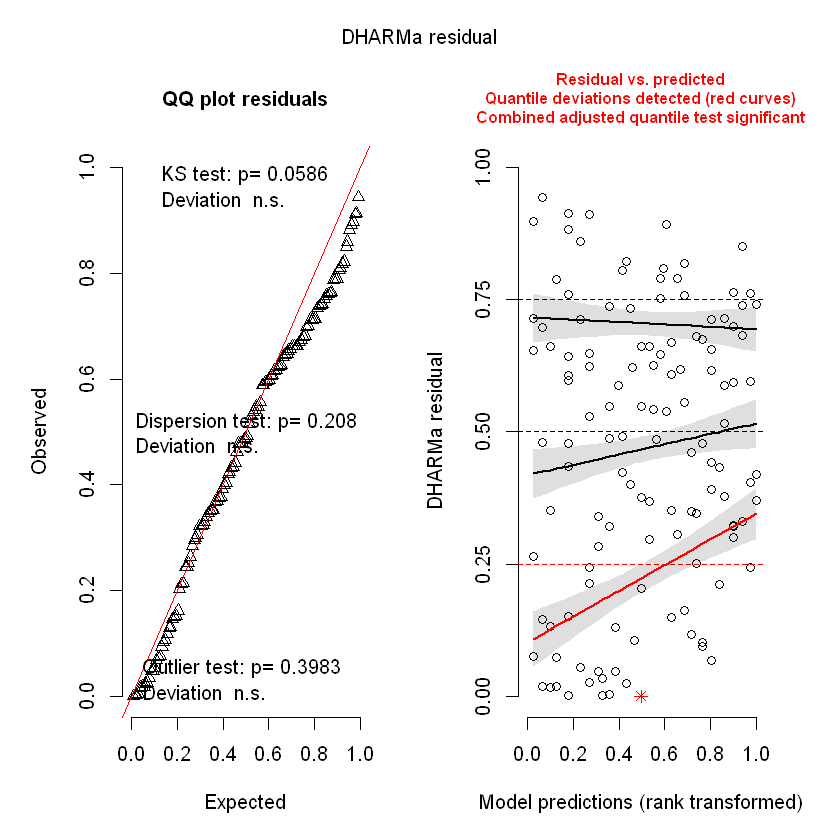


	DHARMa outlier test based on exact binomial test with approximate
	expectations

data:  sim_res
outliers at both margin(s) = 1, observations = 127, p-value = 0.3983
alternative hypothesis: true probability of success is not equal to 0.003992016
95 percent confidence interval:
 0.0001993329 0.0430896737
sample estimates:
frequency of outliers (expected: 0.00399201596806387 ) 
                                           0.007874016 


ERROR: Error in ensurePredictor(simulationOutput, form): DHARMa: residuals and predictor do not have the same length. The issue is possibly that you have NAs in your predictor that were removed during the model fit. Remove the NA values from your predictor.


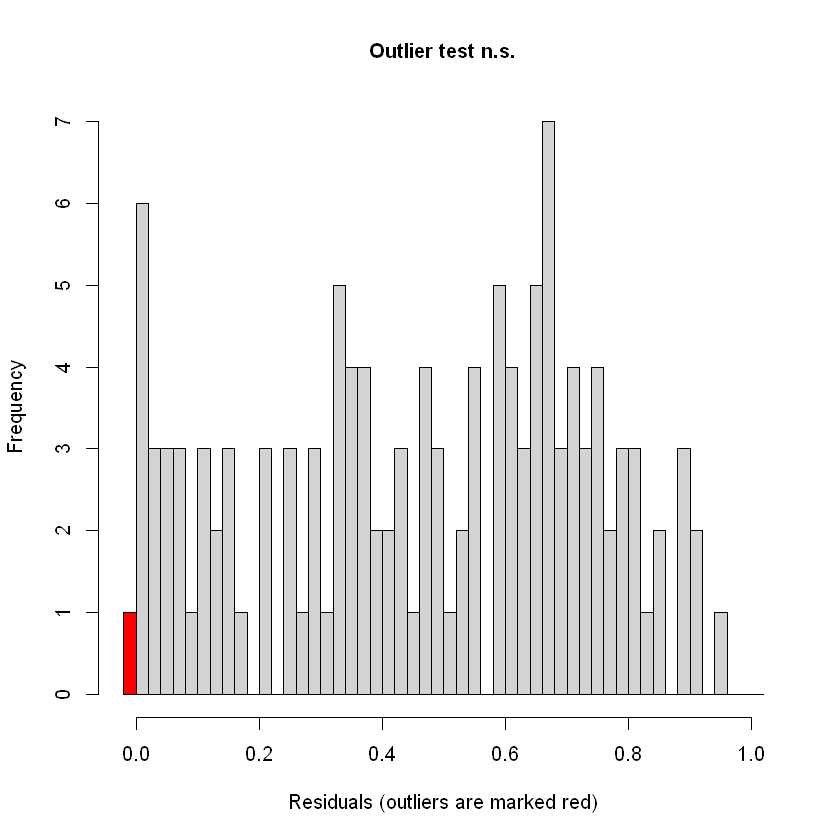

In [158]:
df$Y = df$weekly_avg_distribution_entropy_arcs
hist(df$Y)
# Fit null model without fixed effects (but including all random effects)
modR <-glmmTMB(Y ~ 1 + (1|HenID), family = Gamma(link = "log"), data=df)
# Fit alternative model including fixed and all random effects
modF <-glmmTMB(Y ~ Treatment + scale(weekly_avg_temperature) + scale(WOA)+scale(I(WOA^2)) + (1|HenID), family = Gamma(link="log"), data=df)
# View model fits for both models
summary(modR)
summary(modF)
sim_res = simulateResiduals(modF, n=500)
plot(sim_res)
testOutliers(sim_res)
#plot residual against predictors
plotResiduals(sim_res, form = df$WOA)
plotResiduals(sim_res, form = df$weekly_avg_temperature)
plotResiduals(sim_res, form = df$Treatment)


# Calculation of the variance in fitted values
VarF <-var(as.vector(model.matrix(modF)[[1]] %*%fixef(modF)[[1]]))
VarF

# getting the observation-level variance Null model
#https://stats.stackexchange.com/questions/247624/dispersion-parameter-for-gamma-family/247631#247631
#sigma^2 is the dispersion, and 1/dispersion is shape parameter
#https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/gamma.shape.glm.html
#nuN <- summary(modR)$sigma #instead of  modR$alpha (overdispersion omega is alpha) in glmmadmb
nuN <- 1/summary(modR)$sigma^2 #instead of  modR$alpha (overdispersion omega is alpha) in glmmadmb
print(nuN)
VarOdN <- 1/nuN# the delta method
VarOlN <-log(1 + 1/nuN)# log-normal approximation
VarOtN <-trigamma(nuN)# trigamma function
# comparing the three
c(VarF=VarF, nuN=nuN, VarOdN = VarOdN, VarOlN = VarOlN, VarOtN = VarOtN)

# Full model
#nuF <- summary(modF)$sigma #instead of  modF$alpha, in glmmadmb
nuF <- 1/summary(modF)$sigma^2 #instead of  modF$alpha, in glmmadmb
# overdispersion omega is alpha in glmmadmb
VarOdF <- 1/nuF# the delta method
VarOlF <-log(1 + 1/nuF)# log-normal approximation
VarOtF <-trigamma(nuF)# trigamma function-
# comparing the three
c(nuF=nuF, VarOdF = VarOdF, VarOlF = VarOlF, VarOtF = VarOtF)
#select highest one?? read!

# R2[GLMM(m)] - marginal R2[GLMM]
R2glmmM <- VarF/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) + VarOtF)
# R2[GLMM(c)] - conditional R2[GLMM] for full model
R2glmmC <- (VarF +sum(as.numeric(VarCorr(modF)[[1]])))/(VarF +sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
# Raw unadjusted ICC[HenID]
ICCrawPop <-VarCorr(modR)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modR)[[1]])) +VarOtN)
# adjusted ICC[HenID]
ICCadjPop <-VarCorr(modF)[[1]]$HenID[1]/(sum(as.numeric(VarCorr(modF)[[1]])) +VarOtF)
# comparing the results
c(R2glmmM = R2glmmM, R2glmmC = R2glmmC, ICCrawPop = ICCrawPop, ICCadjPop = ICCadjPop)

# Gaussian

### weekly_avg_food_related_behavior

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
weekly_avg_food_related_behavior ~ Treatment + scale(weekly_avg_temperature) +  
    scale(WOA) + (1 | HenID)
   Data: df

REML criterion at convergence: -1789.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8628 -0.5613  0.0933  0.6314  2.9387 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.01105  0.1051  
 Residual             0.02616  0.1617  
Number of obs: 2705, groups:  HenID, 194

Fixed effects:
                                Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   -8.639e-02  1.168e-02  1.877e+02  -7.394 4.58e-12
TreatmentOFH                  -1.435e-02  1.655e-02  1.858e+02  -0.868 0.386771
scale(weekly_avg_temperature) -2.858e-02  8.597e-03  2.516e+03  -3.324 0.000899
scale(WOA)                    -4.399e-02  8.665e-03  2.542e+03  -5.077 4.11e-07
                                 
(Intercept) 

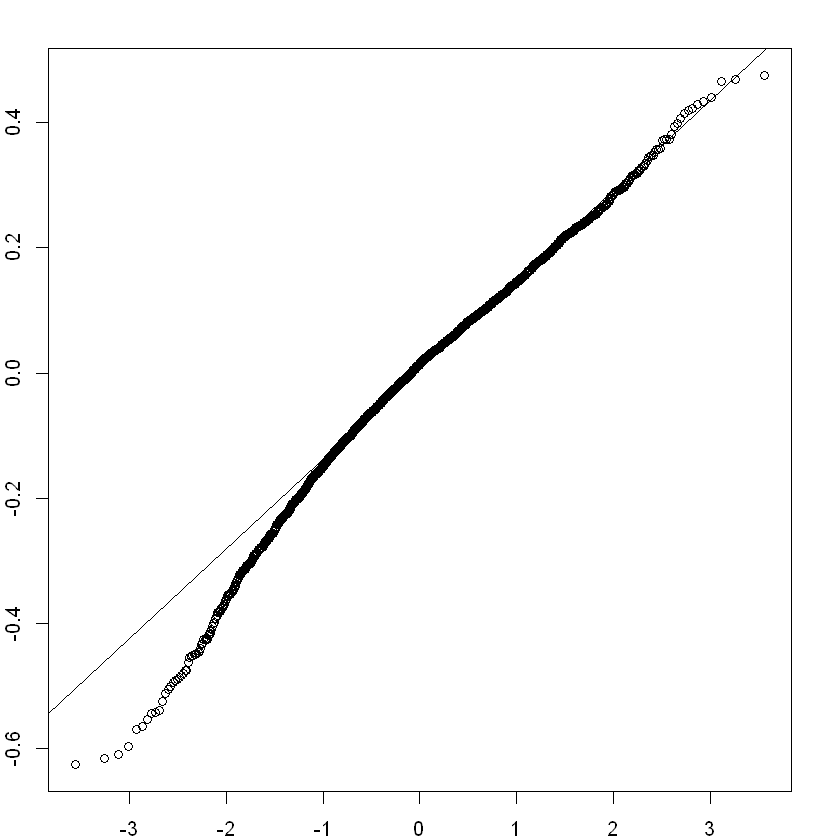

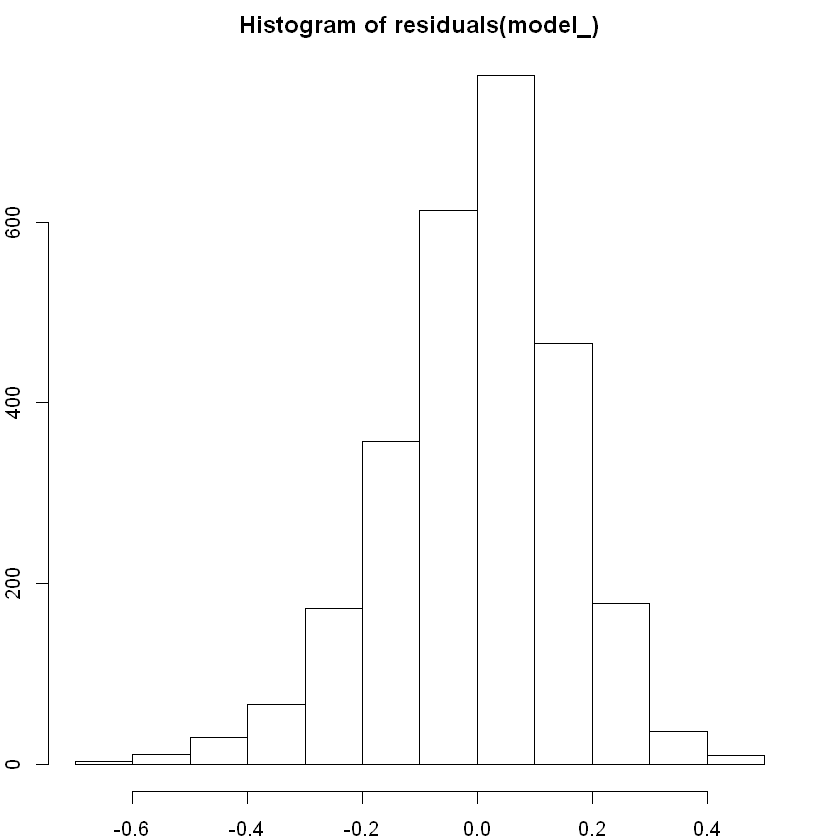

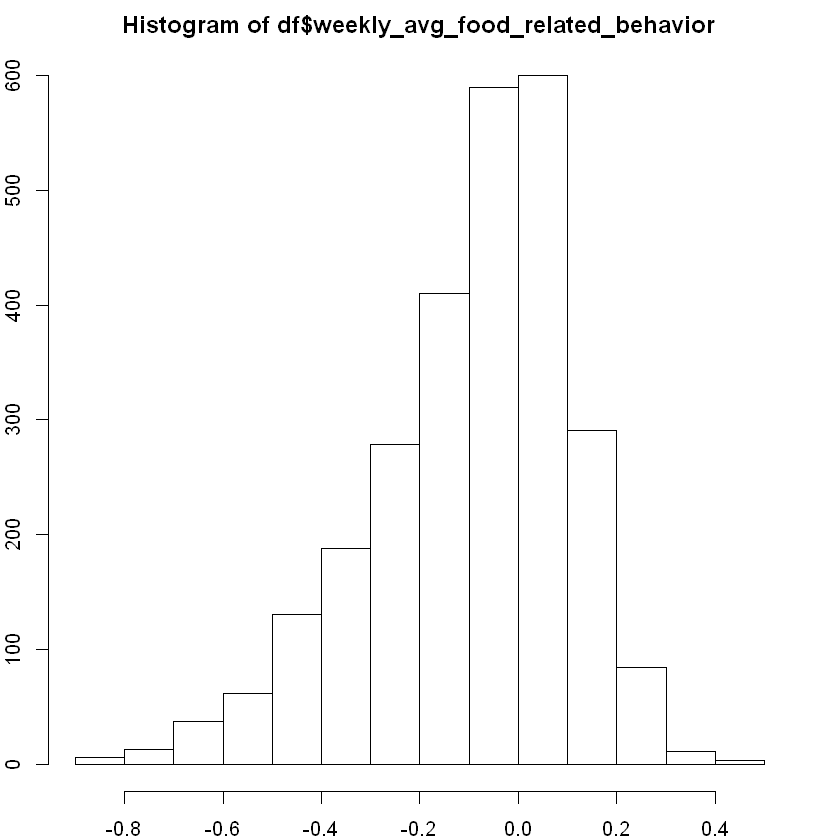

2.5%       50%     97.5% 
0.2720858 0.2955493 0.3226360

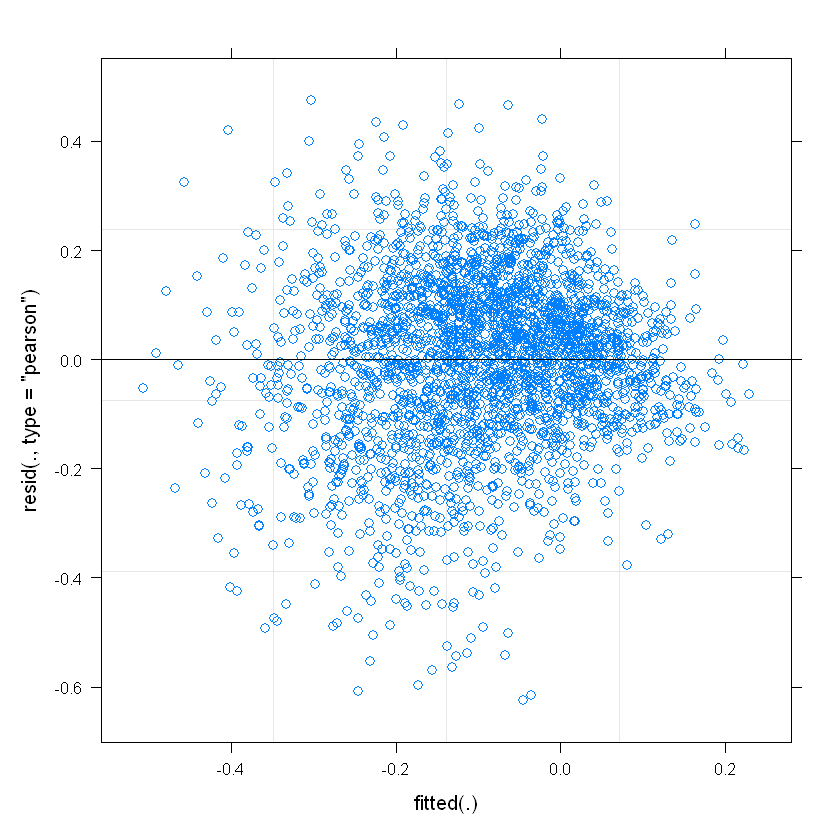

In [18]:
#lmer
model_ = lmer(weekly_avg_food_related_behavior ~ Treatment + scale(weekly_avg_temperature) + scale(WOA) +(1|HenID), df)
summary(model_)
par(mar = c(2, 2, 2, 2))
qqnorm(residuals(model_), main = NULL) 
qqline(residuals(model_))
hist(residuals(model_))
hist(df$weekly_avg_food_related_behavior)
plot(model_)

# calculate repeatability
set.seed(1)
simulated <- sim(model_, n.sim = 1000)
posterior_HenID <- apply(simulated@ranef$"HenID"[, , 1], 1, var)
posterior_residual <- simulated@sigma^2
quantile(posterior_HenID /
  (posterior_HenID + posterior_residual),
prob = c(0.025, 0.5, 0.975)
)

In [ ]:
skew_mod <-  selm(dat ~ 1) 

In [ ]:
library(sn)
#skew-t distribution could give a better fit
skew_mod <-  selm(dat ~ 1) # selm is "skew-elliptic lm"
summary(skew_mod)
hist(dat,prob=TRUE,nclass="scott") # "scott" is from MASS
plot(function(x) dsn(x, dp=skew_mod@param$dp), from=-0.5, to=1.75, col="red", add=TRUE)